In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib qt




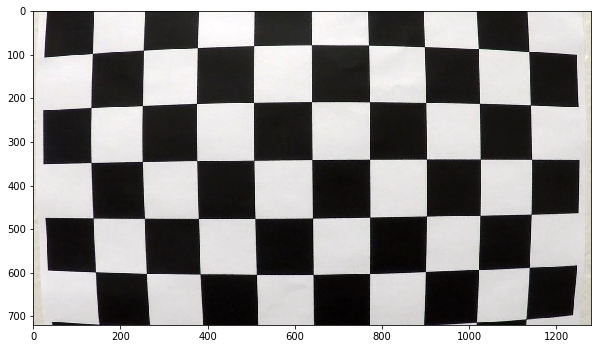

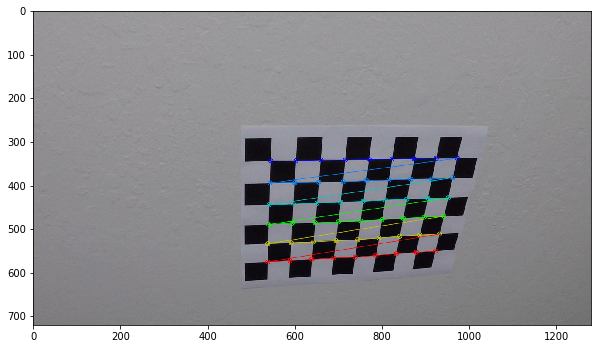

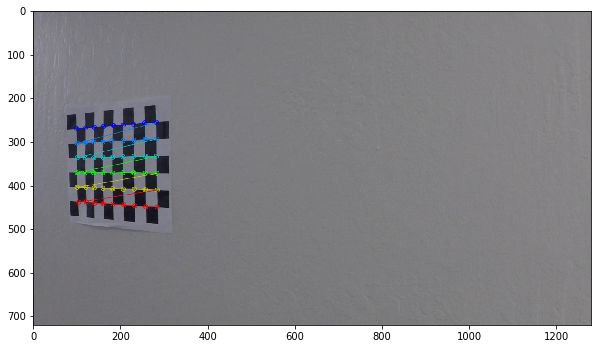

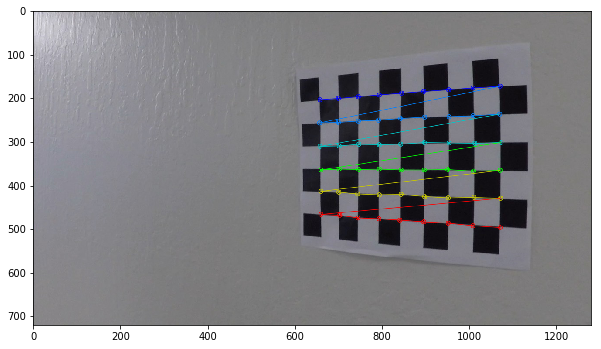

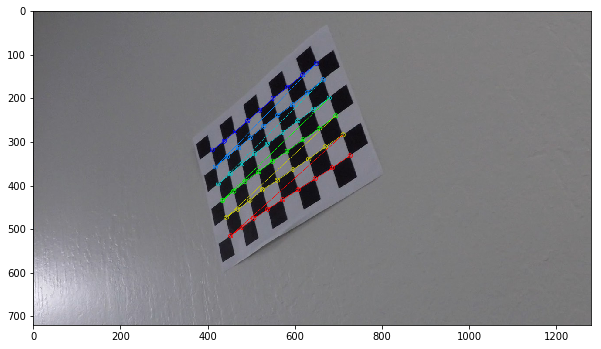

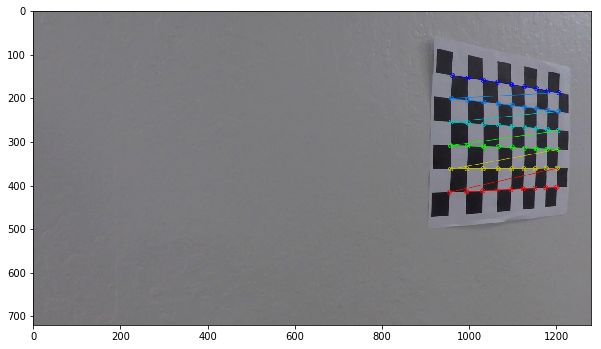

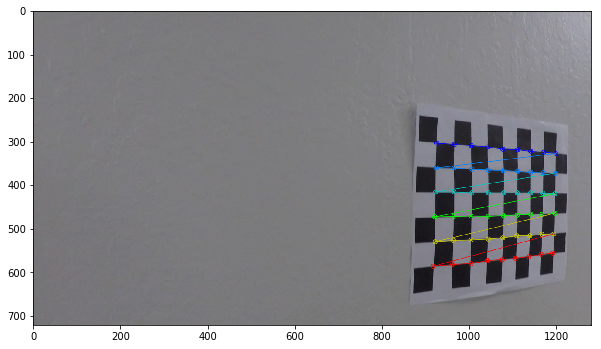

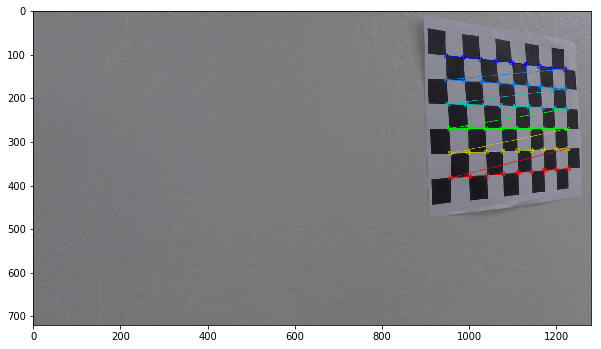

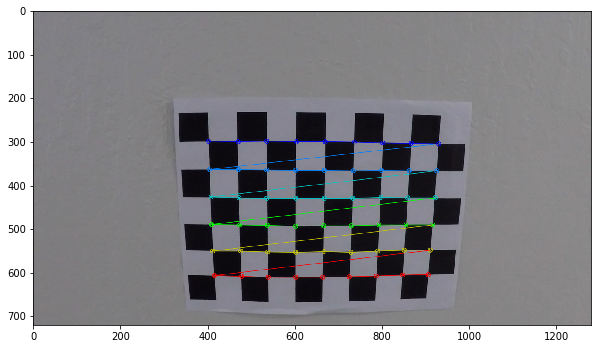

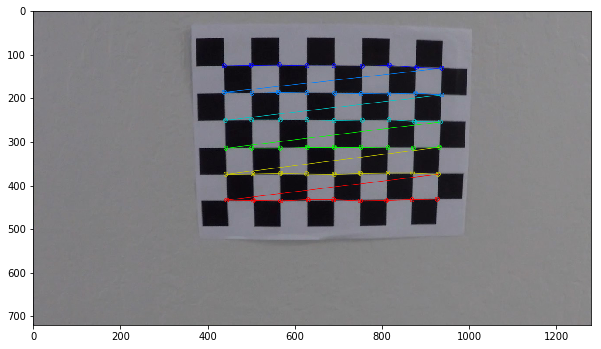

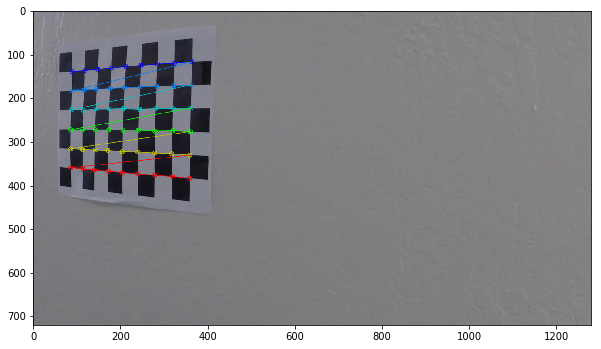

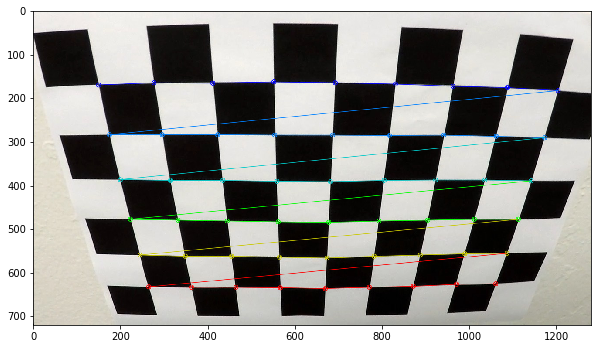

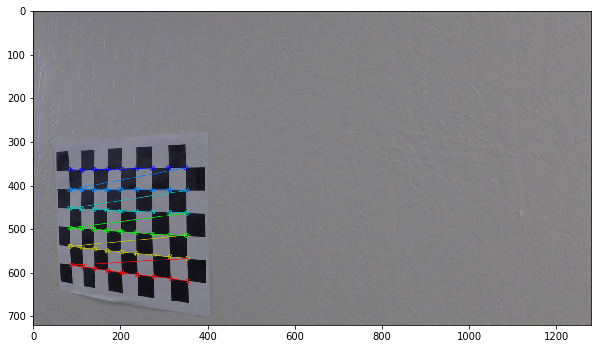

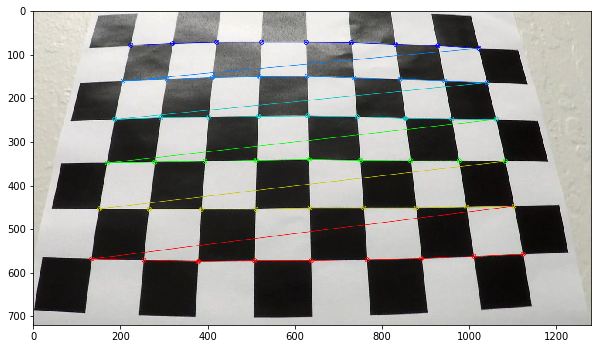

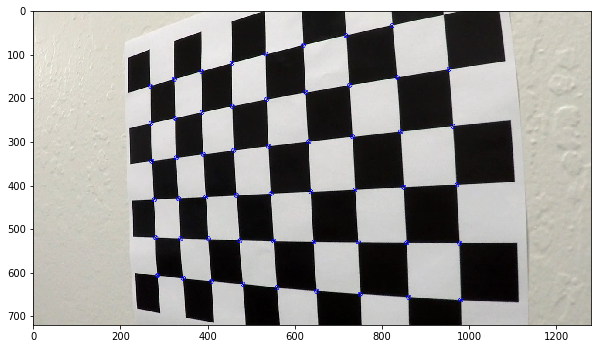

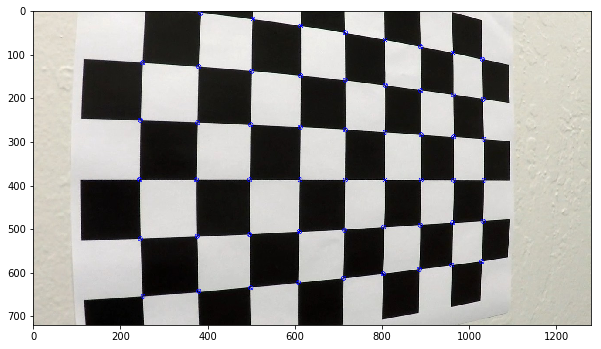

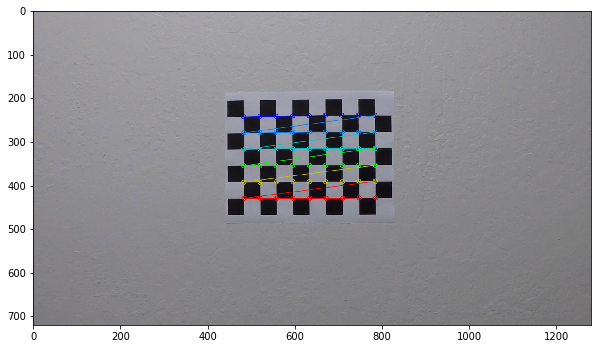

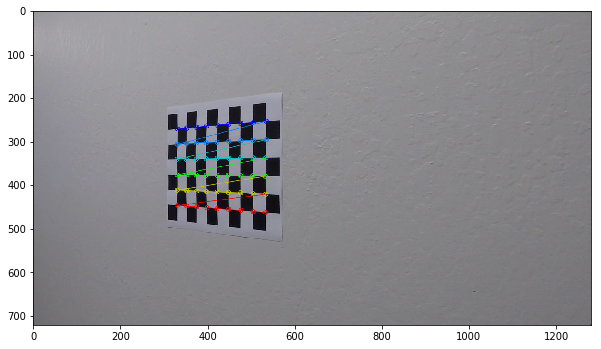

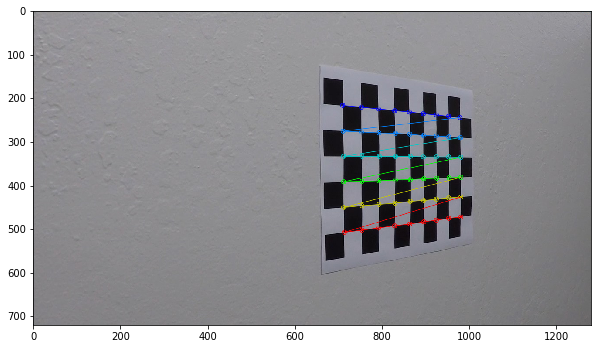

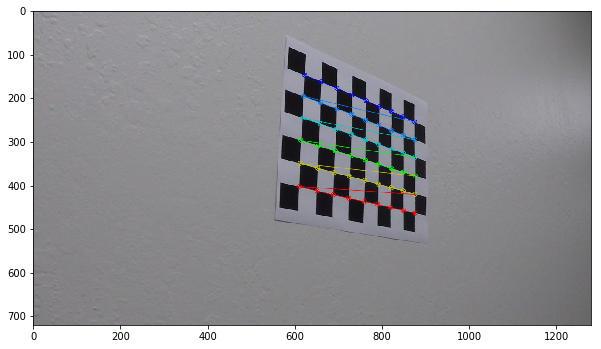

In [97]:
import glob
imagenames=glob.glob('camera_cal/calibration*.jpg')

#%matplotlib inline
objpoints=[]
imagepoints=[]
objp=np.zeros((9*6,3),np.float32)
objp[:,:2]=np.mgrid[0:9,0:6].T.reshape(-1,2)
for imm in imagenames:
    img=mpimg.imread(imm)
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    #plt.figure(figsize=(3,3))
    #plt.imshow(img)
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    #print(ret)
    #print(corners)
    img2 = cv2.drawChessboardCorners(img, (9,6), corners, ret)
    if ret ==True:
        imagepoints.append(corners)
        objpoints.append(objp)
    plt.figure(figsize=(10,10))
    plt.imshow(img2)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imagepoints, gray.shape[::-1], None, None)   


#def cal_undistort(img, objpoints, imgpoints):
#    # Use cv2.calibrateCamera() and cv2.undistort()
#    undist = np.copy(img)  # Delete this line
#    return undist

In [98]:
def warp_transform(img):
    img_size=(img.shape[1],img.shape[0])
    print(img_size)

    src=np.float32(
#aika hyva        [[180,700],[1100,700],[554,470],[726,470]]
 #erittain hyva       [[160,630],[1120,630],[520,470],[760,470]]
         [[0,700],[1280,700],[520,470],[760,470]]
        
        )
    #dst=np.float32(
    #    [[2400,1470],[2400,1000],[3000,1470],[3000,1000]]
    #    )
    #src=src[:,(2,1)]
    offset = 0 # offset for dst points
        # Grab the image shape
    #img_size = (gray.shape[1], gray.shape[0])

        # For source points I'm grabbing the outer four detected corners
    #src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        # For destination points, I'm arbitrarily choosing some points to be
        # a nice fit for displaying our warped result 
        # again, not exact, but close enough for our purposes
    dst = np.float32([[offset, img_size[1]-offset],[img_size[0]-offset, img_size[1]-offset], 
                                 [offset, offset], [img_size[0]-offset, offset] ])
    #print(src)
    #print(src[:,(1,0)])
    #print(dst)
    M = cv2.getPerspectiveTransform(src, dst)

  #  M = cv2.getPerspectiveTransform(src[:,(1,0)], dst[:,(1,0)])
    #Compute the inverse perspective transform: 
    Minv = cv2.getPerspectiveTransform(dst, src)
    return M,Minv
    #Warp an image using the perspective transform, M:

#    return warped,Minv

#img2=warp(img)
#plt.figure(figsize=(15,15))
#plt.imshow(img2)

['test_images\\straight_lines1.jpg', 'test_images\\straight_lines2.jpg', 'test_images\\test1.jpg', 'test_images\\test2.jpg', 'test_images\\test3.jpg', 'test_images\\test4.jpg', 'test_images\\test5.jpg', 'test_images\\test6.jpg']
(1280, 720)


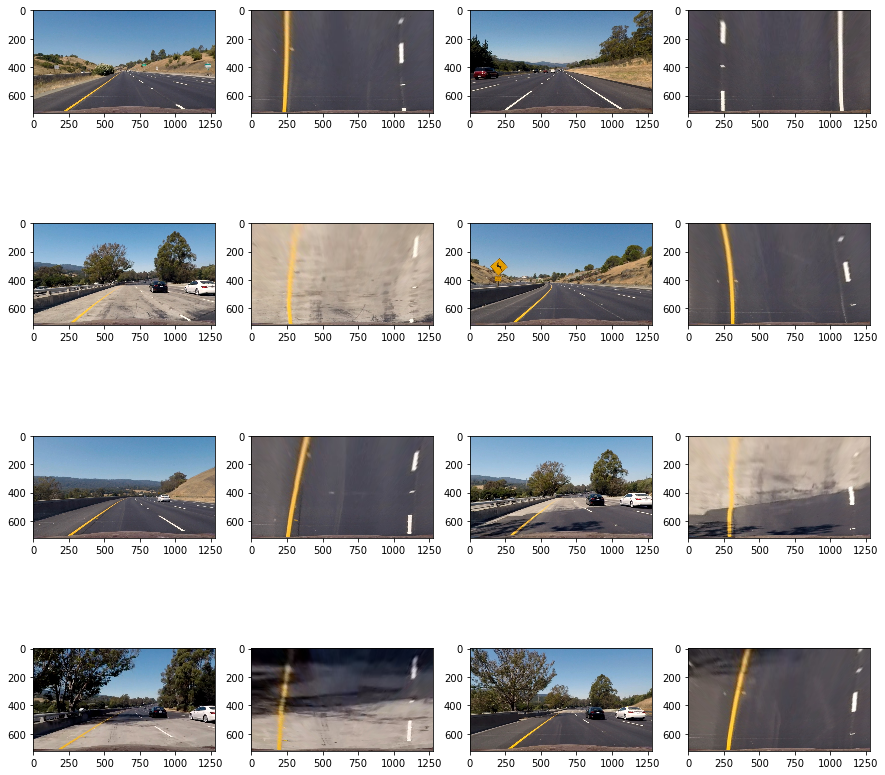

In [99]:

imagenames=glob.glob('test_images/*.jpg')
print(imagenames)
%matplotlib inline
#%matplotlib qt
counter=0
plt.figure(figsize=(15,15))
M,Minv=warp_transform(mpimg.imread(imagenames[0]))
img_size=(img.shape[1],img.shape[0])
for imm in imagenames:
    counter=counter+1
    img=mpimg.imread(imm)
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    #plt.figure(figsize=(10,10))
    
    plt.subplot(4,4,counter) 
    plt.imshow(dst)
    
    warpedd= cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    counter=counter+1
    plt.subplot(4,4,counter) 
    plt.imshow(warpedd)
    #print(MM)



In [100]:
#### so far images have been warped

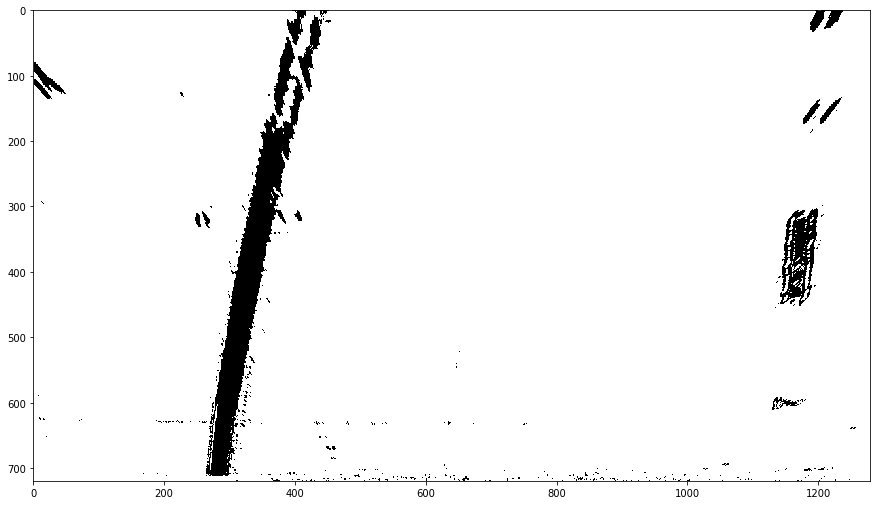

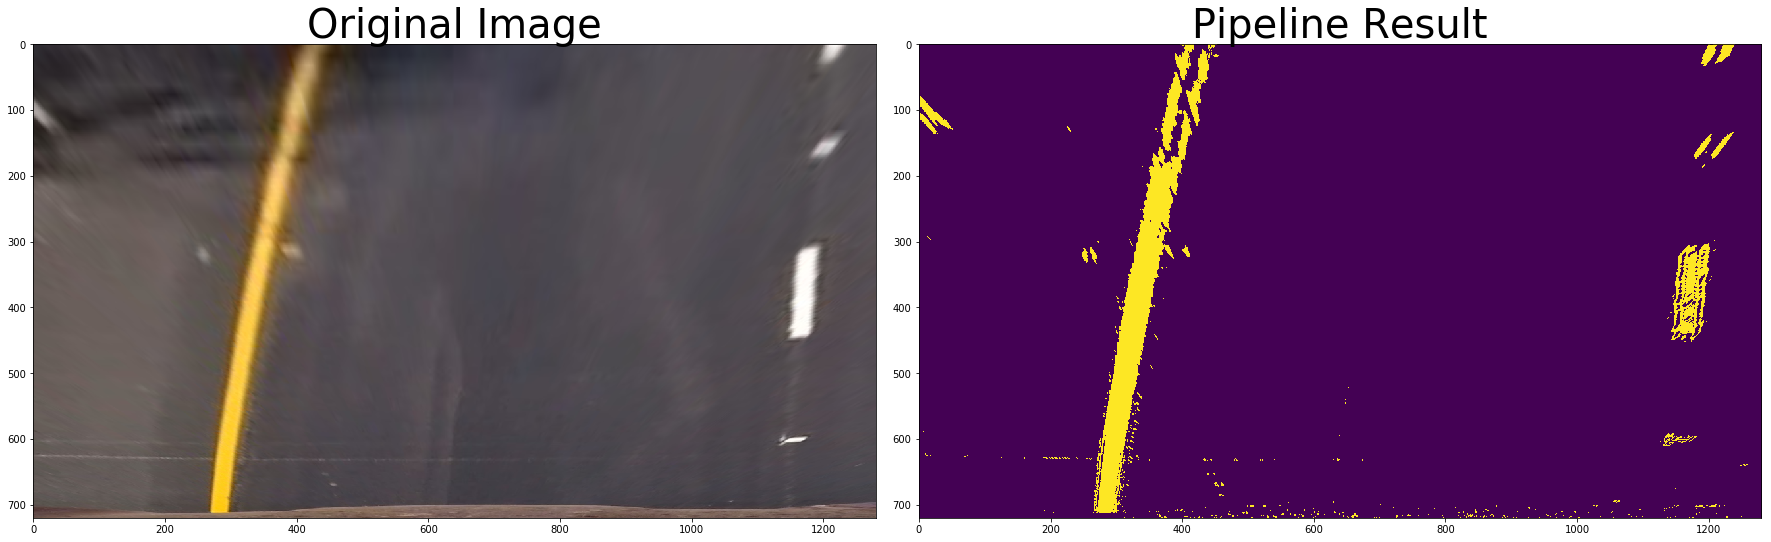

In [101]:

# Edit this function to create your own pipeline.
def pipeline(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    # Convert to HSV color space and separate the V channel
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    l_channel = hsv[:,:,1]
    s_channel = hsv[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    # Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might
    # be beneficial to replace this channel with something else.
    #color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary))
    #print(np.max(sxbinary)
    #print(s_binary.shape)
    color_binary = np.maximum(sxbinary,s_binary)
    #print(color_binary.shape)
    return color_binary
image=warpedd
result = pipeline(image)

plt.figure(figsize=(15,15))
plt.imshow(result,cmap='Greys')
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result)
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [102]:
# Sliding window 

bin_warp=result

# Assuming you have created a warped binary image called "binary_warped"
# Take a histogram of the bottom half of the image

# Create an output image to draw on and  visualize the result

def calculate_curvatures(binary_warped):
    histogram = np.sum(binary_warped[binary_warped.shape[0]/2:,:], axis=0)
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    return left_fit,right_fit

def calculate_fit(left_fit,right_fit,binary_warped):
    #print(left_fit)
    #print(right_fit)
    #Visualization
    #At this point, you're done! But here is how you can visualize the result as well:
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    return ploty,left_fitx,right_fitx

left_fit,right_fit=calculate_curvatures(bin_warp)
ploty,left_fitx,right_fitx=calculate_fit(left_fit,right_fit,bin_warp)
#out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
#out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
#plt.imshow(out_img)
#plt.plot(left_fitx, ploty, color='yellow')
#plt.plot(right_fitx, ploty, color='yellow')
#plt.xlim(0, 1280)
#plt.ylim(720, 0)

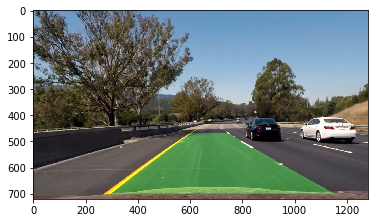

In [103]:
def warp_back(warped,undist,ploty,left_fitx,right_fitx):
    
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(warped).astype(np.uint8)
    #warp_zero = np.zeros_like(warped[:,:,0]).astype(np.uint8)
    
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))
    #print(color_warp)
    #print(np.int_([pts]))
    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
    return result


#print(warpedd.shape)
#print(dst.shape)
#warp_back(warped,undist,ploty,left_fitx,right_fitx)
resultt=warp_back(bin_warp,dst,ploty,left_fitx,right_fitx)
plt.imshow(resultt)

In [117]:
def calculate_realcurvature(ploty,leftx,rightx):
    # Define conversions in x and y from pixels space to meters
    y_eval = np.max(ploty)
    ym_per_pix = 20/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/900 # meters per pixel in x dimension

    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    # Now our radius of curvature is in meters
    print(left_curverad, 'm', right_curverad, 'm')
    # Example values: 632.1 m    626.2 m
    return left_curverad,right_curverad

In [118]:
# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = [np.array([False])]  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None
        self.counter=0
left_line=Line()
right_line=Line()


In [119]:
def pipel(image):
    #undistorted=undistr(image)
    undistorted=cv2.undistort(image, mtx, dist, None, mtx)
    #warped=warp(undistorted)
    
    warpedd= cv2.warpPerspective(undistorted, M, img_size, flags=cv2.INTER_LINEAR)
    
    binary_warped=pipeline(warpedd, s_thresh=(170, 255), sx_thresh=(20, 100))
    
    left_fit,right_fit=calculate_curvatures(binary_warped)
    print(left_fit)
    left_line.counter+=1
    #left_line.recent_xfitted.append(left_fit)
    left_line.recent_xfitted.append(left_fit)
    if(len(left_line.recent_xfitted)>20):
        left_line.recent_xfitted=left_line.recent_xfitted[1:]
    right_line.recent_xfitted.append(right_fit)
    if(len(right_line.recent_xfitted)>20):
        right_line.recent_xfitted=right_line.recent_xfitted[1:]
    #left_line.recent_xfitted[]
    left_fit=np.mean(np.vstack(left_line.recent_xfitted),axis=0)
    right_fit=np.mean(np.vstack(right_line.recent_xfitted),axis=0)
    ploty,left_fitx,right_fitx=calculate_fit(left_fit,right_fit,binary_warped)
    #ploty,left_fitx,right_fitx,left_fit,right_fit=calculate_curvatures(binary_warped)
    left_realcurv,right_realcurv=calculate_realcurvature(ploty,left_fitx,right_fitx)
   
    print(left_realcurv,right_realcurv)#return binary_warped
    warped_back=warp_back(binary_warped,undistorted,ploty,left_fitx,right_fitx)
    #warped_back.text(10, 10, 'Radius of curvature', style='italic',
    #    bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
    return warped_back

In [120]:
def testi(image):
    return image

['test_images\\straight_lines1.jpg', 'test_images\\straight_lines2.jpg', 'test_images\\test1.jpg', 'test_images\\test2.jpg', 'test_images\\test3.jpg', 'test_images\\test4.jpg', 'test_images\\test5.jpg', 'test_images\\test6.jpg']
[ -4.71218267e-05   1.60470896e-02   2.48830063e+02]
1991.69040109 m 2054.69181275 m
1991.69040109 2054.69181275
[ -1.36977130e-05   1.31049464e-02   2.43846127e+02]
3086.06296228 m 3666.70448312 m
3086.06296228 3666.70448312
[  1.82538209e-04  -2.11737239e-01   3.31879281e+02]
2312.96967445 m 1917.43522102 m
2312.96967445 1917.43522102
[ -1.38404565e-04   2.01721493e-01   2.44008850e+02]
22496.5678745 m 1618.08391606 m
22496.5678745 1618.08391606
[  9.08319573e-05  -2.49446025e-01   3.96608646e+02]
6328.43667874 m 5427.27507641 m
6328.43667874 5427.27507641
[  7.46499598e-05  -9.60767009e-02   3.29172755e+02]
3784.17079669 m 2040.36624678 m
3784.17079669 2040.36624678
[  9.40514476e-05  -1.72558731e-01   2.75147842e+02]
2705.05921197 m 3738.04199119 m
2705.059

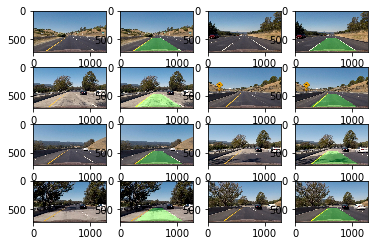

In [121]:
imagenames=glob.glob('test_images/*.jpg')
print(imagenames)
%matplotlib inline
#%matplotlib qt
counter=0
#plt.figure(figsize=(15,15))
#M,Minv=warp_transform(mpimg.imread(imagenames[0]))
#img_size=(img.shape[1],img.shape[0])
for imm in imagenames:
    counter=counter+1
    img=mpimg.imread(imm)
    piped=pipel(img)
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    #plt.figure(figsize=(10,10))
    
    plt.subplot(4,4,counter) 
    plt.imshow(dst)
    
    warpedd= cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    counter=counter+1
    plt.subplot(4,4,counter) 
    plt.imshow(piped)
    #print(MM)
print(left_line.recent_xfitted)
print(np.vstack(left_line.recent_xfitted).shape)

In [72]:

# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [41]:
left_line=Line()
right_line=Line()

In [50]:
yellow_output1 = 'yellow.mp4'
clip2 = VideoFileClip('project_video.mp4')
#yellow_clip = clip2.fl_image(testi)
yellow_clip = clip2.fl_image(pipel)
%time yellow_clip.write_videofile(yellow_output, audio=False)

[ -1.55712811e-04   1.97128477e-01   2.40346515e+02]
[MoviePy] >>>> Building video challenge_output.mp4
[MoviePy] Writing video challenge_output.mp4


  0%|                                                                                         | 0/1261 [00:00<?, ?it/s]

[ -1.55712811e-04   1.97128477e-01   2.40346515e+02]


  0%|                                                                                 | 1/1261 [00:00<03:14,  6.49it/s]

[ -1.72802264e-04   2.10191042e-01   2.40021893e+02]


  0%|▏                                                                                | 2/1261 [00:00<03:12,  6.53it/s]

[ -1.65908117e-04   2.10285151e-01   2.39885044e+02]


  0%|▏                                                                                | 3/1261 [00:00<03:09,  6.64it/s]

[ -1.71226276e-04   2.17076502e-01   2.39658574e+02]


  0%|▎                                                                                | 4/1261 [00:00<03:08,  6.66it/s]

[ -1.67146110e-04   2.18337721e-01   2.38473827e+02]


  0%|▎                                                                                | 5/1261 [00:00<03:10,  6.60it/s]

[ -1.77559815e-04   2.30098385e-01   2.36998697e+02]


  0%|▍                                                                                | 6/1261 [00:00<03:05,  6.75it/s]

[ -1.67304388e-04   2.30614615e-01   2.33421256e+02]


  1%|▍                                                                                | 7/1261 [00:01<03:03,  6.82it/s]

[ -1.59803557e-04   2.29419182e-01   2.33953663e+02]


  1%|▌                                                                                | 8/1261 [00:01<03:03,  6.83it/s]

[ -1.49625718e-04   2.27167906e-01   2.29829972e+02]


  1%|▌                                                                                | 9/1261 [00:01<03:02,  6.85it/s]

[ -1.50144589e-04   2.34256168e-01   2.25479123e+02]


  1%|▋                                                                               | 10/1261 [00:01<03:05,  6.75it/s]

[ -1.50274291e-04   2.37553185e-01   2.23394694e+02]


  1%|▋                                                                               | 11/1261 [00:01<03:07,  6.66it/s]

[ -1.28705959e-04   2.31306834e-01   2.16155950e+02]


  1%|▊                                                                               | 12/1261 [00:01<03:06,  6.70it/s]

[ -1.46405196e-04   2.43917675e-01   2.13672002e+02]


  1%|▊                                                                               | 13/1261 [00:01<03:07,  6.66it/s]

[ -1.70859979e-04   2.59434793e-01   2.10118367e+02]


  1%|▉                                                                               | 14/1261 [00:02<03:07,  6.65it/s]

[ -1.69263824e-04   2.57447167e-01   2.12645030e+02]


  1%|▉                                                                               | 15/1261 [00:02<03:05,  6.72it/s]

[ -1.44174014e-04   2.40924442e-01   2.15775694e+02]


  1%|█                                                                               | 16/1261 [00:02<03:03,  6.78it/s]

[ -1.17764019e-04   2.22241379e-01   2.16312134e+02]


  1%|█                                                                               | 17/1261 [00:02<03:01,  6.85it/s]

[ -1.00067508e-04   2.08779710e-01   2.17997563e+02]


  1%|█▏                                                                              | 18/1261 [00:02<02:58,  6.95it/s]

[ -7.60330864e-05   1.94022440e-01   2.15824728e+02]


  2%|█▏                                                                              | 19/1261 [00:02<02:58,  6.95it/s]

[ -5.95937738e-05   1.84725299e-01   2.13975482e+02]


  2%|█▎                                                                              | 20/1261 [00:02<02:57,  7.00it/s]

[ -4.09418022e-05   1.72146293e-01   2.11971438e+02]


  2%|█▎                                                                              | 21/1261 [00:03<02:58,  6.93it/s]

[ -3.72342352e-05   1.65977014e-01   2.08685293e+02]


  2%|█▍                                                                              | 22/1261 [00:03<03:02,  6.79it/s]

[ -4.30379275e-05   1.69813083e-01   2.05047154e+02]


  2%|█▍                                                                              | 23/1261 [00:03<03:01,  6.82it/s]

[ -4.25306611e-05   1.58429362e-01   2.10882890e+02]


  2%|█▌                                                                              | 24/1261 [00:03<03:01,  6.81it/s]

[ -6.06968498e-05   1.66733383e-01   2.11797435e+02]


  2%|█▌                                                                              | 25/1261 [00:03<03:00,  6.87it/s]

[ -7.61822376e-05   1.73073893e-01   2.07965680e+02]


  2%|█▋                                                                              | 26/1261 [00:03<03:00,  6.85it/s]

[ -1.03275867e-04   1.86621009e-01   2.06829949e+02]


  2%|█▋                                                                              | 27/1261 [00:03<03:00,  6.85it/s]

[ -1.02549327e-04   1.87699125e-01   2.03013710e+02]


  2%|█▊                                                                              | 28/1261 [00:04<02:57,  6.97it/s]

[ -9.03398915e-05   1.78310732e-01   2.07435479e+02]


  2%|█▊                                                                              | 29/1261 [00:04<02:55,  7.03it/s]

[ -1.22485296e-04   1.95009180e-01   2.10566964e+02]


  2%|█▉                                                                              | 30/1261 [00:04<02:56,  6.99it/s]

[ -1.36738309e-04   2.01612168e-01   2.14061275e+02]


  2%|█▉                                                                              | 31/1261 [00:04<02:52,  7.13it/s]

[ -1.44393664e-04   2.02866397e-01   2.19547092e+02]


  3%|██                                                                              | 32/1261 [00:04<02:52,  7.13it/s]

[ -1.39977415e-04   2.01770045e-01   2.17621826e+02]


  3%|██                                                                              | 33/1261 [00:04<02:53,  7.10it/s]

[ -1.36139359e-04   1.97996733e-01   2.20685892e+02]


  3%|██▏                                                                             | 34/1261 [00:04<02:51,  7.16it/s]

[ -1.39528993e-04   2.02080727e-01   2.21409354e+02]


  3%|██▏                                                                             | 35/1261 [00:05<02:51,  7.13it/s]

[ -1.50949215e-04   2.09703089e-01   2.22765795e+02]


  3%|██▎                                                                             | 36/1261 [00:05<02:52,  7.09it/s]

[ -1.59999214e-04   2.16915871e-01   2.23141909e+02]


  3%|██▎                                                                             | 37/1261 [00:05<02:52,  7.09it/s]

[ -1.74352455e-04   2.27568697e-01   2.23496706e+02]


  3%|██▍                                                                             | 38/1261 [00:05<02:51,  7.14it/s]

[ -2.04724698e-04   2.47282798e-01   2.22609498e+02]


  3%|██▍                                                                             | 39/1261 [00:05<02:49,  7.20it/s]

[ -2.06147106e-04   2.54422972e-01   2.19190551e+02]


  3%|██▌                                                                             | 40/1261 [00:05<02:48,  7.24it/s]

[ -1.90220124e-04   2.50701710e-01   2.18191754e+02]


  3%|██▌                                                                             | 41/1261 [00:05<02:48,  7.24it/s]

[ -1.91215322e-04   2.55419660e-01   2.16431246e+02]


  3%|██▋                                                                             | 42/1261 [00:06<02:47,  7.27it/s]

[ -1.95820209e-04   2.64972024e-01   2.13202952e+02]


  3%|██▋                                                                             | 43/1261 [00:06<03:00,  6.74it/s]

[ -1.97258139e-04   2.69903347e-01   2.09419799e+02]


  3%|██▊                                                                             | 44/1261 [00:06<02:57,  6.85it/s]

[ -1.93325596e-04   2.72202630e-01   2.06346451e+02]


  4%|██▊                                                                             | 45/1261 [00:06<02:55,  6.91it/s]

[ -1.98921621e-04   2.79911983e-01   2.03466943e+02]


  4%|██▉                                                                             | 46/1261 [00:06<02:55,  6.91it/s]

[ -1.90087247e-04   2.78459018e-01   1.99720130e+02]


  4%|██▉                                                                             | 47/1261 [00:06<02:54,  6.95it/s]

[ -1.99444949e-04   2.89320091e-01   1.97219362e+02]


  4%|███                                                                             | 48/1261 [00:06<02:56,  6.87it/s]

[ -1.93428226e-04   2.90575192e-01   1.92244518e+02]


  4%|███                                                                             | 49/1261 [00:07<02:55,  6.89it/s]

[ -1.84657151e-04   2.89281345e-01   1.90576949e+02]


  4%|███▏                                                                            | 50/1261 [00:07<02:55,  6.89it/s]

[ -1.72914667e-04   2.83284325e-01   1.89158726e+02]


  4%|███▏                                                                            | 51/1261 [00:07<03:01,  6.68it/s]

[ -1.93077817e-04   2.93307636e-01   1.88994058e+02]


  4%|███▎                                                                            | 52/1261 [00:07<02:59,  6.72it/s]

[ -1.87057202e-04   2.89059619e-01   1.88907799e+02]


  4%|███▎                                                                            | 53/1261 [00:07<02:59,  6.74it/s]

[ -1.49509392e-04   2.65266647e-01   1.90625668e+02]


  4%|███▍                                                                            | 54/1261 [00:07<03:00,  6.70it/s]

[ -1.29768249e-04   2.52524460e-01   1.89938990e+02]


  4%|███▍                                                                            | 55/1261 [00:07<02:58,  6.74it/s]

[ -1.07333421e-04   2.35303030e-01   1.90540413e+02]


  4%|███▌                                                                            | 56/1261 [00:08<02:59,  6.73it/s]

[ -9.46053747e-05   2.23091994e-01   1.92548963e+02]


  5%|███▌                                                                            | 57/1261 [00:08<03:02,  6.59it/s]

[ -7.49103479e-05   2.06307407e-01   1.94200318e+02]


  5%|███▋                                                                            | 58/1261 [00:08<02:57,  6.76it/s]

[ -5.60024515e-05   1.82269499e-01   2.02511714e+02]


  5%|███▋                                                                            | 59/1261 [00:08<02:57,  6.77it/s]

[ -5.80265531e-05   1.75501156e-01   2.07248564e+02]


  5%|███▊                                                                            | 60/1261 [00:08<03:00,  6.67it/s]

[ -5.62730520e-05   1.66684836e-01   2.10372887e+02]


  5%|███▊                                                                            | 61/1261 [00:08<02:56,  6.80it/s]

[ -6.93890339e-05   1.69449986e-01   2.13739782e+02]


  5%|███▉                                                                            | 62/1261 [00:09<02:55,  6.85it/s]

[ -7.81794726e-05   1.71500296e-01   2.12367709e+02]


  5%|███▉                                                                            | 63/1261 [00:09<02:57,  6.76it/s]

[ -1.00492606e-04   1.80457189e-01   2.14267520e+02]


  5%|████                                                                            | 64/1261 [00:09<02:57,  6.76it/s]

[ -1.14549477e-04   1.88909471e-01   2.11688387e+02]


  5%|████                                                                            | 65/1261 [00:09<02:53,  6.88it/s]

[ -1.30474607e-04   1.97970049e-01   2.12644540e+02]


  5%|████▏                                                                           | 66/1261 [00:09<02:51,  6.96it/s]

[ -1.31192961e-04   1.99437972e-01   2.11667994e+02]


  5%|████▎                                                                           | 67/1261 [00:09<02:54,  6.83it/s]

[ -1.37224938e-04   2.04630564e-01   2.08210836e+02]


  5%|████▎                                                                           | 68/1261 [00:09<02:53,  6.86it/s]

[ -1.56009033e-04   2.17254674e-01   2.08394176e+02]


  5%|████▍                                                                           | 69/1261 [00:10<02:52,  6.93it/s]

[ -1.42384669e-04   2.15225212e-01   2.04327071e+02]


  6%|████▍                                                                           | 70/1261 [00:10<02:55,  6.80it/s]

[ -1.50517634e-04   2.21126714e-01   2.03578993e+02]


  6%|████▌                                                                           | 71/1261 [00:10<02:55,  6.78it/s]

[ -1.43454208e-04   2.20050559e-01   1.99982618e+02]


  6%|████▌                                                                           | 72/1261 [00:10<02:55,  6.76it/s]

[ -1.41335044e-04   2.20792354e-01   1.97238320e+02]


  6%|████▋                                                                           | 73/1261 [00:10<02:57,  6.69it/s]

[ -1.04146846e-04   1.94559253e-01   1.99755208e+02]


  6%|████▋                                                                           | 74/1261 [00:10<02:56,  6.74it/s]

[ -1.00167747e-04   1.94450219e-01   1.95283756e+02]


  6%|████▊                                                                           | 75/1261 [00:10<02:55,  6.76it/s]

[ -9.16394342e-05   1.85125892e-01   1.97154059e+02]


  6%|████▊                                                                           | 76/1261 [00:11<02:58,  6.65it/s]

[ -8.42883502e-05   1.83277268e-01   1.89854455e+02]


  6%|████▉                                                                           | 77/1261 [00:11<02:58,  6.63it/s]

[ -7.62944589e-05   1.78240479e-01   1.87807871e+02]


  6%|████▉                                                                           | 78/1261 [00:11<02:55,  6.73it/s]

[ -3.86893322e-05   1.52437586e-01   1.87994993e+02]


  6%|█████                                                                           | 79/1261 [00:11<03:02,  6.48it/s]

[ -3.69131222e-05   1.46877931e-01   1.88712020e+02]


  6%|█████                                                                           | 80/1261 [00:11<03:06,  6.35it/s]

[ -3.04519834e-05   1.34600424e-01   1.92544778e+02]


  6%|█████▏                                                                          | 81/1261 [00:11<03:08,  6.25it/s]

[ -3.39170887e-05   1.32409852e-01   1.91895718e+02]


  7%|█████▏                                                                          | 82/1261 [00:12<03:02,  6.45it/s]

[ -3.55092230e-05   1.29349799e-01   1.92088710e+02]


  7%|█████▎                                                                          | 83/1261 [00:12<02:58,  6.61it/s]

[ -3.52798719e-05   1.31237875e-01   1.85846700e+02]


  7%|█████▎                                                                          | 84/1261 [00:12<02:55,  6.71it/s]

[ -3.18422427e-05   1.22731093e-01   1.88615268e+02]


  7%|█████▍                                                                          | 85/1261 [00:12<02:54,  6.73it/s]

[ -4.94144265e-05   1.29736761e-01   1.90827645e+02]


  7%|█████▍                                                                          | 86/1261 [00:12<02:53,  6.78it/s]

[ -5.82073479e-05   1.22099474e-01   2.03213765e+02]


  7%|█████▌                                                                          | 87/1261 [00:12<02:56,  6.65it/s]

[ -8.15157622e-05   1.27996168e-01   2.10060523e+02]


  7%|█████▌                                                                          | 88/1261 [00:12<02:52,  6.79it/s]

[ -1.02543261e-04   1.37521164e-01   2.13694536e+02]


  7%|█████▋                                                                          | 89/1261 [00:13<02:53,  6.77it/s]

[ -1.34676657e-04   1.53306688e-01   2.19481801e+02]


  7%|█████▋                                                                          | 90/1261 [00:13<02:52,  6.77it/s]

[ -1.49226731e-04   1.67867490e-01   2.15573066e+02]


  7%|█████▊                                                                          | 91/1261 [00:13<02:55,  6.68it/s]

[ -1.30053707e-04   1.61619009e-01   2.15285573e+02]


  7%|█████▊                                                                          | 92/1261 [00:13<02:54,  6.70it/s]

[ -1.39800403e-04   1.66618191e-01   2.18562582e+02]


  7%|█████▉                                                                          | 93/1261 [00:13<02:55,  6.64it/s]

[ -1.42931995e-04   1.72521074e-01   2.19497400e+02]


  7%|█████▉                                                                          | 94/1261 [00:13<02:55,  6.66it/s]

[ -9.70159730e-05   1.51573347e-01   2.19864850e+02]


  8%|██████                                                                          | 95/1261 [00:13<02:53,  6.72it/s]

[ -1.02775559e-04   1.56770567e-01   2.18720360e+02]


  8%|██████                                                                          | 96/1261 [00:14<02:54,  6.67it/s]

[ -1.11157887e-04   1.61190908e-01   2.17950244e+02]


  8%|██████▏                                                                         | 97/1261 [00:14<02:51,  6.78it/s]

[ -1.08886544e-04   1.61257978e-01   2.15501351e+02]


  8%|██████▏                                                                         | 98/1261 [00:14<02:49,  6.87it/s]

[ -1.04108051e-04   1.56476173e-01   2.18125675e+02]


  8%|██████▎                                                                         | 99/1261 [00:14<02:49,  6.86it/s]

[ -1.00271524e-04   1.54839646e-01   2.17637297e+02]


  8%|██████▎                                                                        | 100/1261 [00:14<02:50,  6.81it/s]

[ -1.10854258e-04   1.61306639e-01   2.18194735e+02]


  8%|██████▎                                                                        | 101/1261 [00:14<02:52,  6.73it/s]

[ -1.30535519e-04   1.69331956e-01   2.19839325e+02]


  8%|██████▍                                                                        | 102/1261 [00:14<02:52,  6.72it/s]

[ -1.40021616e-04   1.75876120e-01   2.19558297e+02]


  8%|██████▍                                                                        | 103/1261 [00:15<02:54,  6.64it/s]

[ -1.19090757e-04   1.64186450e-01   2.21969867e+02]


  8%|██████▌                                                                        | 104/1261 [00:15<02:51,  6.76it/s]

[ -1.18803893e-04   1.68020155e-01   2.18169843e+02]


  8%|██████▌                                                                        | 105/1261 [00:15<02:50,  6.80it/s]

[ -1.19157401e-04   1.69450563e-01   2.17011371e+02]


  8%|██████▋                                                                        | 106/1261 [00:15<02:46,  6.93it/s]

[ -1.16939664e-04   1.71693368e-01   2.15314309e+02]


  8%|██████▋                                                                        | 107/1261 [00:15<02:47,  6.88it/s]

[ -1.05995845e-04   1.64060521e-01   2.21363962e+02]


  9%|██████▊                                                                        | 108/1261 [00:15<02:49,  6.81it/s]

[ -1.07498138e-04   1.65119960e-01   2.22140053e+02]


  9%|██████▊                                                                        | 109/1261 [00:16<02:48,  6.85it/s]

[ -1.11211442e-04   1.67113393e-01   2.22159978e+02]


  9%|██████▉                                                                        | 110/1261 [00:16<02:48,  6.83it/s]

[ -1.17541035e-04   1.70692463e-01   2.23304207e+02]


  9%|██████▉                                                                        | 111/1261 [00:16<02:48,  6.84it/s]

[ -1.03427668e-04   1.66930544e-01   2.20246202e+02]


  9%|███████                                                                        | 112/1261 [00:16<02:49,  6.78it/s]

[ -1.16070572e-04   1.71840965e-01   2.24152886e+02]


  9%|███████                                                                        | 113/1261 [00:16<02:49,  6.79it/s]

[ -1.28071443e-04   1.77785331e-01   2.25266261e+02]


  9%|███████▏                                                                       | 114/1261 [00:16<02:48,  6.79it/s]

[ -1.55361557e-04   1.91287044e-01   2.28063929e+02]


  9%|███████▏                                                                       | 115/1261 [00:16<02:47,  6.83it/s]

[ -1.56566836e-04   1.92631888e-01   2.28908881e+02]


  9%|███████▎                                                                       | 116/1261 [00:17<02:45,  6.90it/s]

[ -1.40577406e-04   1.84252020e-01   2.29273858e+02]


  9%|███████▎                                                                       | 117/1261 [00:17<02:47,  6.82it/s]

[ -1.42115486e-04   1.87279931e-01   2.29188238e+02]


  9%|███████▍                                                                       | 118/1261 [00:17<02:47,  6.82it/s]

[ -1.48458642e-04   1.92753685e-01   2.29136670e+02]


  9%|███████▍                                                                       | 119/1261 [00:17<02:46,  6.86it/s]

[ -1.64712567e-04   2.05166956e-01   2.30772265e+02]


 10%|███████▌                                                                       | 120/1261 [00:17<02:47,  6.83it/s]

[ -1.62102795e-04   2.06793182e-01   2.29252501e+02]


 10%|███████▌                                                                       | 121/1261 [00:17<02:46,  6.83it/s]

[ -1.62804220e-04   2.09815245e-01   2.29340885e+02]


 10%|███████▋                                                                       | 122/1261 [00:17<02:48,  6.75it/s]

[ -1.65923150e-04   2.12419205e-01   2.31684306e+02]


 10%|███████▋                                                                       | 123/1261 [00:18<02:47,  6.77it/s]

[ -1.68379091e-04   2.14927921e-01   2.31641016e+02]


 10%|███████▊                                                                       | 124/1261 [00:18<02:47,  6.78it/s]

[ -1.64094723e-04   2.14514819e-01   2.32440923e+02]


 10%|███████▊                                                                       | 125/1261 [00:18<02:47,  6.79it/s]

[ -1.58961711e-04   2.17507552e-01   2.27364636e+02]


 10%|███████▉                                                                       | 126/1261 [00:18<02:45,  6.84it/s]

[ -1.81843550e-04   2.30967332e-01   2.26989370e+02]


 10%|███████▉                                                                       | 127/1261 [00:18<02:44,  6.90it/s]

[ -1.91444366e-04   2.44679525e-01   2.22368732e+02]


 10%|████████                                                                       | 128/1261 [00:18<02:45,  6.84it/s]

[ -1.62422754e-04   2.28324143e-01   2.27064772e+02]


 10%|████████                                                                       | 129/1261 [00:18<02:45,  6.83it/s]

[ -1.53036675e-04   2.24305356e-01   2.24986989e+02]


 10%|████████▏                                                                      | 130/1261 [00:19<02:45,  6.85it/s]

[ -1.63947970e-04   2.31899475e-01   2.24592801e+02]


 10%|████████▏                                                                      | 131/1261 [00:19<02:45,  6.81it/s]

[ -1.36913117e-04   2.13128409e-01   2.28967411e+02]


 10%|████████▎                                                                      | 132/1261 [00:19<02:48,  6.68it/s]

[ -1.28902186e-04   2.08198429e-01   2.30402321e+02]


 11%|████████▎                                                                      | 133/1261 [00:19<02:55,  6.44it/s]

[ -1.21268456e-04   2.04038303e-01   2.31335100e+02]


 11%|████████▍                                                                      | 134/1261 [00:19<02:53,  6.50it/s]

[ -1.19831476e-04   2.02780030e-01   2.31448913e+02]


 11%|████████▍                                                                      | 135/1261 [00:19<02:48,  6.67it/s]

[ -1.20845968e-04   2.03032834e-01   2.30322644e+02]


 11%|████████▌                                                                      | 136/1261 [00:20<02:48,  6.66it/s]

[ -1.07132216e-04   1.91811436e-01   2.30534682e+02]


 11%|████████▌                                                                      | 137/1261 [00:20<02:44,  6.83it/s]

[ -1.23594158e-04   2.05353661e-01   2.27185313e+02]


 11%|████████▋                                                                      | 138/1261 [00:20<02:45,  6.79it/s]

[ -1.14065479e-04   1.97642526e-01   2.27084974e+02]


 11%|████████▋                                                                      | 139/1261 [00:20<02:47,  6.71it/s]

[ -1.18449413e-04   2.01191918e-01   2.23036976e+02]


 11%|████████▊                                                                      | 140/1261 [00:20<02:43,  6.85it/s]

[ -1.04306159e-04   1.89640687e-01   2.24532149e+02]


 11%|████████▊                                                                      | 141/1261 [00:20<02:43,  6.85it/s]

[ -1.02201351e-04   1.87351168e-01   2.24829133e+02]


 11%|████████▉                                                                      | 142/1261 [00:20<02:41,  6.95it/s]

[ -1.14297384e-04   1.91525376e-01   2.27906617e+02]


 11%|████████▉                                                                      | 143/1261 [00:21<02:38,  7.04it/s]

[ -1.22492366e-04   1.96887474e-01   2.26976528e+02]


 11%|█████████                                                                      | 144/1261 [00:21<02:38,  7.04it/s]

[ -1.07787918e-04   1.88024247e-01   2.27201693e+02]


 11%|█████████                                                                      | 145/1261 [00:21<02:38,  7.05it/s]

[ -1.17238167e-04   1.92594896e-01   2.29115247e+02]


 12%|█████████▏                                                                     | 146/1261 [00:21<02:39,  7.01it/s]

[ -1.16760731e-04   1.91091885e-01   2.28748958e+02]


 12%|█████████▏                                                                     | 147/1261 [00:21<02:37,  7.07it/s]

[ -1.06471975e-04   1.77000164e-01   2.38243993e+02]


 12%|█████████▎                                                                     | 148/1261 [00:21<02:39,  7.00it/s]

[ -9.61242398e-05   1.66154773e-01   2.40489456e+02]


 12%|█████████▎                                                                     | 149/1261 [00:21<02:37,  7.07it/s]

[ -9.48535903e-05   1.66620992e-01   2.38059335e+02]


 12%|█████████▍                                                                     | 150/1261 [00:22<02:38,  7.00it/s]

[ -1.06932365e-04   1.71764135e-01   2.36103996e+02]


 12%|█████████▍                                                                     | 151/1261 [00:22<02:37,  7.07it/s]

[ -1.08837339e-04   1.74652681e-01   2.32511995e+02]


 12%|█████████▌                                                                     | 152/1261 [00:22<02:36,  7.08it/s]

[ -1.07546858e-04   1.70681461e-01   2.35240247e+02]


 12%|█████████▌                                                                     | 153/1261 [00:22<02:36,  7.09it/s]

[ -7.97534119e-05   1.57669406e-01   2.31581288e+02]


 12%|█████████▋                                                                     | 154/1261 [00:22<02:35,  7.14it/s]

[ -7.46099380e-05   1.56049869e-01   2.28307512e+02]


 12%|█████████▋                                                                     | 155/1261 [00:22<02:37,  7.02it/s]

[ -7.76916190e-05   1.56169405e-01   2.27530930e+02]


 12%|█████████▊                                                                     | 156/1261 [00:22<02:38,  6.99it/s]

[ -8.58058225e-05   1.61969547e-01   2.25187687e+02]


 12%|█████████▊                                                                     | 157/1261 [00:22<02:39,  6.94it/s]

[ -1.00630392e-04   1.68843504e-01   2.27188351e+02]


 13%|█████████▉                                                                     | 158/1261 [00:23<02:39,  6.93it/s]

[ -1.04453673e-04   1.72061403e-01   2.23264375e+02]


 13%|█████████▉                                                                     | 159/1261 [00:23<02:38,  6.96it/s]

[ -1.25491668e-04   1.87476922e-01   2.20963126e+02]


 13%|██████████                                                                     | 160/1261 [00:23<02:38,  6.95it/s]

[ -1.28760459e-04   1.94575382e-01   2.15062989e+02]


 13%|██████████                                                                     | 161/1261 [00:23<02:38,  6.92it/s]

[ -1.35152516e-04   2.02110251e-01   2.11437469e+02]


 13%|██████████▏                                                                    | 162/1261 [00:23<02:37,  6.97it/s]

[ -1.40490111e-04   2.07974907e-01   2.07442269e+02]


 13%|██████████▏                                                                    | 163/1261 [00:23<02:37,  6.97it/s]

[ -1.62283620e-04   2.21661313e-01   2.06875727e+02]


 13%|██████████▎                                                                    | 164/1261 [00:24<02:40,  6.84it/s]

[ -1.52573409e-04   2.15442588e-01   2.09761661e+02]


 13%|██████████▎                                                                    | 165/1261 [00:24<02:40,  6.85it/s]

[ -1.34199193e-04   2.08606653e-01   2.07143518e+02]


 13%|██████████▍                                                                    | 166/1261 [00:24<02:40,  6.82it/s]

[ -1.41879970e-04   2.14049691e-01   2.08025743e+02]


 13%|██████████▍                                                                    | 167/1261 [00:24<02:39,  6.86it/s]

[ -1.44045802e-04   2.21578198e-01   2.01115741e+02]


 13%|██████████▌                                                                    | 168/1261 [00:24<02:38,  6.91it/s]

[ -1.41204038e-04   2.24914219e-01   1.96235711e+02]


 13%|██████████▌                                                                    | 169/1261 [00:24<02:37,  6.95it/s]

[ -1.39339585e-04   2.28771646e-01   1.90558168e+02]


 13%|██████████▋                                                                    | 170/1261 [00:24<02:35,  7.01it/s]

[ -1.31140888e-04   2.25886885e-01   1.87749172e+02]


 14%|██████████▋                                                                    | 171/1261 [00:25<02:35,  7.03it/s]

[ -1.27159780e-04   2.22551760e-01   1.86394733e+02]


 14%|██████████▊                                                                    | 172/1261 [00:25<02:37,  6.93it/s]

[ -1.16553846e-04   2.11119485e-01   1.88893844e+02]


 14%|██████████▊                                                                    | 173/1261 [00:25<02:38,  6.89it/s]

[ -9.87481006e-05   1.93230207e-01   1.94489516e+02]


 14%|██████████▉                                                                    | 174/1261 [00:25<02:39,  6.80it/s]

[ -8.52710435e-05   1.78870550e-01   1.98174565e+02]


 14%|██████████▉                                                                    | 175/1261 [00:25<02:35,  6.97it/s]

[ -8.42764921e-05   1.72529735e-01   1.99297117e+02]


 14%|███████████                                                                    | 176/1261 [00:25<02:38,  6.86it/s]

[ -8.10098151e-05   1.72036197e-01   1.93861995e+02]


 14%|███████████                                                                    | 177/1261 [00:25<02:40,  6.77it/s]

[ -5.49156039e-05   1.54324213e-01   1.95545165e+02]


 14%|███████████▏                                                                   | 178/1261 [00:26<02:36,  6.91it/s]

[ -4.43643908e-05   1.45049479e-01   1.97323608e+02]


 14%|███████████▏                                                                   | 179/1261 [00:26<02:35,  6.96it/s]

[ -4.88465416e-05   1.44509910e-01   1.97486659e+02]


 14%|███████████▎                                                                   | 180/1261 [00:26<02:36,  6.90it/s]

[ -6.72604105e-05   1.50202571e-01   2.02257197e+02]


 14%|███████████▎                                                                   | 181/1261 [00:26<02:36,  6.92it/s]

[ -6.83909014e-05   1.47792429e-01   2.01620374e+02]


 14%|███████████▍                                                                   | 182/1261 [00:26<02:38,  6.82it/s]

[ -1.05076099e-04   1.64929905e-01   2.06426886e+02]


 15%|███████████▍                                                                   | 183/1261 [00:26<02:40,  6.73it/s]

[ -1.36041281e-04   1.82745724e-01   2.07662320e+02]


 15%|███████████▌                                                                   | 184/1261 [00:26<02:38,  6.79it/s]

[ -1.68846180e-04   2.01968358e-01   2.09171718e+02]


 15%|███████████▌                                                                   | 185/1261 [00:27<02:35,  6.93it/s]

[ -2.04265299e-04   2.21524807e-01   2.15261799e+02]


 15%|███████████▋                                                                   | 186/1261 [00:27<02:34,  6.96it/s]

[ -2.12148837e-04   2.32768660e-01   2.14620949e+02]


 15%|███████████▋                                                                   | 187/1261 [00:27<02:34,  6.93it/s]

[ -2.28265256e-04   2.46085841e-01   2.15360633e+02]


 15%|███████████▊                                                                   | 188/1261 [00:27<02:37,  6.83it/s]

[ -2.24673445e-04   2.49050058e-01   2.14969938e+02]


 15%|███████████▊                                                                   | 189/1261 [00:27<02:37,  6.81it/s]

[ -2.16867692e-04   2.48414242e-01   2.15566540e+02]


 15%|███████████▉                                                                   | 190/1261 [00:27<02:35,  6.87it/s]

[ -1.91301006e-04   2.35971447e-01   2.18955848e+02]


 15%|███████████▉                                                                   | 191/1261 [00:27<02:33,  6.97it/s]

[ -1.79758550e-04   2.33737940e-01   2.16855856e+02]


 15%|████████████                                                                   | 192/1261 [00:28<02:35,  6.86it/s]

[ -1.75950748e-04   2.35036992e-01   2.18377784e+02]


 15%|████████████                                                                   | 193/1261 [00:28<02:34,  6.91it/s]

[ -1.72872961e-04   2.35054176e-01   2.18077498e+02]


 15%|████████████▏                                                                  | 194/1261 [00:28<02:33,  6.94it/s]

[ -1.72593279e-04   2.37412682e-01   2.17198985e+02]


 15%|████████████▏                                                                  | 195/1261 [00:28<02:33,  6.93it/s]

[ -1.56856170e-04   2.33827775e-01   2.07666323e+02]


 16%|████████████▎                                                                  | 196/1261 [00:28<02:34,  6.90it/s]

[ -1.45068492e-04   2.31506520e-01   1.98691052e+02]


 16%|████████████▎                                                                  | 197/1261 [00:28<02:35,  6.84it/s]

[ -1.38440054e-04   2.34139274e-01   1.88325311e+02]


 16%|████████████▍                                                                  | 198/1261 [00:28<02:36,  6.81it/s]

[ -1.19528119e-04   2.33163438e-01   1.79113165e+02]


 16%|████████████▍                                                                  | 199/1261 [00:29<02:33,  6.90it/s]

[ -1.11375474e-04   2.25419298e-01   1.80352048e+02]


 16%|████████████▌                                                                  | 200/1261 [00:29<02:32,  6.97it/s]

[ -1.34253689e-04   2.37939070e-01   1.75088429e+02]


 16%|████████████▌                                                                  | 201/1261 [00:29<02:31,  6.98it/s]

[ -1.38863400e-04   2.35031326e-01   1.78335521e+02]


 16%|████████████▋                                                                  | 202/1261 [00:29<02:30,  7.04it/s]

[ -1.21469441e-04   2.19344353e-01   1.82392730e+02]


 16%|████████████▋                                                                  | 203/1261 [00:29<02:30,  7.05it/s]

[ -1.16772838e-04   2.14006505e-01   1.82452290e+02]


 16%|████████████▊                                                                  | 204/1261 [00:29<02:31,  6.98it/s]

[ -1.11882777e-04   2.03641507e-01   1.88868084e+02]


 16%|████████████▊                                                                  | 205/1261 [00:29<02:30,  7.00it/s]

[ -1.04247909e-04   1.95167832e-01   1.92275362e+02]


 16%|████████████▉                                                                  | 206/1261 [00:30<02:31,  6.96it/s]

[ -1.07041340e-04   1.90762197e-01   2.00658638e+02]


 16%|████████████▉                                                                  | 207/1261 [00:30<02:37,  6.70it/s]

[ -1.08566608e-04   1.88533745e-01   2.04451227e+02]


 16%|█████████████                                                                  | 208/1261 [00:30<02:36,  6.73it/s]

[ -1.08384619e-04   1.91276665e-01   2.01508362e+02]


 17%|█████████████                                                                  | 209/1261 [00:30<02:32,  6.89it/s]

[ -1.13957275e-04   1.96825281e-01   1.98185798e+02]


 17%|█████████████▏                                                                 | 210/1261 [00:30<02:31,  6.94it/s]

[ -1.18078851e-04   2.06404629e-01   1.91314755e+02]


 17%|█████████████▏                                                                 | 211/1261 [00:30<02:32,  6.89it/s]

[ -1.43328542e-04   2.21215618e-01   1.92176055e+02]


 17%|█████████████▎                                                                 | 212/1261 [00:30<02:39,  6.58it/s]

[ -1.75540539e-04   2.43956709e-01   1.88100497e+02]


 17%|█████████████▎                                                                 | 213/1261 [00:31<02:36,  6.68it/s]

[ -1.90579990e-04   2.54944291e-01   1.86891335e+02]


 17%|█████████████▍                                                                 | 214/1261 [00:31<02:35,  6.74it/s]

[ -1.88393955e-04   2.56126897e-01   1.85663314e+02]


 17%|█████████████▍                                                                 | 215/1261 [00:31<02:31,  6.90it/s]

[ -1.95667721e-04   2.64746630e-01   1.82321960e+02]


 17%|█████████████▌                                                                 | 216/1261 [00:31<02:31,  6.91it/s]

[ -1.95731116e-04   2.67106889e-01   1.81279073e+02]


 17%|█████████████▌                                                                 | 217/1261 [00:31<02:29,  6.98it/s]

[ -1.85908468e-04   2.66197830e-01   1.75900231e+02]


 17%|█████████████▋                                                                 | 218/1261 [00:31<02:31,  6.90it/s]

[ -1.86069714e-04   2.67853481e-01   1.77687754e+02]


 17%|█████████████▋                                                                 | 219/1261 [00:31<02:30,  6.94it/s]

[ -1.58651770e-04   2.54655263e-01   1.72978520e+02]


 17%|█████████████▊                                                                 | 220/1261 [00:32<02:30,  6.92it/s]

[ -1.55765158e-04   2.57093598e-01   1.70219109e+02]


 18%|█████████████▊                                                                 | 221/1261 [00:32<02:30,  6.89it/s]

[ -1.51807357e-04   2.55813403e-01   1.69114230e+02]


 18%|█████████████▉                                                                 | 222/1261 [00:32<02:30,  6.92it/s]

[ -1.42344890e-04   2.50254459e-01   1.67803769e+02]


 18%|█████████████▉                                                                 | 223/1261 [00:32<02:29,  6.93it/s]

[ -1.40113019e-04   2.47288730e-01   1.73211515e+02]


 18%|██████████████                                                                 | 224/1261 [00:32<02:32,  6.81it/s]

[ -1.47535700e-04   2.49001136e-01   1.71052543e+02]


 18%|██████████████                                                                 | 225/1261 [00:32<02:31,  6.83it/s]

[ -1.53881632e-04   2.47222427e-01   1.73697733e+02]


 18%|██████████████▏                                                                | 226/1261 [00:33<02:31,  6.84it/s]

[ -1.29091486e-04   2.35126040e-01   1.71702867e+02]


 18%|██████████████▏                                                                | 227/1261 [00:33<02:29,  6.90it/s]

[ -1.31962276e-04   2.37953839e-01   1.67815019e+02]


 18%|██████████████▎                                                                | 228/1261 [00:33<02:29,  6.91it/s]

[ -1.28102253e-04   2.36190259e-01   1.66740610e+02]


 18%|██████████████▎                                                                | 229/1261 [00:33<02:30,  6.88it/s]

[ -1.17452301e-04   2.31292548e-01   1.61658930e+02]


 18%|██████████████▍                                                                | 230/1261 [00:33<02:29,  6.90it/s]

[ -1.14342191e-04   2.27749749e-01   1.61966503e+02]


 18%|██████████████▍                                                                | 231/1261 [00:33<02:28,  6.95it/s]

[ -1.04971611e-04   2.24225075e-01   1.56874884e+02]


 18%|██████████████▌                                                                | 232/1261 [00:33<02:27,  6.98it/s]

[ -9.65580460e-05   2.16199132e-01   1.56222235e+02]


 18%|██████████████▌                                                                | 233/1261 [00:34<02:26,  7.01it/s]

[ -9.93661461e-05   2.16956917e-01   1.54486732e+02]


 19%|██████████████▋                                                                | 234/1261 [00:34<02:27,  6.96it/s]

[ -9.57532557e-05   2.09790927e-01   1.54454719e+02]


 19%|██████████████▋                                                                | 235/1261 [00:34<02:27,  6.95it/s]

[ -8.76546386e-05   1.97087905e-01   1.61412533e+02]


 19%|██████████████▊                                                                | 236/1261 [00:34<02:25,  7.03it/s]

[ -8.80924212e-05   1.93057365e-01   1.61204952e+02]


 19%|██████████████▊                                                                | 237/1261 [00:34<02:27,  6.92it/s]

[ -1.10658300e-04   2.03138727e-01   1.61895575e+02]


 19%|██████████████▉                                                                | 238/1261 [00:34<02:25,  7.04it/s]

[ -9.47514558e-05   1.88037726e-01   1.65707934e+02]


 19%|██████████████▉                                                                | 239/1261 [00:34<02:27,  6.92it/s]

[ -1.04201576e-04   1.94188826e-01   1.63837484e+02]


 19%|███████████████                                                                | 240/1261 [00:35<02:31,  6.73it/s]

[ -1.09149990e-04   1.97672128e-01   1.63009382e+02]


 19%|███████████████                                                                | 241/1261 [00:35<02:30,  6.78it/s]

[ -1.06104378e-04   1.97076580e-01   1.58112750e+02]


 19%|███████████████▏                                                               | 242/1261 [00:35<02:29,  6.82it/s]

[ -1.16502606e-04   1.98483175e-01   1.63191839e+02]


 19%|███████████████▏                                                               | 243/1261 [00:35<02:28,  6.85it/s]

[ -1.09755231e-04   1.94182970e-01   1.62319088e+02]


 19%|███████████████▎                                                               | 244/1261 [00:35<02:31,  6.72it/s]

[ -1.14430697e-04   1.92176836e-01   1.65871041e+02]


 19%|███████████████▎                                                               | 245/1261 [00:35<02:30,  6.74it/s]

[ -1.21956348e-04   1.94335596e-01   1.66903971e+02]


 20%|███████████████▍                                                               | 246/1261 [00:35<02:29,  6.79it/s]

[ -1.23516073e-04   1.95957992e-01   1.64535535e+02]


 20%|███████████████▍                                                               | 247/1261 [00:36<02:27,  6.89it/s]

[ -1.21409533e-04   1.91402317e-01   1.70346913e+02]


 20%|███████████████▌                                                               | 248/1261 [00:36<02:27,  6.85it/s]

[ -1.24991982e-04   1.94893462e-01   1.66345717e+02]


 20%|███████████████▌                                                               | 249/1261 [00:36<02:30,  6.72it/s]

[ -1.53279673e-04   2.11834639e-01   1.66087666e+02]


 20%|███████████████▋                                                               | 250/1261 [00:36<02:35,  6.49it/s]

[ -1.34790917e-04   2.02303715e-01   1.64367048e+02]


 20%|███████████████▋                                                               | 251/1261 [00:36<02:34,  6.56it/s]

[ -1.26109127e-04   1.98359482e-01   1.63394992e+02]


 20%|███████████████▊                                                               | 252/1261 [00:36<02:35,  6.49it/s]

[ -1.32637314e-04   2.00342188e-01   1.64623325e+02]


 20%|███████████████▊                                                               | 253/1261 [00:36<02:34,  6.52it/s]

[ -1.23679205e-04   1.96808769e-01   1.62548601e+02]


 20%|███████████████▉                                                               | 254/1261 [00:37<02:31,  6.66it/s]

[ -1.22307482e-04   1.88942460e-01   1.69304668e+02]


 20%|███████████████▉                                                               | 255/1261 [00:37<02:28,  6.77it/s]

[ -1.15352478e-04   1.82033439e-01   1.71369262e+02]


 20%|████████████████                                                               | 256/1261 [00:37<02:27,  6.82it/s]

[ -1.09126999e-04   1.71628574e-01   1.76642593e+02]


 20%|████████████████                                                               | 257/1261 [00:37<02:25,  6.91it/s]

[ -1.06709547e-04   1.63176251e-01   1.81962209e+02]


 20%|████████████████▏                                                              | 258/1261 [00:37<02:27,  6.80it/s]

[ -1.07958401e-04   1.64721757e-01   1.81945886e+02]


 21%|████████████████▏                                                              | 259/1261 [00:37<02:27,  6.80it/s]

[ -1.02635635e-04   1.59018592e-01   1.88069351e+02]


 21%|████████████████▎                                                              | 260/1261 [00:38<02:25,  6.90it/s]

[ -8.94408319e-05   1.52907660e-01   1.85381751e+02]


 21%|████████████████▎                                                              | 261/1261 [00:38<02:25,  6.86it/s]

[ -9.99104181e-05   1.53417255e-01   1.88994430e+02]


 21%|████████████████▍                                                              | 262/1261 [00:38<02:26,  6.83it/s]

[ -8.23462483e-05   1.39882204e-01   1.92029196e+02]


 21%|████████████████▍                                                              | 263/1261 [00:38<02:27,  6.78it/s]

[ -8.54155431e-05   1.39250772e-01   1.92940491e+02]


 21%|████████████████▌                                                              | 264/1261 [00:38<02:24,  6.90it/s]

[ -8.88316306e-05   1.38704082e-01   1.93622277e+02]


 21%|████████████████▌                                                              | 265/1261 [00:38<02:25,  6.85it/s]

[ -9.82841170e-05   1.46986732e-01   1.88901890e+02]


 21%|████████████████▋                                                              | 266/1261 [00:38<02:23,  6.96it/s]

[ -1.08624317e-04   1.48669129e-01   1.93519394e+02]


 21%|████████████████▋                                                              | 267/1261 [00:39<02:23,  6.95it/s]

[ -1.07962260e-04   1.48710248e-01   1.93100538e+02]


 21%|████████████████▊                                                              | 268/1261 [00:39<02:23,  6.94it/s]

[ -1.06277183e-04   1.47835121e-01   1.90614023e+02]


 21%|████████████████▊                                                              | 269/1261 [00:39<02:23,  6.93it/s]

[ -1.05388718e-04   1.44323869e-01   1.92946315e+02]


 21%|████████████████▉                                                              | 270/1261 [00:39<02:24,  6.85it/s]

[ -1.13854255e-04   1.46897382e-01   1.96185271e+02]


 21%|████████████████▉                                                              | 271/1261 [00:39<02:23,  6.89it/s]

[ -1.22900252e-04   1.45248842e-01   2.05182121e+02]


 22%|█████████████████                                                              | 272/1261 [00:39<02:27,  6.72it/s]

[ -1.27381497e-04   1.47857631e-01   2.06576746e+02]


 22%|█████████████████                                                              | 273/1261 [00:39<02:24,  6.83it/s]

[ -1.37077865e-04   1.48129268e-01   2.13108038e+02]


 22%|█████████████████▏                                                             | 274/1261 [00:40<02:24,  6.83it/s]

[ -1.29584721e-04   1.45045933e-01   2.13027510e+02]


 22%|█████████████████▏                                                             | 275/1261 [00:40<02:23,  6.88it/s]

[ -1.08509704e-04   1.36320836e-01   2.10933071e+02]


 22%|█████████████████▎                                                             | 276/1261 [00:40<02:21,  6.97it/s]

[ -1.03544264e-04   1.32309707e-01   2.11834239e+02]


 22%|█████████████████▎                                                             | 277/1261 [00:40<02:19,  7.06it/s]

[ -1.03922719e-04   1.34947413e-01   2.09837982e+02]


 22%|█████████████████▍                                                             | 278/1261 [00:40<02:17,  7.14it/s]

[ -1.01647692e-04   1.28975887e-01   2.16120098e+02]


 22%|█████████████████▍                                                             | 279/1261 [00:40<02:20,  7.00it/s]

[ -9.95421175e-05   1.25480869e-01   2.19000726e+02]


 22%|█████████████████▌                                                             | 280/1261 [00:40<02:17,  7.14it/s]

[ -9.75365897e-05   1.23518195e-01   2.20668778e+02]


 22%|█████████████████▌                                                             | 281/1261 [00:41<02:17,  7.11it/s]

[ -9.48153806e-05   1.18051738e-01   2.25773211e+02]


 22%|█████████████████▋                                                             | 282/1261 [00:41<02:16,  7.15it/s]

[ -9.48086267e-05   1.19541238e-01   2.24648562e+02]


 22%|█████████████████▋                                                             | 283/1261 [00:41<02:18,  7.05it/s]

[ -9.03544735e-05   1.16343975e-01   2.29005291e+02]


 23%|█████████████████▊                                                             | 284/1261 [00:41<02:19,  7.00it/s]

[ -8.85322223e-05   1.17246513e-01   2.28317547e+02]


 23%|█████████████████▊                                                             | 285/1261 [00:41<02:19,  6.99it/s]

[ -1.03407341e-04   1.24294489e-01   2.26309436e+02]


 23%|█████████████████▉                                                             | 286/1261 [00:41<02:18,  7.02it/s]

[ -9.63993902e-05   1.17023249e-01   2.30053859e+02]


 23%|█████████████████▉                                                             | 287/1261 [00:41<02:20,  6.94it/s]

[ -8.04311230e-05   1.08637059e-01   2.30123955e+02]


 23%|██████████████████                                                             | 288/1261 [00:42<02:20,  6.94it/s]

[ -7.52182401e-05   9.71804900e-02   2.39591656e+02]


 23%|██████████████████                                                             | 289/1261 [00:42<02:17,  7.06it/s]

[ -6.94170436e-05   9.25893940e-02   2.40370580e+02]


 23%|██████████████████▏                                                            | 290/1261 [00:42<02:17,  7.04it/s]

[ -6.54964098e-05   8.14219830e-02   2.49287810e+02]


 23%|██████████████████▏                                                            | 291/1261 [00:42<02:20,  6.91it/s]

[ -5.63350606e-05   7.01223244e-02   2.54777329e+02]


 23%|██████████████████▎                                                            | 292/1261 [00:42<02:21,  6.83it/s]

[ -5.85931961e-05   7.15927862e-02   2.53959333e+02]


 23%|██████████████████▎                                                            | 293/1261 [00:42<02:23,  6.76it/s]

[ -6.46816000e-05   7.29876296e-02   2.57234471e+02]


 23%|██████████████████▍                                                            | 294/1261 [00:42<02:23,  6.73it/s]

[ -6.17730569e-05   7.36564014e-02   2.55494127e+02]


 23%|██████████████████▍                                                            | 295/1261 [00:43<02:23,  6.75it/s]

[ -5.36568475e-05   6.34260033e-02   2.60577825e+02]


 23%|██████████████████▌                                                            | 296/1261 [00:43<02:19,  6.91it/s]

[ -5.66561343e-05   6.81998034e-02   2.57397455e+02]


 24%|██████████████████▌                                                            | 297/1261 [00:43<02:18,  6.98it/s]

[ -7.09819820e-05   7.87473161e-02   2.54060575e+02]


 24%|██████████████████▋                                                            | 298/1261 [00:43<02:18,  6.96it/s]

[ -6.21229579e-05   7.57321340e-02   2.53030526e+02]


 24%|██████████████████▋                                                            | 299/1261 [00:43<02:20,  6.83it/s]

[ -5.36243119e-05   7.53506072e-02   2.48877831e+02]


 24%|██████████████████▊                                                            | 300/1261 [00:43<02:21,  6.77it/s]

[ -5.49815461e-05   7.65791353e-02   2.48949323e+02]


 24%|██████████████████▊                                                            | 301/1261 [00:43<02:18,  6.92it/s]

[ -5.68555837e-05   8.37801693e-02   2.41750583e+02]


 24%|██████████████████▉                                                            | 302/1261 [00:44<02:18,  6.92it/s]

[ -5.69217300e-05   8.23934838e-02   2.42412690e+02]


 24%|██████████████████▉                                                            | 303/1261 [00:44<02:21,  6.77it/s]

[ -5.34612550e-05   7.99255301e-02   2.43289223e+02]


 24%|███████████████████                                                            | 304/1261 [00:44<02:20,  6.81it/s]

[ -5.89084539e-05   8.73396827e-02   2.39435567e+02]


 24%|███████████████████                                                            | 305/1261 [00:44<02:19,  6.86it/s]

[ -4.92790695e-05   7.11095242e-02   2.49146585e+02]


 24%|███████████████████▏                                                           | 306/1261 [00:44<02:18,  6.88it/s]

[ -6.33752318e-05   8.64706933e-02   2.42899785e+02]


 24%|███████████████████▏                                                           | 307/1261 [00:44<02:17,  6.96it/s]

[ -5.22251673e-05   6.19872871e-02   2.58666853e+02]


 24%|███████████████████▎                                                           | 308/1261 [00:44<02:16,  6.97it/s]

[ -4.11348755e-05   5.43598809e-02   2.60812105e+02]


 25%|███████████████████▎                                                           | 309/1261 [00:45<02:16,  6.99it/s]

[ -5.28946649e-05   5.34502933e-02   2.65983479e+02]


 25%|███████████████████▍                                                           | 310/1261 [00:45<02:16,  6.95it/s]

[ -5.21311214e-05   4.77625479e-02   2.72822135e+02]


 25%|███████████████████▍                                                           | 311/1261 [00:45<02:15,  7.03it/s]

[ -2.74824715e-05   2.84536822e-02   2.76782203e+02]


 25%|███████████████████▌                                                           | 312/1261 [00:45<02:16,  6.94it/s]

[ -2.26659373e-05   1.37014842e-02   2.88656060e+02]


 25%|███████████████████▌                                                           | 313/1261 [00:45<02:17,  6.90it/s]

[ -2.22354172e-05   1.61115273e-02   2.87356374e+02]


 25%|███████████████████▋                                                           | 314/1261 [00:45<02:18,  6.86it/s]

[ -2.44487448e-05   1.60136436e-02   2.88283488e+02]


 25%|███████████████████▋                                                           | 315/1261 [00:45<02:16,  6.91it/s]

[ -1.18478272e-05   9.59452238e-03   2.87409479e+02]


 25%|███████████████████▊                                                           | 316/1261 [00:46<02:16,  6.90it/s]

[ -2.15726127e-05   1.80785219e-02   2.85672639e+02]


 25%|███████████████████▊                                                           | 317/1261 [00:46<02:15,  6.95it/s]

[ -1.21591540e-05   1.92021044e-03   2.95607638e+02]


 25%|███████████████████▉                                                           | 318/1261 [00:46<02:17,  6.86it/s]

[ -1.73403722e-05   5.79775203e-03   2.94151327e+02]


 25%|███████████████████▉                                                           | 319/1261 [00:46<02:19,  6.74it/s]

[ -1.66330549e-05  -2.74175172e-03   3.00901391e+02]


 25%|████████████████████                                                           | 320/1261 [00:46<02:17,  6.82it/s]

[ -1.24795694e-06  -1.07795118e-02   3.00613225e+02]


 25%|████████████████████                                                           | 321/1261 [00:46<02:16,  6.88it/s]

[ -5.80492050e-06  -1.13675689e-02   3.01193507e+02]


 26%|████████████████████▏                                                          | 322/1261 [00:46<02:14,  6.96it/s]

[  2.38402878e-07  -1.66024292e-02   3.03106444e+02]


 26%|████████████████████▏                                                          | 323/1261 [00:47<02:14,  6.98it/s]

[  1.38922441e-05  -1.79018710e-02   2.97089246e+02]


 26%|████████████████████▎                                                          | 324/1261 [00:47<02:14,  6.94it/s]

[  2.94842853e-05  -3.42511566e-02   3.01930345e+02]


 26%|████████████████████▎                                                          | 325/1261 [00:47<02:15,  6.90it/s]

[  4.03946808e-05  -4.53183237e-02   3.03796780e+02]


 26%|████████████████████▍                                                          | 326/1261 [00:47<02:16,  6.86it/s]

[  3.56183819e-05  -4.11812618e-02   3.00420983e+02]


 26%|████████████████████▍                                                          | 327/1261 [00:47<02:17,  6.79it/s]

[  4.30092910e-05  -4.57863109e-02   3.00456665e+02]


 26%|████████████████████▌                                                          | 328/1261 [00:47<02:15,  6.89it/s]

[  3.83551769e-05  -3.61744811e-02   2.92085116e+02]


 26%|████████████████████▌                                                          | 329/1261 [00:47<02:13,  6.99it/s]

[  3.67716627e-05  -4.24847707e-02   2.98622133e+02]


 26%|████████████████████▋                                                          | 330/1261 [00:48<02:13,  6.98it/s]

[  2.84835132e-05  -4.70766641e-02   3.03966605e+02]


 26%|████████████████████▋                                                          | 331/1261 [00:48<02:13,  6.97it/s]

[  1.70545597e-05  -5.29045162e-02   3.14860576e+02]


 26%|████████████████████▊                                                          | 332/1261 [00:48<02:11,  7.07it/s]

[ -2.23589548e-06  -4.41693925e-02   3.17760381e+02]


 26%|████████████████████▊                                                          | 333/1261 [00:48<02:13,  6.97it/s]

[ -9.21265809e-06  -3.81451479e-02   3.16088227e+02]


 26%|████████████████████▉                                                          | 334/1261 [00:48<02:15,  6.85it/s]

[ -3.94674654e-06  -3.84644210e-02   3.16115226e+02]


 27%|████████████████████▉                                                          | 335/1261 [00:48<02:14,  6.89it/s]

[  1.17931550e-05  -3.43701292e-02   3.05762400e+02]


 27%|█████████████████████                                                          | 336/1261 [00:48<02:12,  6.98it/s]

[  1.22072307e-05  -3.30820558e-02   3.05445773e+02]


 27%|█████████████████████                                                          | 337/1261 [00:49<02:10,  7.08it/s]

[  4.34812458e-06  -2.62334871e-02   3.03849661e+02]


 27%|█████████████████████▏                                                         | 338/1261 [00:49<02:12,  6.97it/s]

[ -8.37260863e-06  -1.82530699e-02   3.03966808e+02]


 27%|█████████████████████▏                                                         | 339/1261 [00:49<02:10,  7.05it/s]

[ -3.67802174e-07  -2.86930017e-02   3.10738385e+02]


 27%|█████████████████████▎                                                         | 340/1261 [00:49<02:12,  6.94it/s]

[ -1.19993278e-05  -1.98269479e-02   3.09943487e+02]


 27%|█████████████████████▎                                                         | 341/1261 [00:49<02:11,  6.97it/s]

[ -7.79839154e-06  -3.14844672e-02   3.19305502e+02]


 27%|█████████████████████▍                                                         | 342/1261 [00:49<02:11,  7.00it/s]

[ -9.33839418e-06  -2.50972163e-02   3.13968688e+02]


 27%|█████████████████████▍                                                         | 343/1261 [00:49<02:10,  7.03it/s]

[ -7.09506197e-06  -1.90528358e-02   3.08036811e+02]


 27%|█████████████████████▌                                                         | 344/1261 [00:50<02:10,  7.01it/s]

[  1.44924122e-05  -3.34732545e-02   3.08973436e+02]


 27%|█████████████████████▌                                                         | 345/1261 [00:50<02:13,  6.85it/s]

[  6.88825682e-06  -2.43560062e-02   3.03279163e+02]


 27%|█████████████████████▋                                                         | 346/1261 [00:50<02:11,  6.94it/s]

[  2.61686503e-05  -4.30280743e-02   3.10220366e+02]


 28%|█████████████████████▋                                                         | 347/1261 [00:50<02:11,  6.93it/s]

[  4.39473840e-05  -4.69782969e-02   3.05491720e+02]


 28%|█████████████████████▊                                                         | 348/1261 [00:50<02:14,  6.78it/s]

[  5.68130577e-05  -6.51192022e-02   3.12313808e+02]


 28%|█████████████████████▊                                                         | 349/1261 [00:50<02:14,  6.79it/s]

[  6.76893245e-05  -7.20527515e-02   3.09610209e+02]


 28%|█████████████████████▉                                                         | 350/1261 [00:51<02:13,  6.83it/s]

[  6.26487595e-05  -7.29801789e-02   3.11898058e+02]


 28%|█████████████████████▉                                                         | 351/1261 [00:51<02:11,  6.90it/s]

[  3.88871547e-05  -5.49308689e-02   3.11036040e+02]


 28%|██████████████████████                                                         | 352/1261 [00:51<02:11,  6.92it/s]

[  3.65818921e-05  -5.02136656e-02   3.05868434e+02]


 28%|██████████████████████                                                         | 353/1261 [00:51<02:11,  6.91it/s]

[  1.64134761e-05  -3.93128753e-02   3.07191868e+02]


 28%|██████████████████████▏                                                        | 354/1261 [00:51<02:10,  6.95it/s]

[ -9.35925455e-06  -1.96552068e-02   3.02627247e+02]


 28%|██████████████████████▏                                                        | 355/1261 [00:51<02:10,  6.97it/s]

[ -2.09980835e-05  -1.02696197e-02   3.02289911e+02]


 28%|██████████████████████▎                                                        | 356/1261 [00:51<02:09,  6.99it/s]

[ -1.68343761e-05  -1.00042717e-02   3.07133965e+02]


 28%|██████████████████████▎                                                        | 357/1261 [00:52<02:12,  6.82it/s]

[ -4.57715739e-05   1.23881181e-02   3.01922568e+02]


 28%|██████████████████████▍                                                        | 358/1261 [00:52<02:11,  6.84it/s]

[ -7.59883233e-05   3.04129422e-02   3.03985453e+02]


 28%|██████████████████████▍                                                        | 359/1261 [00:52<02:11,  6.84it/s]

[ -6.59347122e-05   3.16040429e-02   3.00291264e+02]


 29%|██████████████████████▌                                                        | 360/1261 [00:52<02:09,  6.93it/s]

[ -6.62573758e-05   3.78043201e-02   2.97529849e+02]


 29%|██████████████████████▌                                                        | 361/1261 [00:52<02:12,  6.81it/s]

[ -5.04901040e-05   2.63025570e-02   3.01068979e+02]


 29%|██████████████████████▋                                                        | 362/1261 [00:52<02:09,  6.92it/s]

[ -2.94733622e-05   1.48013900e-02   3.01173562e+02]


 29%|██████████████████████▋                                                        | 363/1261 [00:52<02:09,  6.93it/s]

[  4.80394901e-06  -1.89079598e-02   3.12947254e+02]


 29%|██████████████████████▊                                                        | 364/1261 [00:53<02:11,  6.84it/s]

[  1.82078369e-05  -2.44697274e-02   3.10688015e+02]


 29%|██████████████████████▊                                                        | 365/1261 [00:53<02:12,  6.79it/s]

[  4.25526976e-05  -4.38464326e-02   3.13756405e+02]


 29%|██████████████████████▉                                                        | 366/1261 [00:53<02:10,  6.87it/s]

[  5.53833674e-05  -5.35203019e-02   3.12029648e+02]


 29%|██████████████████████▉                                                        | 367/1261 [00:53<02:08,  6.96it/s]

[  7.53995599e-05  -6.83511379e-02   3.10710104e+02]


 29%|███████████████████████                                                        | 368/1261 [00:53<02:09,  6.90it/s]

[  9.21492341e-05  -9.49168629e-02   3.20912032e+02]


 29%|███████████████████████                                                        | 369/1261 [00:53<02:11,  6.77it/s]

[  8.77577837e-05  -9.34115713e-02   3.17398003e+02]


 29%|███████████████████████▏                                                       | 370/1261 [00:53<02:10,  6.81it/s]

[  9.90508667e-05  -1.08677135e-01   3.20892070e+02]


 29%|███████████████████████▏                                                       | 371/1261 [00:54<02:10,  6.80it/s]

[  1.19101960e-04  -1.16871755e-01   3.16721872e+02]


 30%|███████████████████████▎                                                       | 372/1261 [00:54<02:08,  6.91it/s]

[  1.16873095e-04  -1.20377133e-01   3.16338473e+02]


 30%|███████████████████████▎                                                       | 373/1261 [00:54<02:08,  6.90it/s]

[  1.07446825e-04  -1.24518376e-01   3.21220776e+02]


 30%|███████████████████████▍                                                       | 374/1261 [00:54<02:07,  6.96it/s]

[  8.66286370e-05  -1.18173928e-01   3.23929190e+02]


 30%|███████████████████████▍                                                       | 375/1261 [00:54<02:06,  6.99it/s]

[  6.81981088e-05  -1.20041339e-01   3.34282685e+02]


 30%|███████████████████████▌                                                       | 376/1261 [00:54<02:06,  7.00it/s]

[  4.54119247e-05  -1.05276130e-01   3.32056620e+02]


 30%|███████████████████████▌                                                       | 377/1261 [00:54<02:06,  6.98it/s]

[  3.09853827e-05  -9.71906183e-02   3.33806877e+02]


 30%|███████████████████████▋                                                       | 378/1261 [00:55<02:05,  7.03it/s]

[  1.83858302e-05  -8.37286127e-02   3.29030369e+02]


 30%|███████████████████████▋                                                       | 379/1261 [00:55<02:09,  6.81it/s]

[ -5.00001913e-07  -6.52307248e-02   3.24498903e+02]


 30%|███████████████████████▊                                                       | 380/1261 [00:55<02:12,  6.66it/s]

[ -2.05333954e-05  -4.50906941e-02   3.19970427e+02]


 30%|███████████████████████▊                                                       | 381/1261 [00:55<02:11,  6.70it/s]

[ -3.83243350e-05  -2.84751385e-02   3.16454321e+02]


 30%|███████████████████████▉                                                       | 382/1261 [00:55<02:11,  6.69it/s]

[ -5.41778182e-05  -1.83917570e-02   3.17917043e+02]


 30%|███████████████████████▉                                                       | 383/1261 [00:55<02:10,  6.71it/s]

[ -4.16994946e-05  -2.18412157e-02   3.17854077e+02]


 30%|████████████████████████                                                       | 384/1261 [00:55<02:11,  6.67it/s]

[ -2.94453936e-05  -2.36688313e-02   3.15677322e+02]


 31%|████████████████████████                                                       | 385/1261 [00:56<02:08,  6.82it/s]

[ -2.83566276e-05  -1.77124160e-02   3.10902945e+02]


 31%|████████████████████████▏                                                      | 386/1261 [00:56<02:11,  6.63it/s]

[ -2.97883504e-05  -5.95507039e-03   3.02519404e+02]


 31%|████████████████████████▏                                                      | 387/1261 [00:56<02:15,  6.46it/s]

[ -1.72612765e-05  -1.37505424e-02   3.05202149e+02]


 31%|████████████████████████▎                                                      | 388/1261 [00:56<02:12,  6.57it/s]

[ -2.61758399e-06  -1.79398703e-02   3.00662748e+02]


 31%|████████████████████████▎                                                      | 389/1261 [00:56<02:11,  6.62it/s]

[ -3.27647326e-06  -1.12185693e-02   2.95401004e+02]


 31%|████████████████████████▍                                                      | 390/1261 [00:56<02:10,  6.65it/s]

[  5.14081432e-08  -1.28977634e-02   2.93609595e+02]


 31%|████████████████████████▍                                                      | 391/1261 [00:57<02:10,  6.69it/s]

[  3.21700192e-06  -1.04863489e-02   2.88862368e+02]


 31%|████████████████████████▌                                                      | 392/1261 [00:57<02:08,  6.78it/s]

[  1.58875879e-05  -2.48276879e-02   2.95020751e+02]


 31%|████████████████████████▌                                                      | 393/1261 [00:57<02:07,  6.80it/s]

[  1.41120242e-05  -2.07544750e-02   2.90288238e+02]


 31%|████████████████████████▋                                                      | 394/1261 [00:57<02:04,  6.97it/s]

[  9.94396636e-06  -1.88162190e-02   2.89814169e+02]


 31%|████████████████████████▋                                                      | 395/1261 [00:57<02:04,  6.97it/s]

[  2.62294424e-05  -2.75099611e-02   2.89029798e+02]


 31%|████████████████████████▊                                                      | 396/1261 [00:57<02:12,  6.51it/s]

[  1.95298691e-05  -1.84721145e-02   2.83510422e+02]


 31%|████████████████████████▊                                                      | 397/1261 [00:57<02:12,  6.52it/s]

[  3.56167769e-06  -6.21476196e-03   2.80803355e+02]


 32%|████████████████████████▉                                                      | 398/1261 [00:58<02:13,  6.45it/s]

[ -2.27925730e-05   1.47247818e-02   2.75413501e+02]


 32%|████████████████████████▉                                                      | 399/1261 [00:58<02:14,  6.41it/s]

[ -2.06228762e-05   1.22274173e-02   2.76667767e+02]


 32%|█████████████████████████                                                      | 400/1261 [00:58<02:10,  6.58it/s]

[ -3.56723844e-05   2.69897162e-02   2.72053761e+02]


 32%|█████████████████████████                                                      | 401/1261 [00:58<02:14,  6.38it/s]

[ -3.18080330e-05   2.62818912e-02   2.70284695e+02]


 32%|█████████████████████████▏                                                     | 402/1261 [00:58<02:12,  6.50it/s]

[ -4.30864901e-05   3.44655513e-02   2.70175293e+02]


 32%|█████████████████████████▏                                                     | 403/1261 [00:58<02:08,  6.69it/s]

[ -4.70155052e-05   4.29966774e-02   2.64242707e+02]


 32%|█████████████████████████▎                                                     | 404/1261 [00:58<02:07,  6.73it/s]

[ -3.41754278e-05   3.05773669e-02   2.68611111e+02]


 32%|█████████████████████████▎                                                     | 405/1261 [00:59<02:04,  6.85it/s]

[ -1.72439664e-05   2.45782678e-02   2.64484768e+02]


 32%|█████████████████████████▍                                                     | 406/1261 [00:59<02:07,  6.71it/s]

[ -2.96546597e-05   3.43845707e-02   2.60265326e+02]


 32%|█████████████████████████▍                                                     | 407/1261 [00:59<02:05,  6.83it/s]

[  3.98824419e-06   1.18033253e-02   2.62054743e+02]


 32%|█████████████████████████▌                                                     | 408/1261 [00:59<02:02,  6.98it/s]

[  2.60554121e-05  -3.95937260e-03   2.62487406e+02]


 32%|█████████████████████████▌                                                     | 409/1261 [00:59<02:03,  6.92it/s]

[  4.73499826e-05  -2.64948599e-02   2.68135694e+02]


 33%|█████████████████████████▋                                                     | 410/1261 [00:59<02:04,  6.82it/s]

[  5.59843606e-05  -3.38301268e-02   2.67110878e+02]


 33%|█████████████████████████▋                                                     | 411/1261 [00:59<02:02,  6.94it/s]

[  6.10263942e-05  -3.58672371e-02   2.67983513e+02]


 33%|█████████████████████████▊                                                     | 412/1261 [01:00<02:00,  7.02it/s]

[  4.36898790e-05  -2.96966014e-02   2.67689474e+02]


 33%|█████████████████████████▊                                                     | 413/1261 [01:00<02:00,  7.03it/s]

[  3.99259857e-05  -3.14464749e-02   2.68649737e+02]


 33%|█████████████████████████▉                                                     | 414/1261 [01:00<01:58,  7.12it/s]

[  2.44897981e-05  -3.22732276e-02   2.75241246e+02]


 33%|█████████████████████████▉                                                     | 415/1261 [01:00<02:01,  6.99it/s]

[ -1.91180576e-06  -6.73468584e-03   2.65183846e+02]


 33%|██████████████████████████                                                     | 416/1261 [01:00<02:00,  7.04it/s]

[ -1.99302533e-05  -1.12137716e-03   2.68148786e+02]


 33%|██████████████████████████                                                     | 417/1261 [01:00<02:01,  6.94it/s]

[ -3.57225925e-05   1.11717105e-02   2.64520368e+02]


 33%|██████████████████████████▏                                                    | 418/1261 [01:00<02:00,  6.99it/s]

[ -3.40974401e-05   1.60903948e-02   2.61172823e+02]


 33%|██████████████████████████▏                                                    | 419/1261 [01:01<01:58,  7.10it/s]

[ -2.05766915e-05   4.98843363e-03   2.66265176e+02]


 33%|██████████████████████████▎                                                    | 420/1261 [01:01<02:01,  6.92it/s]

[ -1.26706395e-05   2.36865409e-03   2.65104379e+02]


 33%|██████████████████████████▍                                                    | 421/1261 [01:01<02:00,  6.98it/s]

[ -1.38590009e-05  -1.18271910e-03   2.70362090e+02]


 33%|██████████████████████████▍                                                    | 422/1261 [01:01<02:00,  6.97it/s]

[ -1.43305688e-05   3.14692109e-03   2.64890222e+02]


 34%|██████████████████████████▌                                                    | 423/1261 [01:01<01:59,  7.02it/s]

[ -1.44648760e-05   6.15188303e-03   2.61986750e+02]


 34%|██████████████████████████▌                                                    | 424/1261 [01:01<01:59,  6.99it/s]

[ -2.82310082e-05   1.43347313e-02   2.59966493e+02]


 34%|██████████████████████████▋                                                    | 425/1261 [01:01<01:59,  7.00it/s]

[ -2.79995640e-05   2.42520271e-02   2.49776538e+02]


 34%|██████████████████████████▋                                                    | 426/1261 [01:02<01:57,  7.10it/s]

[ -3.37841145e-05   2.68679186e-02   2.50636416e+02]


 34%|██████████████████████████▊                                                    | 427/1261 [01:02<01:57,  7.11it/s]

[ -3.31805312e-05   2.86803984e-02   2.48498568e+02]


 34%|██████████████████████████▊                                                    | 428/1261 [01:02<01:59,  6.99it/s]

[ -3.29087004e-05   2.50165705e-02   2.50775448e+02]


 34%|██████████████████████████▉                                                    | 429/1261 [01:02<01:57,  7.08it/s]

[ -4.11105896e-05   3.13358044e-02   2.48483070e+02]


 34%|██████████████████████████▉                                                    | 430/1261 [01:02<01:58,  6.99it/s]

[ -4.69922581e-05   4.33209697e-02   2.39280629e+02]


 34%|███████████████████████████                                                    | 431/1261 [01:02<01:58,  7.03it/s]

[ -2.52717969e-05   2.98435622e-02   2.40699113e+02]


 34%|███████████████████████████                                                    | 432/1261 [01:02<01:58,  7.02it/s]

[ -1.38910880e-05   3.02518614e-02   2.32239027e+02]


 34%|███████████████████████████▏                                                   | 433/1261 [01:03<01:59,  6.96it/s]

[ -9.30312670e-06   2.15143336e-02   2.35873346e+02]


 34%|███████████████████████████▏                                                   | 434/1261 [01:03<01:58,  6.98it/s]

[  3.13630153e-06   1.17778442e-02   2.36478326e+02]


 34%|███████████████████████████▎                                                   | 435/1261 [01:03<01:57,  7.03it/s]

[  8.53806466e-06   2.01288384e-03   2.41398625e+02]


 35%|███████████████████████████▎                                                   | 436/1261 [01:03<01:59,  6.92it/s]

[  8.79206110e-06  -8.08400954e-03   2.49595338e+02]


 35%|███████████████████████████▍                                                   | 437/1261 [01:03<01:57,  7.00it/s]

[  3.88780116e-06  -2.11389444e-04   2.42649230e+02]


 35%|███████████████████████████▍                                                   | 438/1261 [01:03<01:56,  7.04it/s]

[  8.07922016e-07  -7.61801247e-03   2.50548545e+02]


 35%|███████████████████████████▌                                                   | 439/1261 [01:03<01:57,  7.01it/s]

[  6.39164311e-06  -2.30767031e-02   2.59925328e+02]


 35%|███████████████████████████▌                                                   | 440/1261 [01:04<01:55,  7.08it/s]

[  1.34270187e-05  -2.68458151e-02   2.57714632e+02]


 35%|███████████████████████████▋                                                   | 441/1261 [01:04<01:59,  6.85it/s]

[  1.63044980e-05  -3.11534424e-02   2.57606975e+02]


 35%|███████████████████████████▋                                                   | 442/1261 [01:04<02:00,  6.80it/s]

[  1.19948169e-05  -1.17024804e-02   2.41259129e+02]


 35%|███████████████████████████▊                                                   | 443/1261 [01:04<02:00,  6.80it/s]

[  4.95828502e-05  -4.14896302e-02   2.46284039e+02]


 35%|███████████████████████████▊                                                   | 444/1261 [01:04<01:58,  6.89it/s]

[  4.75868116e-05  -3.70388489e-02   2.41049360e+02]


 35%|███████████████████████████▉                                                   | 445/1261 [01:04<01:56,  7.02it/s]

[  4.87701413e-05  -4.49681321e-02   2.45199976e+02]


 35%|███████████████████████████▉                                                   | 446/1261 [01:05<01:58,  6.85it/s]

[  6.66294945e-05  -7.23029498e-02   2.57090510e+02]


 35%|████████████████████████████                                                   | 447/1261 [01:05<01:59,  6.80it/s]

[  8.57487014e-05  -8.56102898e-02   2.57952364e+02]


 36%|████████████████████████████                                                   | 448/1261 [01:05<01:59,  6.80it/s]

[  7.33009943e-05  -8.70138497e-02   2.63749529e+02]


 36%|████████████████████████████▏                                                  | 449/1261 [01:05<01:58,  6.85it/s]

[  5.60627406e-05  -7.80907082e-02   2.62075652e+02]


 36%|████████████████████████████▏                                                  | 450/1261 [01:05<01:57,  6.91it/s]

[  1.83433573e-05  -5.45779070e-02   2.59868088e+02]


 36%|████████████████████████████▎                                                  | 451/1261 [01:05<01:55,  7.00it/s]

[  1.36378896e-05  -5.52300177e-02   2.61768053e+02]


 36%|████████████████████████████▎                                                  | 452/1261 [01:05<01:57,  6.89it/s]

[ -1.75024794e-06  -4.41516243e-02   2.58529060e+02]


 36%|████████████████████████████▍                                                  | 453/1261 [01:06<01:56,  6.96it/s]

[ -1.14391779e-06  -5.41266342e-02   2.68565242e+02]


 36%|████████████████████████████▍                                                  | 454/1261 [01:06<01:56,  6.93it/s]

[ -6.30842319e-06  -5.10686453e-02   2.70367437e+02]


 36%|████████████████████████████▌                                                  | 455/1261 [01:06<01:57,  6.85it/s]

[  1.58930677e-05  -6.64333671e-02   2.73739153e+02]


 36%|████████████████████████████▌                                                  | 456/1261 [01:06<01:59,  6.73it/s]

[  2.91070106e-05  -7.70953520e-02   2.77891198e+02]


 36%|████████████████████████████▋                                                  | 457/1261 [01:06<01:58,  6.80it/s]

[  3.24020717e-05  -7.97529572e-02   2.79434899e+02]


 36%|████████████████████████████▋                                                  | 458/1261 [01:06<01:56,  6.86it/s]

[  3.35642516e-05  -9.10477738e-02   2.89865943e+02]


 36%|████████████████████████████▊                                                  | 459/1261 [01:06<01:57,  6.85it/s]

[  5.66232271e-05  -1.00893764e-01   2.88983263e+02]


 36%|████████████████████████████▊                                                  | 460/1261 [01:07<01:56,  6.86it/s]

[  3.08387024e-05  -8.39791863e-02   2.87010755e+02]


 37%|████████████████████████████▉                                                  | 461/1261 [01:07<01:59,  6.70it/s]

[  1.53921875e-05  -7.07459833e-02   2.81292386e+02]


 37%|████████████████████████████▉                                                  | 462/1261 [01:07<01:56,  6.85it/s]

[ -1.92615013e-06  -5.16756045e-02   2.73457947e+02]


 37%|█████████████████████████████                                                  | 463/1261 [01:07<01:55,  6.89it/s]

[ -4.00381717e-06  -5.81853521e-02   2.83008796e+02]


 37%|█████████████████████████████                                                  | 464/1261 [01:07<01:56,  6.82it/s]

[ -2.04247743e-05  -4.51632722e-02   2.80964740e+02]


 37%|█████████████████████████████▏                                                 | 465/1261 [01:07<01:54,  6.93it/s]

[ -3.70567911e-05  -3.80109571e-02   2.85322161e+02]


 37%|█████████████████████████████▏                                                 | 466/1261 [01:07<01:54,  6.95it/s]

[ -5.33184598e-05  -2.23339070e-02   2.81219641e+02]


 37%|█████████████████████████████▎                                                 | 467/1261 [01:08<01:54,  6.93it/s]

[ -3.37985396e-05  -2.96831767e-02   2.81193921e+02]


 37%|█████████████████████████████▎                                                 | 468/1261 [01:08<01:53,  7.00it/s]

[ -3.20531052e-05  -2.71321745e-02   2.80704505e+02]


 37%|█████████████████████████████▍                                                 | 469/1261 [01:08<01:53,  6.97it/s]

[ -4.07111093e-05  -8.73037655e-03   2.69511033e+02]


 37%|█████████████████████████████▍                                                 | 470/1261 [01:08<01:54,  6.91it/s]

[ -4.36235351e-05  -8.86734236e-03   2.73521060e+02]


 37%|█████████████████████████████▌                                                 | 471/1261 [01:08<01:51,  7.08it/s]

[ -3.09172305e-05  -1.19094267e-02   2.70829932e+02]


 37%|█████████████████████████████▌                                                 | 472/1261 [01:08<01:53,  6.96it/s]

[ -3.87710526e-05  -2.11967684e-03   2.68504332e+02]


 38%|█████████████████████████████▋                                                 | 473/1261 [01:08<01:54,  6.91it/s]

[ -4.33864519e-05   1.32291788e-03   2.69875404e+02]


 38%|█████████████████████████████▋                                                 | 474/1261 [01:09<01:52,  6.98it/s]

[ -4.92425538e-05   1.71106283e-02   2.58836768e+02]


 38%|█████████████████████████████▊                                                 | 475/1261 [01:09<01:51,  7.07it/s]

[ -3.95305853e-05   1.12335982e-02   2.61313700e+02]


 38%|█████████████████████████████▊                                                 | 476/1261 [01:09<01:52,  6.97it/s]

[ -3.33534249e-05   1.22228381e-02   2.55323824e+02]


 38%|█████████████████████████████▉                                                 | 477/1261 [01:09<01:52,  6.97it/s]

[ -2.49024707e-05   9.79072866e-03   2.52979456e+02]


 38%|█████████████████████████████▉                                                 | 478/1261 [01:09<01:53,  6.91it/s]

[ -3.01083908e-06  -5.02234304e-03   2.53400313e+02]


 38%|██████████████████████████████                                                 | 479/1261 [01:09<01:53,  6.92it/s]

[  2.52304755e-05  -1.68084201e-02   2.49116695e+02]


 38%|██████████████████████████████                                                 | 480/1261 [01:09<01:53,  6.88it/s]

[  3.43576853e-05  -3.28259189e-02   2.56383137e+02]


 38%|██████████████████████████████▏                                                | 481/1261 [01:10<01:53,  6.89it/s]

[  4.06158844e-05  -3.36956733e-02   2.50854741e+02]


 38%|██████████████████████████████▏                                                | 482/1261 [01:10<01:52,  6.92it/s]

[  3.69340201e-05  -3.20535651e-02   2.48621963e+02]


 38%|██████████████████████████████▎                                                | 483/1261 [01:10<01:52,  6.93it/s]

[  3.83099176e-05  -3.93179550e-02   2.54207953e+02]


 38%|██████████████████████████████▎                                                | 484/1261 [01:10<01:50,  7.05it/s]

[  3.10746943e-05  -3.68969946e-02   2.54061136e+02]


 38%|██████████████████████████████▍                                                | 485/1261 [01:10<01:53,  6.83it/s]

[  2.38048599e-05  -4.23188755e-02   2.62312159e+02]


 39%|██████████████████████████████▍                                                | 486/1261 [01:10<01:52,  6.87it/s]

[  2.29063169e-05  -4.88596286e-02   2.66666247e+02]


 39%|██████████████████████████████▌                                                | 487/1261 [01:10<01:54,  6.76it/s]

[  7.90555808e-06  -4.66549307e-02   2.74275324e+02]


 39%|██████████████████████████████▌                                                | 488/1261 [01:11<01:53,  6.80it/s]

[ -1.96102476e-06  -4.50095577e-02   2.78717832e+02]


 39%|██████████████████████████████▋                                                | 489/1261 [01:11<01:52,  6.88it/s]

[ -4.00739490e-06  -4.24040093e-02   2.77972954e+02]


 39%|██████████████████████████████▋                                                | 490/1261 [01:11<01:51,  6.91it/s]

[ -6.80120471e-06  -3.96691502e-02   2.79446408e+02]


 39%|██████████████████████████████▊                                                | 491/1261 [01:11<01:51,  6.92it/s]

[  4.00994395e-06  -3.66485328e-02   2.73295615e+02]


 39%|██████████████████████████████▊                                                | 492/1261 [01:11<01:51,  6.90it/s]

[  5.87356907e-06  -3.87268436e-02   2.73801153e+02]


 39%|██████████████████████████████▉                                                | 493/1261 [01:11<01:50,  6.95it/s]

[  9.30474024e-06  -3.27271358e-02   2.66423018e+02]


 39%|██████████████████████████████▉                                                | 494/1261 [01:11<01:49,  6.98it/s]

[  8.51090112e-06  -2.93045485e-02   2.63118191e+02]


 39%|███████████████████████████████                                                | 495/1261 [01:12<01:50,  6.96it/s]

[  1.69318007e-05  -3.81055818e-02   2.65723590e+02]


 39%|███████████████████████████████                                                | 496/1261 [01:12<01:50,  6.92it/s]

[  1.34470932e-05  -3.52097543e-02   2.64977663e+02]


 39%|███████████████████████████████▏                                               | 497/1261 [01:12<01:50,  6.90it/s]

[  1.26490733e-05  -4.07110347e-02   2.69419391e+02]


 39%|███████████████████████████████▏                                               | 498/1261 [01:12<01:50,  6.92it/s]

[  1.21897526e-05  -3.70680703e-02   2.64561162e+02]


 40%|███████████████████████████████▎                                               | 499/1261 [01:12<01:50,  6.92it/s]

[  7.92032210e-06  -2.78920203e-02   2.57631158e+02]


 40%|███████████████████████████████▎                                               | 500/1261 [01:12<01:50,  6.89it/s]

[  2.01084862e-06  -1.55498957e-02   2.50910188e+02]


 40%|███████████████████████████████▍                                               | 501/1261 [01:12<01:50,  6.85it/s]

[ -9.85278633e-06   2.38128951e-03   2.42036101e+02]


 40%|███████████████████████████████▍                                               | 502/1261 [01:13<01:49,  6.95it/s]

[ -1.87791116e-05   1.12830477e-04   2.50060056e+02]


 40%|███████████████████████████████▌                                               | 503/1261 [01:13<01:52,  6.71it/s]

[ -2.87478321e-07  -9.50597906e-03   2.50741149e+02]


 40%|███████████████████████████████▌                                               | 504/1261 [01:13<01:51,  6.81it/s]

[  2.92447064e-06  -1.13514342e-02   2.50680729e+02]


 40%|███████████████████████████████▋                                               | 505/1261 [01:13<01:51,  6.75it/s]

[  1.85934508e-06  -1.24190510e-02   2.52224784e+02]


 40%|███████████████████████████████▋                                               | 506/1261 [01:13<01:51,  6.75it/s]

[  8.63840871e-07  -6.97269382e-03   2.47462019e+02]


 40%|███████████████████████████████▊                                               | 507/1261 [01:13<01:51,  6.75it/s]

[ -1.44092348e-06  -7.47464306e-03   2.49269910e+02]


 40%|███████████████████████████████▊                                               | 508/1261 [01:13<01:48,  6.92it/s]

[ -1.20261178e-05   4.39336547e-03   2.43305354e+02]


 40%|███████████████████████████████▉                                               | 509/1261 [01:14<01:48,  6.94it/s]

[ -2.09380361e-05   1.08922570e-02   2.43198264e+02]


 40%|███████████████████████████████▉                                               | 510/1261 [01:14<01:46,  7.04it/s]

[ -2.52634786e-05   1.41165275e-02   2.42234865e+02]


 41%|████████████████████████████████                                               | 511/1261 [01:14<01:47,  6.99it/s]

[ -4.21245406e-05   2.54036381e-02   2.42106794e+02]


 41%|████████████████████████████████                                               | 512/1261 [01:14<01:46,  7.02it/s]

[ -3.96266342e-05   1.60097179e-02   2.49774231e+02]


 41%|████████████████████████████████▏                                              | 513/1261 [01:14<01:46,  7.03it/s]

[ -3.81362740e-05   1.88910397e-02   2.45880289e+02]


 41%|████████████████████████████████▏                                              | 514/1261 [01:14<01:45,  7.08it/s]

[ -2.93891101e-05   1.22016310e-02   2.48037211e+02]


 41%|████████████████████████████████▎                                              | 515/1261 [01:14<01:46,  7.04it/s]

[ -3.20251617e-06   3.13011903e-03   2.44149256e+02]


 41%|████████████████████████████████▎                                              | 516/1261 [01:15<01:47,  6.92it/s]

[  4.80904157e-06   2.38707693e-03   2.40328368e+02]


 41%|████████████████████████████████▍                                              | 517/1261 [01:15<01:46,  6.97it/s]

[ -6.27988379e-06   8.04785991e-03   2.41834657e+02]


 41%|████████████████████████████████▍                                              | 518/1261 [01:15<01:45,  7.01it/s]

[  3.91568680e-06   3.87940661e-03   2.39743743e+02]


 41%|████████████████████████████████▌                                              | 519/1261 [01:15<01:47,  6.91it/s]

[  2.33755203e-06  -8.81558737e-04   2.46339065e+02]


 41%|████████████████████████████████▌                                              | 520/1261 [01:15<01:47,  6.90it/s]

[  1.16085363e-05  -1.06632237e-02   2.49558622e+02]


 41%|████████████████████████████████▋                                              | 521/1261 [01:15<01:46,  6.93it/s]

[  2.63617967e-05  -2.81662535e-02   2.54923310e+02]


 41%|████████████████████████████████▋                                              | 522/1261 [01:15<01:45,  7.02it/s]

[  1.34201914e-05  -2.29672844e-02   2.57502777e+02]


 41%|████████████████████████████████▊                                              | 523/1261 [01:16<01:48,  6.82it/s]

[  1.18874288e-05  -3.17782031e-02   2.64907311e+02]


 42%|████████████████████████████████▊                                              | 524/1261 [01:16<01:49,  6.73it/s]

[  1.63529966e-05  -4.13814311e-02   2.71044668e+02]


 42%|████████████████████████████████▉                                              | 525/1261 [01:16<01:47,  6.82it/s]

[ -3.67418343e-06  -1.55668652e-02   2.58223235e+02]


 42%|████████████████████████████████▉                                              | 526/1261 [01:16<01:45,  6.94it/s]

[ -9.35910179e-06  -1.15636999e-02   2.54987343e+02]


 42%|█████████████████████████████████                                              | 527/1261 [01:16<01:45,  6.94it/s]

[ -7.48840014e-06  -5.77216590e-04   2.45431576e+02]


 42%|█████████████████████████████████                                              | 528/1261 [01:16<01:45,  6.93it/s]

[  3.34064874e-06  -1.24578669e-02   2.51091042e+02]


 42%|█████████████████████████████████▏                                             | 529/1261 [01:17<01:46,  6.90it/s]

[  4.94711990e-06  -2.49827159e-02   2.63393924e+02]


 42%|█████████████████████████████████▏                                             | 530/1261 [01:17<01:45,  6.93it/s]

[  6.19055552e-06  -3.25763879e-02   2.70392999e+02]


 42%|█████████████████████████████████▎                                             | 531/1261 [01:17<01:44,  6.97it/s]

[  1.35499123e-05  -5.14412072e-02   2.86417074e+02]


 42%|█████████████████████████████████▎                                             | 532/1261 [01:17<01:43,  7.04it/s]

[  2.65462371e-05  -6.16401393e-02   2.88607350e+02]


 42%|█████████████████████████████████▍                                             | 533/1261 [01:17<01:43,  7.00it/s]

[  6.26494985e-06  -4.45924524e-02   2.85134280e+02]


 42%|█████████████████████████████████▍                                             | 534/1261 [01:17<01:42,  7.11it/s]

[ -3.61032394e-06  -3.12211167e-02   2.77468921e+02]


 42%|█████████████████████████████████▌                                             | 535/1261 [01:17<01:42,  7.09it/s]

[  1.25037658e-05  -3.09256394e-02   2.72207142e+02]


 43%|█████████████████████████████████▌                                             | 536/1261 [01:18<01:41,  7.12it/s]

[ -2.73432875e-06  -1.72423812e-02   2.71265863e+02]


 43%|█████████████████████████████████▋                                             | 537/1261 [01:18<01:43,  7.00it/s]

[ -4.98259659e-05   1.22069379e-02   2.63131742e+02]


 43%|█████████████████████████████████▋                                             | 538/1261 [01:18<01:41,  7.16it/s]

[ -6.03796599e-05   2.01615825e-02   2.64607254e+02]


 43%|█████████████████████████████████▊                                             | 539/1261 [01:18<01:40,  7.19it/s]

[ -5.35169488e-05   1.75655965e-02   2.64207794e+02]


 43%|█████████████████████████████████▊                                             | 540/1261 [01:18<01:41,  7.12it/s]

[ -2.57802156e-05  -3.05221146e-03   2.69803477e+02]


 43%|█████████████████████████████████▉                                             | 541/1261 [01:18<01:41,  7.10it/s]

[ -1.57063799e-05  -1.12405861e-02   2.72959286e+02]


 43%|█████████████████████████████████▉                                             | 542/1261 [01:18<01:41,  7.08it/s]

[ -1.03318227e-05  -5.79434259e-03   2.69800623e+02]


 43%|██████████████████████████████████                                             | 543/1261 [01:18<01:41,  7.08it/s]

[  1.94325065e-05  -2.70399339e-02   2.75500364e+02]


 43%|██████████████████████████████████                                             | 544/1261 [01:19<01:41,  7.08it/s]

[  1.00960603e-05  -9.94344057e-03   2.71718633e+02]


 43%|██████████████████████████████████▏                                            | 545/1261 [01:19<01:42,  7.00it/s]

[  6.70159523e-05  -4.88918083e-02   2.79290231e+02]


 43%|██████████████████████████████████▏                                            | 546/1261 [01:19<01:43,  6.94it/s]

[  3.64462504e-05  -9.87488319e-03   2.63586310e+02]


 43%|██████████████████████████████████▎                                            | 547/1261 [01:19<01:41,  7.01it/s]

[  8.65450258e-05  -4.37798431e-02   2.66715835e+02]


 43%|██████████████████████████████████▎                                            | 548/1261 [01:19<01:43,  6.92it/s]

[  5.76808418e-05  -2.64021494e-02   2.60843748e+02]


 44%|██████████████████████████████████▍                                            | 549/1261 [01:19<01:43,  6.90it/s]

[ -1.61645314e-05   2.89605709e-02   2.42102609e+02]


 44%|██████████████████████████████████▍                                            | 550/1261 [01:20<01:42,  6.90it/s]

[ -1.54283367e-05   1.61380205e-02   2.47159921e+02]


 44%|██████████████████████████████████▌                                            | 551/1261 [01:20<01:42,  6.95it/s]

[  2.57602723e-05  -1.32557077e-02   2.47185200e+02]


 44%|██████████████████████████████████▌                                            | 552/1261 [01:20<01:42,  6.89it/s]

[  2.97484413e-05  -2.12405997e-02   2.52047998e+02]


 44%|██████████████████████████████████▋                                            | 553/1261 [01:20<01:42,  6.92it/s]

[  3.20195078e-05  -1.42102023e-02   2.45706006e+02]


 44%|██████████████████████████████████▋                                            | 554/1261 [01:20<01:43,  6.85it/s]

[ -6.66411736e-05   6.36088711e-02   2.35193496e+02]


 44%|██████████████████████████████████▊                                            | 555/1261 [01:20<01:41,  6.96it/s]

[  5.10523921e-05  -5.78641407e-02   2.59155381e+02]


 44%|██████████████████████████████████▊                                            | 556/1261 [01:20<01:41,  6.94it/s]

[  1.37093766e-04  -1.52695544e-01   2.86119632e+02]


 44%|██████████████████████████████████▉                                            | 557/1261 [01:21<01:44,  6.75it/s]

[  2.24345674e-04  -2.44058703e-01   3.07827025e+02]


 44%|██████████████████████████████████▉                                            | 558/1261 [01:21<01:42,  6.89it/s]

[  1.95477722e-05  -3.99236623e-02   2.45666694e+02]


 44%|███████████████████████████████████                                            | 559/1261 [01:21<01:42,  6.85it/s]

[ -6.71024358e-05   9.29756166e-02   1.85939419e+02]


 44%|███████████████████████████████████                                            | 560/1261 [01:21<01:40,  6.99it/s]

[  3.87185608e-05   6.44230367e-03   1.90737024e+02]


 44%|███████████████████████████████████▏                                           | 561/1261 [01:21<01:40,  7.00it/s]

[ -9.53316310e-05   1.35668875e-01   1.57814321e+02]


 45%|███████████████████████████████████▏                                           | 562/1261 [01:21<01:41,  6.90it/s]

[ -1.12667629e-04   1.12580792e-01   1.89474654e+02]


 45%|███████████████████████████████████▎                                           | 563/1261 [01:21<01:41,  6.89it/s]

[ -2.95418241e-04   2.62290144e-01   1.76157088e+02]


 45%|███████████████████████████████████▎                                           | 564/1261 [01:22<01:40,  6.92it/s]

[ -3.45622607e-04   3.26550564e-01   1.67741797e+02]


 45%|███████████████████████████████████▍                                           | 565/1261 [01:22<01:41,  6.83it/s]

[ -1.43217312e-04   1.31913282e-01   2.22012111e+02]


 45%|███████████████████████████████████▍                                           | 566/1261 [01:22<01:45,  6.61it/s]

[  2.10438884e-05  -4.62238808e-02   2.72027761e+02]


 45%|███████████████████████████████████▌                                           | 567/1261 [01:22<01:45,  6.59it/s]

[  1.09748711e-04  -1.03026230e-01   2.71168878e+02]


 45%|███████████████████████████████████▌                                           | 568/1261 [01:22<01:44,  6.64it/s]

[  4.37317594e-04  -4.46199424e-01   3.55299929e+02]


 45%|███████████████████████████████████▋                                           | 569/1261 [01:22<01:43,  6.66it/s]

[  4.62244798e-04  -4.79852690e-01   3.64975542e+02]


 45%|███████████████████████████████████▋                                           | 570/1261 [01:22<01:42,  6.71it/s]

[  1.02816278e-04  -1.18135858e-01   2.72397916e+02]


 45%|███████████████████████████████████▊                                           | 571/1261 [01:23<01:41,  6.77it/s]

[  5.17107240e-05  -8.14036132e-02   2.72342015e+02]


 45%|███████████████████████████████████▊                                           | 572/1261 [01:23<01:41,  6.81it/s]

[  3.27629306e-05  -6.52580598e-02   2.66063651e+02]


 45%|███████████████████████████████████▉                                           | 573/1261 [01:23<01:42,  6.74it/s]

[ -2.03705691e-04   1.86971822e-01   2.03725724e+02]


 46%|███████████████████████████████████▉                                           | 574/1261 [01:23<01:39,  6.90it/s]

[ -5.36418037e-04   5.80192272e-01   9.38910094e+01]


 46%|████████████████████████████████████                                           | 575/1261 [01:23<01:43,  6.65it/s]

[  9.16732022e-05  -7.04550021e-02   2.56952699e+02]


 46%|████████████████████████████████████                                           | 576/1261 [01:23<01:40,  6.80it/s]

[  9.42207183e-05  -9.74988837e-02   2.73868713e+02]


 46%|████████████████████████████████████▏                                          | 577/1261 [01:23<01:42,  6.65it/s]

[  3.20114162e-04  -3.46926648e-01   3.44200872e+02]


 46%|████████████████████████████████████▏                                          | 578/1261 [01:24<01:38,  6.91it/s]

[  2.87185200e-04  -3.53196601e-01   3.61133741e+02]


 46%|████████████████████████████████████▎                                          | 579/1261 [01:24<01:39,  6.87it/s]

[  4.73025534e-05  -1.32101754e-01   3.08103688e+02]


 46%|████████████████████████████████████▎                                          | 580/1261 [01:24<01:38,  6.89it/s]

[ -4.26675942e-05  -2.14377590e-02   2.76472272e+02]


 46%|████████████████████████████████████▍                                          | 581/1261 [01:24<01:36,  7.02it/s]

[ -2.16016850e-05  -3.75505232e-02   2.80171232e+02]


 46%|████████████████████████████████████▍                                          | 582/1261 [01:24<01:36,  7.03it/s]

[  8.89207686e-06  -6.68607845e-02   2.90426382e+02]


 46%|████████████████████████████████████▌                                          | 583/1261 [01:24<01:38,  6.86it/s]

[  2.84513775e-04  -3.54430942e-01   3.66972185e+02]


 46%|████████████████████████████████████▌                                          | 584/1261 [01:24<01:42,  6.64it/s]

[  1.02565370e-04  -1.71149743e-01   3.16954626e+02]


 46%|████████████████████████████████████▋                                          | 585/1261 [01:25<01:39,  6.79it/s]

[ -9.23460413e-06  -1.37746715e-02   2.67783750e+02]


 46%|████████████████████████████████████▋                                          | 586/1261 [01:25<01:37,  6.90it/s]

[ -1.04886504e-04   8.71068540e-02   2.38494297e+02]


 47%|████████████████████████████████████▊                                          | 587/1261 [01:25<01:38,  6.83it/s]

[ -9.43951533e-05   8.86757187e-02   2.37724263e+02]


 47%|████████████████████████████████████▊                                          | 588/1261 [01:25<01:38,  6.83it/s]

[ -2.54390332e-04   2.53947097e-01   1.94688481e+02]


 47%|████████████████████████████████████▉                                          | 589/1261 [01:25<01:37,  6.90it/s]

[ -1.07710602e-04   1.13030528e-01   2.19328505e+02]


 47%|████████████████████████████████████▉                                          | 590/1261 [01:25<01:38,  6.82it/s]

[  7.92550201e-05  -7.40392048e-02   2.58820724e+02]


 47%|█████████████████████████████████████                                          | 591/1261 [01:26<01:38,  6.81it/s]

[ -1.81148405e-05   1.79102282e-02   2.37035108e+02]


 47%|█████████████████████████████████████                                          | 592/1261 [01:26<01:42,  6.52it/s]

[ -1.04395380e-04   1.36062156e-01   1.95506431e+02]


 47%|█████████████████████████████████████▏                                         | 593/1261 [01:26<01:41,  6.60it/s]

[  5.62547080e-06   3.37227141e-02   2.11732507e+02]


 47%|█████████████████████████████████████▏                                         | 594/1261 [01:26<01:43,  6.43it/s]

[  1.67781723e-04  -1.48363279e-01   2.62043834e+02]


 47%|█████████████████████████████████████▎                                         | 595/1261 [01:26<01:43,  6.43it/s]

[  4.16966588e-05  -1.23464426e-02   2.21915898e+02]


 47%|█████████████████████████████████████▎                                         | 596/1261 [01:26<01:44,  6.35it/s]

[  7.90212356e-05  -6.86593454e-02   2.35871656e+02]


 47%|█████████████████████████████████████▍                                         | 597/1261 [01:26<01:43,  6.41it/s]

[ -7.13537935e-05   5.77015432e-02   2.11424241e+02]


 47%|█████████████████████████████████████▍                                         | 598/1261 [01:27<01:41,  6.54it/s]

[ -1.23263221e-04   1.08692642e-01   1.98607456e+02]


 48%|█████████████████████████████████████▌                                         | 599/1261 [01:27<01:42,  6.47it/s]

[ -1.30712455e-04   1.11691972e-01   2.00540911e+02]


 48%|█████████████████████████████████████▌                                         | 600/1261 [01:27<01:43,  6.41it/s]

[ -8.92873034e-05   1.13888993e-01   1.79941925e+02]


 48%|█████████████████████████████████████▋                                         | 601/1261 [01:27<01:39,  6.61it/s]

[  8.45317867e-05  -7.60431587e-02   2.29231125e+02]


 48%|█████████████████████████████████████▋                                         | 602/1261 [01:27<01:37,  6.76it/s]

[ -9.34633673e-05   1.46324418e-01   1.59813696e+02]


 48%|█████████████████████████████████████▊                                         | 603/1261 [01:27<01:39,  6.61it/s]

[ -4.11837522e-04   4.58067021e-01   8.41268085e+01]


 48%|█████████████████████████████████████▊                                         | 604/1261 [01:28<01:40,  6.53it/s]

[ -3.72173323e-04   4.40953973e-01   8.37951913e+01]


 48%|█████████████████████████████████████▉                                         | 605/1261 [01:28<01:39,  6.62it/s]

[  2.29402723e-04  -1.56863418e-01   2.22543690e+02]


 48%|█████████████████████████████████████▉                                         | 606/1261 [01:28<01:38,  6.68it/s]

[  9.82332766e-05  -1.15856825e-01   2.48502187e+02]


 48%|██████████████████████████████████████                                         | 607/1261 [01:28<01:40,  6.53it/s]

[  7.21863517e-04  -5.34163751e-01   2.53557098e+02]


 48%|██████████████████████████████████████                                         | 608/1261 [01:28<01:37,  6.69it/s]

[  2.07875092e-04  -1.93713945e-01   2.42080130e+02]


 48%|██████████████████████████████████████▏                                        | 609/1261 [01:28<01:41,  6.45it/s]

[  3.32600626e-04  -2.82514969e-01   2.48928052e+02]


 48%|██████████████████████████████████████▏                                        | 610/1261 [01:28<01:39,  6.57it/s]

[  2.95614838e-04  -2.53997614e-01   2.46806702e+02]


 48%|██████████████████████████████████████▎                                        | 611/1261 [01:29<01:40,  6.50it/s]

[  2.79778853e-04  -2.61310400e-01   2.61890921e+02]


 49%|██████████████████████████████████████▎                                        | 612/1261 [01:29<01:40,  6.45it/s]

[  2.22664922e-04  -2.28875330e-01   2.63631509e+02]


 49%|██████████████████████████████████████▍                                        | 613/1261 [01:29<01:41,  6.41it/s]

[  2.18583074e-04  -2.60921050e-01   2.73643734e+02]


 49%|██████████████████████████████████████▍                                        | 614/1261 [01:29<01:39,  6.50it/s]

[  1.74425168e-04  -2.16790101e-01   2.66934761e+02]


 49%|██████████████████████████████████████▌                                        | 615/1261 [01:29<01:37,  6.63it/s]

[  2.30769869e-04  -2.54976486e-01   2.80519880e+02]


 49%|██████████████████████████████████████▌                                        | 616/1261 [01:29<01:37,  6.63it/s]

[  2.11582859e-04  -2.70053367e-01   2.93816783e+02]


 49%|██████████████████████████████████████▋                                        | 617/1261 [01:30<01:38,  6.54it/s]

[  1.34953571e-04  -2.28444237e-01   2.91842558e+02]


 49%|██████████████████████████████████████▋                                        | 618/1261 [01:30<01:36,  6.64it/s]

[  2.19640252e-04  -3.21524568e-01   3.25798990e+02]


 49%|██████████████████████████████████████▊                                        | 619/1261 [01:30<01:35,  6.70it/s]

[  1.44133048e-04  -2.68606982e-01   3.18475158e+02]


 49%|██████████████████████████████████████▊                                        | 620/1261 [01:30<01:36,  6.67it/s]

[  1.38921670e-04  -2.81182630e-01   3.30663578e+02]


 49%|██████████████████████████████████████▉                                        | 621/1261 [01:30<01:33,  6.85it/s]

[  1.68771357e-04  -2.90810171e-01   3.27589480e+02]


 49%|██████████████████████████████████████▉                                        | 622/1261 [01:30<01:32,  6.89it/s]

[  1.90233694e-04  -3.15511006e-01   3.38533153e+02]


 49%|███████████████████████████████████████                                        | 623/1261 [01:30<01:34,  6.73it/s]

[  2.28933331e-04  -3.53758130e-01   3.51434780e+02]


 49%|███████████████████████████████████████                                        | 624/1261 [01:31<01:33,  6.78it/s]

[  2.60708729e-04  -4.22069619e-01   3.97053279e+02]


 50%|███████████████████████████████████████▏                                       | 625/1261 [01:31<01:39,  6.42it/s]

[  3.05574466e-04  -4.66829540e-01   4.13068112e+02]


 50%|███████████████████████████████████████▏                                       | 626/1261 [01:31<01:36,  6.58it/s]

[  2.48943781e-04  -4.35728861e-01   4.14235318e+02]


 50%|███████████████████████████████████████▎                                       | 627/1261 [01:31<01:35,  6.62it/s]

[  2.27081380e-04  -4.35684574e-01   4.33151880e+02]


 50%|███████████████████████████████████████▎                                       | 628/1261 [01:31<01:34,  6.71it/s]

[  1.82352521e-04  -3.99118688e-01   4.24427562e+02]


 50%|███████████████████████████████████████▍                                       | 629/1261 [01:31<01:32,  6.82it/s]

[  1.53402180e-04  -3.37920573e-01   3.88552728e+02]


 50%|███████████████████████████████████████▍                                       | 630/1261 [01:31<01:34,  6.69it/s]

[  1.58398767e-04  -3.16177530e-01   3.65060068e+02]


 50%|███████████████████████████████████████▌                                       | 631/1261 [01:32<01:31,  6.86it/s]

[  1.48203611e-04  -2.89774376e-01   3.47765268e+02]


 50%|███████████████████████████████████████▌                                       | 632/1261 [01:32<01:33,  6.74it/s]

[  1.97520420e-04  -3.01527624e-01   3.44081658e+02]


 50%|███████████████████████████████████████▋                                       | 633/1261 [01:32<01:31,  6.85it/s]

[  2.19369432e-04  -3.31653629e-01   3.61108318e+02]


 50%|███████████████████████████████████████▋                                       | 634/1261 [01:32<01:32,  6.78it/s]

[  1.93519405e-04  -3.51502860e-01   3.88531757e+02]


 50%|███████████████████████████████████████▊                                       | 635/1261 [01:32<01:31,  6.87it/s]

[  1.75876600e-04  -3.78946694e-01   4.19546589e+02]


 50%|███████████████████████████████████████▊                                       | 636/1261 [01:32<01:30,  6.91it/s]

[  1.67249772e-04  -4.08048136e-01   4.53077034e+02]


 51%|███████████████████████████████████████▉                                       | 637/1261 [01:32<01:29,  6.95it/s]

[  1.66579200e-04  -3.98623994e-01   4.54308461e+02]


 51%|███████████████████████████████████████▉                                       | 638/1261 [01:33<01:30,  6.90it/s]

[  1.49802411e-04  -3.66836861e-01   4.39815334e+02]


 51%|████████████████████████████████████████                                       | 639/1261 [01:33<01:30,  6.88it/s]

[  1.42975678e-04  -3.27522780e-01   4.13229901e+02]


 51%|████████████████████████████████████████                                       | 640/1261 [01:33<01:28,  7.01it/s]

[  1.77028949e-04  -3.09700342e-01   3.88880820e+02]


 51%|████████████████████████████████████████▏                                      | 641/1261 [01:33<01:30,  6.83it/s]

[  1.64480008e-04  -2.90657131e-01   3.81467002e+02]


 51%|████████████████████████████████████████▏                                      | 642/1261 [01:33<01:30,  6.84it/s]

[  1.19533842e-04  -2.71893343e-01   3.87567203e+02]


 51%|████████████████████████████████████████▎                                      | 643/1261 [01:33<01:30,  6.83it/s]

[  1.15949190e-04  -2.82189777e-01   4.01163774e+02]


 51%|████████████████████████████████████████▎                                      | 644/1261 [01:33<01:29,  6.87it/s]

[  1.57471137e-04  -3.03416251e-01   4.07581806e+02]


 51%|████████████████████████████████████████▍                                      | 645/1261 [01:34<01:29,  6.88it/s]

[  1.53605757e-04  -3.07834635e-01   4.17358290e+02]


 51%|████████████████████████████████████████▍                                      | 646/1261 [01:34<01:29,  6.89it/s]

[  1.30575051e-04  -2.87577600e-01   4.12945344e+02]


 51%|████████████████████████████████████████▌                                      | 647/1261 [01:34<01:29,  6.85it/s]

[  1.13518487e-04  -2.71348851e-01   4.09292640e+02]


 51%|████████████████████████████████████████▌                                      | 648/1261 [01:34<01:30,  6.80it/s]

[  7.70613855e-05  -2.48983703e-01   4.07122775e+02]


 51%|████████████████████████████████████████▋                                      | 649/1261 [01:34<01:29,  6.86it/s]

[  6.40417054e-05  -2.23096842e-01   3.95568118e+02]


 52%|████████████████████████████████████████▋                                      | 650/1261 [01:34<01:29,  6.85it/s]

[  8.80684006e-05  -2.33868781e-01   3.96756057e+02]


 52%|████████████████████████████████████████▊                                      | 651/1261 [01:34<01:28,  6.91it/s]

[  7.62436085e-05  -2.21897817e-01   3.93696630e+02]


 52%|████████████████████████████████████████▊                                      | 652/1261 [01:35<01:27,  6.98it/s]

[  1.03761103e-04  -2.36361962e-01   3.97941574e+02]


 52%|████████████████████████████████████████▉                                      | 653/1261 [01:35<01:27,  6.96it/s]

[  8.92822644e-05  -2.26978004e-01   3.96821843e+02]


 52%|████████████████████████████████████████▉                                      | 654/1261 [01:35<01:26,  7.04it/s]

[  8.90737713e-05  -2.25832138e-01   3.97949982e+02]


 52%|█████████████████████████████████████████                                      | 655/1261 [01:35<01:25,  7.06it/s]

[  1.08824151e-04  -2.38969919e-01   3.98780666e+02]


 52%|█████████████████████████████████████████                                      | 656/1261 [01:35<01:25,  7.07it/s]

[  1.18950060e-04  -2.44971801e-01   4.00086148e+02]


 52%|█████████████████████████████████████████▏                                     | 657/1261 [01:35<01:25,  7.03it/s]

[  1.42717797e-04  -2.68478133e-01   4.07758877e+02]


 52%|█████████████████████████████████████████▏                                     | 658/1261 [01:35<01:26,  6.99it/s]

[  1.52529887e-04  -2.69396948e-01   4.02494144e+02]


 52%|█████████████████████████████████████████▎                                     | 659/1261 [01:36<01:25,  7.00it/s]

[  1.50080118e-04  -2.74014810e-01   4.05329203e+02]


 52%|█████████████████████████████████████████▎                                     | 660/1261 [01:36<01:25,  7.01it/s]

[  1.50507774e-04  -2.68300559e-01   3.99480430e+02]


 52%|█████████████████████████████████████████▍                                     | 661/1261 [01:36<01:26,  6.93it/s]

[  1.40499703e-04  -2.55360592e-01   3.93000212e+02]


 52%|█████████████████████████████████████████▍                                     | 662/1261 [01:36<01:27,  6.86it/s]

[  1.66165799e-04  -2.72871732e-01   3.95256097e+02]


 53%|█████████████████████████████████████████▌                                     | 663/1261 [01:36<01:29,  6.72it/s]

[  1.63790106e-04  -2.72697464e-01   3.94965564e+02]


 53%|█████████████████████████████████████████▌                                     | 664/1261 [01:36<01:30,  6.59it/s]

[  1.57960924e-04  -2.75117843e-01   3.99330690e+02]


 53%|█████████████████████████████████████████▋                                     | 665/1261 [01:37<01:28,  6.72it/s]

[  1.78310955e-04  -2.94720250e-01   4.07481238e+02]


 53%|█████████████████████████████████████████▋                                     | 666/1261 [01:37<01:29,  6.62it/s]

[  1.64645025e-04  -2.92143357e-01   4.10256009e+02]


 53%|█████████████████████████████████████████▊                                     | 667/1261 [01:37<01:31,  6.46it/s]

[  1.61460256e-04  -2.82349667e-01   4.04843299e+02]


 53%|█████████████████████████████████████████▊                                     | 668/1261 [01:37<01:30,  6.53it/s]

[  1.43094133e-04  -2.67691151e-01   4.01242360e+02]


 53%|█████████████████████████████████████████▉                                     | 669/1261 [01:37<01:31,  6.48it/s]

[  1.69958004e-04  -2.83658202e-01   4.02694156e+02]


 53%|█████████████████████████████████████████▉                                     | 670/1261 [01:37<01:28,  6.68it/s]

[  1.60201162e-04  -2.77064802e-01   4.01014140e+02]


 53%|██████████████████████████████████████████                                     | 671/1261 [01:37<01:28,  6.69it/s]

[  1.43835153e-04  -2.75326040e-01   4.07112994e+02]


 53%|██████████████████████████████████████████                                     | 672/1261 [01:38<01:27,  6.75it/s]

[  1.17485787e-04  -2.56690030e-01   4.03807228e+02]


 53%|██████████████████████████████████████████▏                                    | 673/1261 [01:38<01:26,  6.78it/s]

[  9.76881972e-05  -2.46562887e-01   4.05216536e+02]


 53%|██████████████████████████████████████████▏                                    | 674/1261 [01:38<01:25,  6.86it/s]

[  8.68291762e-05  -2.37588508e-01   4.05748175e+02]


 54%|██████████████████████████████████████████▎                                    | 675/1261 [01:38<01:23,  7.00it/s]

[  9.39523845e-05  -2.42550873e-01   4.09002129e+02]


 54%|██████████████████████████████████████████▎                                    | 676/1261 [01:38<01:25,  6.86it/s]

[  7.70592930e-05  -2.29257677e-01   4.08265830e+02]


 54%|██████████████████████████████████████████▍                                    | 677/1261 [01:38<01:24,  6.90it/s]

[  9.98373577e-05  -2.37524956e-01   4.06600027e+02]


 54%|██████████████████████████████████████████▍                                    | 678/1261 [01:38<01:24,  6.87it/s]

[  7.64655317e-05  -2.22077006e-01   4.06261093e+02]


 54%|██████████████████████████████████████████▌                                    | 679/1261 [01:39<01:23,  6.97it/s]

[  8.61523871e-05  -2.26361455e-01   4.05404353e+02]


 54%|██████████████████████████████████████████▌                                    | 680/1261 [01:39<01:24,  6.90it/s]

[  8.52101504e-05  -2.26287840e-01   4.06098047e+02]


 54%|██████████████████████████████████████████▋                                    | 681/1261 [01:39<01:24,  6.85it/s]

[  9.45740882e-05  -2.27268361e-01   4.04863808e+02]


 54%|██████████████████████████████████████████▋                                    | 682/1261 [01:39<01:24,  6.86it/s]

[  1.12531459e-04  -2.38825820e-01   4.05001543e+02]


 54%|██████████████████████████████████████████▊                                    | 683/1261 [01:39<01:24,  6.81it/s]

[  8.84112001e-05  -2.15187095e-01   3.97820147e+02]


 54%|██████████████████████████████████████████▊                                    | 684/1261 [01:39<01:24,  6.82it/s]

[  8.30958052e-05  -2.11390404e-01   3.97737680e+02]


 54%|██████████████████████████████████████████▉                                    | 685/1261 [01:39<01:23,  6.87it/s]

[  7.69643039e-05  -2.12055843e-01   4.01471577e+02]


 54%|██████████████████████████████████████████▉                                    | 686/1261 [01:40<01:22,  6.97it/s]

[  8.19817313e-05  -2.10362701e-01   3.99759600e+02]


 54%|███████████████████████████████████████████                                    | 687/1261 [01:40<01:24,  6.81it/s]

[  8.50756066e-05  -2.04759673e-01   3.94810543e+02]


 55%|███████████████████████████████████████████                                    | 688/1261 [01:40<01:22,  6.94it/s]

[  7.60981660e-05  -1.87589231e-01   3.85043371e+02]


 55%|███████████████████████████████████████████▏                                   | 689/1261 [01:40<01:21,  6.99it/s]

[  1.05967385e-04  -1.99041824e-01   3.86766330e+02]


 55%|███████████████████████████████████████████▏                                   | 690/1261 [01:40<01:21,  7.00it/s]

[  1.32158714e-04  -2.16005257e-01   3.87212053e+02]


 55%|███████████████████████████████████████████▎                                   | 691/1261 [01:40<01:22,  6.94it/s]

[  1.33081457e-04  -2.23106497e-01   3.91351556e+02]


 55%|███████████████████████████████████████████▎                                   | 692/1261 [01:40<01:23,  6.85it/s]

[  1.24648038e-04  -2.17975346e-01   3.89717469e+02]


 55%|███████████████████████████████████████████▍                                   | 693/1261 [01:41<01:22,  6.90it/s]

[  1.09895276e-04  -2.09406230e-01   3.87534991e+02]


 55%|███████████████████████████████████████████▍                                   | 694/1261 [01:41<01:22,  6.89it/s]

[  1.58529485e-04  -2.49596395e-01   3.93753264e+02]


 55%|███████████████████████████████████████████▌                                   | 695/1261 [01:41<01:21,  6.95it/s]

[  1.44200583e-04  -2.40336690e-01   3.90799362e+02]


 55%|███████████████████████████████████████████▌                                   | 696/1261 [01:41<01:20,  7.05it/s]

[  1.45510554e-04  -2.50035278e-01   3.95920186e+02]


 55%|███████████████████████████████████████████▋                                   | 697/1261 [01:41<01:21,  6.95it/s]

[  1.62206108e-04  -2.70943784e-01   4.02213782e+02]


 55%|███████████████████████████████████████████▋                                   | 698/1261 [01:41<01:19,  7.09it/s]

[  1.62656576e-04  -2.77972976e-01   4.06536006e+02]


 55%|███████████████████████████████████████████▊                                   | 699/1261 [01:41<01:23,  6.74it/s]

[  1.99934710e-04  -3.09581172e-01   4.15577470e+02]


 56%|███████████████████████████████████████████▊                                   | 700/1261 [01:42<01:21,  6.87it/s]

[  1.96798846e-04  -3.13885549e-01   4.19308385e+02]


 56%|███████████████████████████████████████████▉                                   | 701/1261 [01:42<01:22,  6.80it/s]

[  1.72415673e-04  -2.91755484e-01   4.13194106e+02]


 56%|███████████████████████████████████████████▉                                   | 702/1261 [01:42<01:20,  6.97it/s]

[  1.59944418e-04  -2.85014364e-01   4.12527673e+02]


 56%|████████████████████████████████████████████                                   | 703/1261 [01:42<01:19,  7.06it/s]

[  1.55747905e-04  -2.85595133e-01   4.13420521e+02]


 56%|████████████████████████████████████████████                                   | 704/1261 [01:42<01:21,  6.80it/s]

[  1.43258543e-04  -2.81504369e-01   4.15103869e+02]


 56%|████████████████████████████████████████████▏                                  | 705/1261 [01:42<01:20,  6.93it/s]

[  1.21717091e-04  -2.64168276e-01   4.10785414e+02]


 56%|████████████████████████████████████████████▏                                  | 706/1261 [01:42<01:19,  6.99it/s]

[  1.19876621e-04  -2.59789369e-01   4.08194570e+02]


 56%|████████████████████████████████████████████▎                                  | 707/1261 [01:43<01:18,  7.07it/s]

[  1.33284856e-04  -2.68987433e-01   4.08921603e+02]


 56%|████████████████████████████████████████████▎                                  | 708/1261 [01:43<01:21,  6.80it/s]

[  1.32430793e-04  -2.72751981e-01   4.11881761e+02]


 56%|████████████████████████████████████████████▍                                  | 709/1261 [01:43<01:20,  6.87it/s]

[  1.32718959e-04  -2.75222004e-01   4.13476025e+02]


 56%|████████████████████████████████████████████▍                                  | 710/1261 [01:43<01:20,  6.88it/s]

[  1.22865873e-04  -2.67768725e-01   4.11958765e+02]


 56%|████████████████████████████████████████████▌                                  | 711/1261 [01:43<01:19,  6.93it/s]

[  1.35810584e-04  -2.69308561e-01   4.08322521e+02]


 56%|████████████████████████████████████████████▌                                  | 712/1261 [01:43<01:19,  6.93it/s]

[  1.41241113e-04  -2.68288398e-01   4.05886592e+02]


 57%|████████████████████████████████████████████▋                                  | 713/1261 [01:43<01:17,  7.10it/s]

[  1.19317825e-04  -2.59904258e-01   4.09835466e+02]


 57%|████████████████████████████████████████████▋                                  | 714/1261 [01:44<01:17,  7.08it/s]

[  1.46954723e-04  -2.83132681e-01   4.17229197e+02]


 57%|████████████████████████████████████████████▊                                  | 715/1261 [01:44<01:16,  7.12it/s]

[  1.47153549e-04  -2.83245040e-01   4.17793140e+02]


 57%|████████████████████████████████████████████▊                                  | 716/1261 [01:44<01:16,  7.08it/s]

[  1.24705084e-04  -2.63584700e-01   4.11721338e+02]


 57%|████████████████████████████████████████████▉                                  | 717/1261 [01:44<01:17,  6.99it/s]

[  1.11397228e-04  -2.50764212e-01   4.07837337e+02]


 57%|████████████████████████████████████████████▉                                  | 718/1261 [01:44<01:17,  7.00it/s]

[  1.26313028e-04  -2.60635191e-01   4.11153374e+02]


 57%|█████████████████████████████████████████████                                  | 719/1261 [01:44<01:17,  7.03it/s]

[  1.17678912e-04  -2.52507599e-01   4.08665772e+02]


 57%|█████████████████████████████████████████████                                  | 720/1261 [01:44<01:17,  7.00it/s]

[  1.31789048e-04  -2.60281026e-01   4.09741041e+02]


 57%|█████████████████████████████████████████████▏                                 | 721/1261 [01:45<01:17,  6.98it/s]

[  1.13576163e-04  -2.47587826e-01   4.08066584e+02]


 57%|█████████████████████████████████████████████▏                                 | 722/1261 [01:45<01:16,  7.06it/s]

[  9.25471014e-05  -2.33518576e-01   4.07164360e+02]


 57%|█████████████████████████████████████████████▎                                 | 723/1261 [01:45<01:15,  7.08it/s]

[  1.02817384e-04  -2.39098495e-01   4.08355855e+02]


 57%|█████████████████████████████████████████████▎                                 | 724/1261 [01:45<01:15,  7.10it/s]

[  1.01452143e-04  -2.30462077e-01   4.03025383e+02]


 57%|█████████████████████████████████████████████▍                                 | 725/1261 [01:45<01:15,  7.10it/s]

[  8.72571036e-05  -2.24363500e-01   4.05975672e+02]


 58%|█████████████████████████████████████████████▍                                 | 726/1261 [01:45<01:15,  7.05it/s]

[  1.17154184e-04  -2.48570541e-01   4.12223304e+02]


 58%|█████████████████████████████████████████████▌                                 | 727/1261 [01:45<01:15,  7.10it/s]

[  1.31667186e-04  -2.61149945e-01   4.16765798e+02]


 58%|█████████████████████████████████████████████▌                                 | 728/1261 [01:46<01:17,  6.89it/s]

[  1.14052898e-04  -2.52310294e-01   4.18149587e+02]


 58%|█████████████████████████████████████████████▋                                 | 729/1261 [01:46<01:15,  7.02it/s]

[  1.16502523e-04  -2.53207437e-01   4.19681737e+02]


 58%|█████████████████████████████████████████████▋                                 | 730/1261 [01:46<01:15,  7.04it/s]

[  1.59577594e-04  -2.87905581e-01   4.29492937e+02]


 58%|█████████████████████████████████████████████▊                                 | 731/1261 [01:46<01:15,  7.00it/s]

[  1.96779951e-04  -3.30208687e-01   4.43199571e+02]


 58%|█████████████████████████████████████████████▊                                 | 732/1261 [01:46<01:17,  6.79it/s]

[  1.66053335e-04  -3.17710015e-01   4.48198949e+02]


 58%|█████████████████████████████████████████████▉                                 | 733/1261 [01:46<01:15,  6.96it/s]

[  1.55925334e-04  -3.10936749e-01   4.47536162e+02]


 58%|█████████████████████████████████████████████▉                                 | 734/1261 [01:46<01:16,  6.90it/s]

[  1.59014883e-04  -3.10320894e-01   4.47800073e+02]


 58%|██████████████████████████████████████████████                                 | 735/1261 [01:47<01:15,  6.94it/s]

[  1.69090290e-04  -3.10819431e-01   4.47991530e+02]


 58%|██████████████████████████████████████████████                                 | 736/1261 [01:47<01:15,  6.95it/s]

[  1.88184322e-04  -3.23520902e-01   4.50566011e+02]


 58%|██████████████████████████████████████████████▏                                | 737/1261 [01:47<01:14,  7.00it/s]

[  1.64289490e-04  -3.12727907e-01   4.53905500e+02]


 59%|██████████████████████████████████████████████▏                                | 738/1261 [01:47<01:14,  7.03it/s]

[  1.49260134e-04  -2.92187746e-01   4.49539772e+02]


 59%|██████████████████████████████████████████████▎                                | 739/1261 [01:47<01:14,  7.05it/s]

[  1.49190736e-04  -2.99511964e-01   4.56128454e+02]


 59%|██████████████████████████████████████████████▎                                | 740/1261 [01:47<01:15,  6.87it/s]

[  1.45949189e-04  -3.00643568e-01   4.57294231e+02]


 59%|██████████████████████████████████████████████▍                                | 741/1261 [01:48<01:15,  6.88it/s]

[  1.65739744e-04  -3.20764518e-01   4.64148447e+02]


 59%|██████████████████████████████████████████████▍                                | 742/1261 [01:48<01:15,  6.84it/s]

[  2.13828444e-04  -3.50226683e-01   4.69356318e+02]


 59%|██████████████████████████████████████████████▌                                | 743/1261 [01:48<01:16,  6.79it/s]

[  2.05920218e-04  -3.49954017e-01   4.72197988e+02]


 59%|██████████████████████████████████████████████▌                                | 744/1261 [01:48<01:17,  6.66it/s]

[  2.00841740e-04  -3.46072264e-01   4.70956242e+02]


 59%|██████████████████████████████████████████████▋                                | 745/1261 [01:48<01:16,  6.75it/s]

[  1.70545860e-04  -3.24154266e-01   4.67028958e+02]


 59%|██████████████████████████████████████████████▋                                | 746/1261 [01:48<01:16,  6.74it/s]

[  1.37224252e-04  -3.00575616e-01   4.64517734e+02]


 59%|██████████████████████████████████████████████▊                                | 747/1261 [01:48<01:14,  6.87it/s]

[  1.31435687e-04  -2.89592935e-01   4.61705012e+02]


 59%|██████████████████████████████████████████████▊                                | 748/1261 [01:49<01:14,  6.89it/s]

[  1.26256902e-04  -2.79780502e-01   4.59377117e+02]


 59%|██████████████████████████████████████████████▉                                | 749/1261 [01:49<01:13,  6.92it/s]

[  1.07677581e-04  -2.71203688e-01   4.61853742e+02]


 59%|██████████████████████████████████████████████▉                                | 750/1261 [01:49<01:13,  6.92it/s]

[  1.27121749e-04  -2.83458707e-01   4.65221699e+02]


 60%|███████████████████████████████████████████████                                | 751/1261 [01:49<01:13,  6.91it/s]

[  1.08326101e-04  -2.69668014e-01   4.63843126e+02]


 60%|███████████████████████████████████████████████                                | 752/1261 [01:49<01:13,  6.88it/s]

[  1.10816132e-04  -2.76337872e-01   4.68860952e+02]


 60%|███████████████████████████████████████████████▏                               | 753/1261 [01:49<01:13,  6.87it/s]

[  9.86206404e-05  -2.75100255e-01   4.76825652e+02]


 60%|███████████████████████████████████████████████▏                               | 754/1261 [01:49<01:14,  6.77it/s]

[  1.26201240e-04  -2.94137919e-01   4.82359747e+02]


 60%|███████████████████████████████████████████████▎                               | 755/1261 [01:50<01:15,  6.71it/s]

[  1.39252092e-04  -2.97054833e-01   4.80451639e+02]


 60%|███████████████████████████████████████████████▎                               | 756/1261 [01:50<01:14,  6.81it/s]

[  1.34935802e-04  -2.91782788e-01   4.79205904e+02]


 60%|███████████████████████████████████████████████▍                               | 757/1261 [01:50<01:12,  6.95it/s]

[  1.07873065e-04  -2.67828231e-01   4.73986793e+02]


 60%|███████████████████████████████████████████████▍                               | 758/1261 [01:50<01:11,  7.01it/s]

[  8.61433383e-05  -2.46862867e-01   4.69723490e+02]


 60%|███████████████████████████████████████████████▌                               | 759/1261 [01:50<01:11,  7.01it/s]

[  1.06790373e-04  -2.52821508e-01   4.69816922e+02]


 60%|███████████████████████████████████████████████▌                               | 760/1261 [01:50<01:11,  7.02it/s]

[  1.07149261e-04  -2.50827173e-01   4.68728064e+02]


 60%|███████████████████████████████████████████████▋                               | 761/1261 [01:50<01:11,  6.95it/s]

[  7.99989361e-05  -2.25117528e-01   4.60817977e+02]


 60%|███████████████████████████████████████████████▋                               | 762/1261 [01:51<01:13,  6.79it/s]

[  1.00642076e-04  -2.33587896e-01   4.60578069e+02]


 61%|███████████████████████████████████████████████▊                               | 763/1261 [01:51<01:13,  6.79it/s]

[  1.06208422e-04  -2.31052132e-01   4.57087435e+02]


 61%|███████████████████████████████████████████████▊                               | 764/1261 [01:51<01:12,  6.89it/s]

[  1.15512284e-04  -2.36914452e-01   4.56446330e+02]


 61%|███████████████████████████████████████████████▉                               | 765/1261 [01:51<01:13,  6.72it/s]

[  1.41863999e-04  -2.59399328e-01   4.61732010e+02]


 61%|███████████████████████████████████████████████▉                               | 766/1261 [01:51<01:13,  6.77it/s]

[  1.46420107e-04  -2.57109089e-01   4.58872005e+02]


 61%|████████████████████████████████████████████████                               | 767/1261 [01:51<01:13,  6.70it/s]

[  1.67987662e-04  -2.79334524e-01   4.64114581e+02]


 61%|████████████████████████████████████████████████                               | 768/1261 [01:51<01:13,  6.68it/s]

[  1.68950156e-04  -2.86192252e-01   4.69675494e+02]


 61%|████████████████████████████████████████████████▏                              | 769/1261 [01:52<01:13,  6.73it/s]

[  1.70034031e-04  -2.91956717e-01   4.72902828e+02]


 61%|████████████████████████████████████████████████▏                              | 770/1261 [01:52<01:12,  6.82it/s]

[  1.71367261e-04  -2.95035020e-01   4.73481773e+02]


 61%|████████████████████████████████████████████████▎                              | 771/1261 [01:52<01:11,  6.83it/s]

[  1.73820021e-04  -2.88821129e-01   4.67772863e+02]


 61%|████████████████████████████████████████████████▎                              | 772/1261 [01:52<01:11,  6.85it/s]

[  1.92774655e-04  -2.97293688e-01   4.66675494e+02]


 61%|████████████████████████████████████████████████▍                              | 773/1261 [01:52<01:12,  6.77it/s]

[  1.86253998e-04  -2.96816882e-01   4.67623447e+02]


 61%|████████████████████████████████████████████████▍                              | 774/1261 [01:52<01:11,  6.80it/s]

[  2.14144253e-04  -3.10282796e-01   4.67913094e+02]


 61%|████████████████████████████████████████████████▌                              | 775/1261 [01:52<01:13,  6.64it/s]

[  1.89391636e-04  -3.01870370e-01   4.71759111e+02]


 62%|████████████████████████████████████████████████▌                              | 776/1261 [01:53<01:11,  6.81it/s]

[  1.79122277e-04  -3.00005924e-01   4.73898661e+02]


 62%|████████████████████████████████████████████████▋                              | 777/1261 [01:53<01:12,  6.66it/s]

[  1.63479444e-04  -2.95594863e-01   4.77737667e+02]


 62%|████████████████████████████████████████████████▋                              | 778/1261 [01:53<01:13,  6.61it/s]

[  1.91563362e-04  -3.09901533e-01   4.79462496e+02]


 62%|████████████████████████████████████████████████▊                              | 779/1261 [01:53<01:16,  6.27it/s]

[  1.88752484e-04  -3.06294181e-01   4.77720919e+02]


 62%|████████████████████████████████████████████████▊                              | 780/1261 [01:53<01:17,  6.24it/s]

[  1.64445888e-04  -2.84867878e-01   4.71446137e+02]


 62%|████████████████████████████████████████████████▉                              | 781/1261 [01:53<01:17,  6.21it/s]

[  1.35418500e-04  -2.54510939e-01   4.59802279e+02]


 62%|████████████████████████████████████████████████▉                              | 782/1261 [01:54<01:16,  6.23it/s]

[  1.18710648e-04  -2.48407232e-01   4.59870401e+02]


 62%|█████████████████████████████████████████████████                              | 783/1261 [01:54<01:16,  6.21it/s]

[  1.23489482e-04  -2.44661599e-01   4.55856726e+02]


 62%|█████████████████████████████████████████████████                              | 784/1261 [01:54<01:16,  6.27it/s]

[  1.29099602e-04  -2.36918970e-01   4.49519520e+02]


 62%|█████████████████████████████████████████████████▏                             | 785/1261 [01:54<01:14,  6.42it/s]

[  1.13423918e-04  -2.29465927e-01   4.51368241e+02]


 62%|█████████████████████████████████████████████████▏                             | 786/1261 [01:54<01:14,  6.42it/s]

[  1.21950168e-04  -2.27898622e-01   4.49241829e+02]


 62%|█████████████████████████████████████████████████▎                             | 787/1261 [01:54<01:14,  6.33it/s]

[  1.10399158e-04  -2.22929504e-01   4.50579992e+02]


 62%|█████████████████████████████████████████████████▎                             | 788/1261 [01:55<01:14,  6.38it/s]

[  1.27889296e-04  -2.37846903e-01   4.55049911e+02]


 63%|█████████████████████████████████████████████████▍                             | 789/1261 [01:55<01:13,  6.39it/s]

[  1.32131061e-04  -2.43537476e-01   4.57152914e+02]


 63%|█████████████████████████████████████████████████▍                             | 790/1261 [01:55<01:12,  6.49it/s]

[  1.38480566e-04  -2.44879401e-01   4.56637110e+02]


 63%|█████████████████████████████████████████████████▌                             | 791/1261 [01:55<01:11,  6.56it/s]

[  1.53427887e-04  -2.54901421e-01   4.55658719e+02]


 63%|█████████████████████████████████████████████████▌                             | 792/1261 [01:55<01:13,  6.42it/s]

[  1.54551009e-04  -2.60032667e-01   4.59422672e+02]


 63%|█████████████████████████████████████████████████▋                             | 793/1261 [01:55<01:14,  6.26it/s]

[  1.27124138e-04  -2.39621748e-01   4.55607630e+02]


 63%|█████████████████████████████████████████████████▋                             | 794/1261 [01:55<01:13,  6.35it/s]

[  1.17898903e-04  -2.36850049e-01   4.57915666e+02]


 63%|█████████████████████████████████████████████████▊                             | 795/1261 [01:56<01:12,  6.46it/s]

[  1.12343626e-04  -2.28467141e-01   4.58077647e+02]


 63%|█████████████████████████████████████████████████▊                             | 796/1261 [01:56<01:10,  6.56it/s]

[  1.10531541e-04  -2.20295840e-01   4.53470448e+02]


 63%|█████████████████████████████████████████████████▉                             | 797/1261 [01:56<01:09,  6.68it/s]

[  7.54961598e-05  -1.93910859e-01   4.48305559e+02]


 63%|█████████████████████████████████████████████████▉                             | 798/1261 [01:56<01:09,  6.64it/s]

[  7.28003188e-05  -1.78794186e-01   4.38409574e+02]


 63%|██████████████████████████████████████████████████                             | 799/1261 [01:56<01:09,  6.68it/s]

[  6.00433223e-05  -1.60621265e-01   4.30352556e+02]


 63%|██████████████████████████████████████████████████                             | 800/1261 [01:56<01:10,  6.57it/s]

[  4.20179907e-05  -1.41016855e-01   4.22446871e+02]


 64%|██████████████████████████████████████████████████▏                            | 801/1261 [01:57<01:10,  6.55it/s]

[  3.94208507e-05  -1.32535103e-01   4.16454599e+02]


 64%|██████████████████████████████████████████████████▏                            | 802/1261 [01:57<01:10,  6.56it/s]

[  6.18271215e-05  -1.43468167e-01   4.15869067e+02]


 64%|██████████████████████████████████████████████████▎                            | 803/1261 [01:57<01:08,  6.65it/s]

[  5.97753043e-05  -1.50371021e-01   4.21824632e+02]


 64%|██████████████████████████████████████████████████▎                            | 804/1261 [01:57<01:09,  6.53it/s]

[  5.70536444e-05  -1.52412297e-01   4.25499128e+02]


 64%|██████████████████████████████████████████████████▍                            | 805/1261 [01:57<01:10,  6.46it/s]

[  5.61834851e-05  -1.48414838e-01   4.22405201e+02]


 64%|██████████████████████████████████████████████████▍                            | 806/1261 [01:57<01:10,  6.42it/s]

[  5.90538585e-05  -1.45365391e-01   4.18059353e+02]


 64%|██████████████████████████████████████████████████▌                            | 807/1261 [01:57<01:09,  6.56it/s]

[  6.68995504e-05  -1.48948445e-01   4.17967342e+02]


 64%|██████████████████████████████████████████████████▌                            | 808/1261 [01:58<01:10,  6.43it/s]

[  7.14055486e-05  -1.39317185e-01   4.07931501e+02]


 64%|██████████████████████████████████████████████████▋                            | 809/1261 [01:58<01:10,  6.40it/s]

[  9.89017130e-05  -1.48481913e-01   4.01968706e+02]


 64%|██████████████████████████████████████████████████▋                            | 810/1261 [01:58<01:12,  6.20it/s]

[  1.14221667e-04  -1.51930486e-01   3.96764980e+02]


 64%|██████████████████████████████████████████████████▊                            | 811/1261 [01:58<01:12,  6.20it/s]

[  1.09279325e-04  -1.41336363e-01   3.86099466e+02]


 64%|██████████████████████████████████████████████████▊                            | 812/1261 [01:58<01:12,  6.19it/s]

[  1.05638677e-04  -1.37348126e-01   3.81106132e+02]


 64%|██████████████████████████████████████████████████▉                            | 813/1261 [01:58<01:10,  6.35it/s]

[  1.17297700e-04  -1.44774597e-01   3.77640712e+02]


 65%|██████████████████████████████████████████████████▉                            | 814/1261 [01:59<01:12,  6.18it/s]

[  1.43952520e-04  -1.67956850e-01   3.80126324e+02]


 65%|███████████████████████████████████████████████████                            | 815/1261 [01:59<01:11,  6.20it/s]

[  1.61106777e-04  -1.97569757e-01   3.90738431e+02]


 65%|███████████████████████████████████████████████████                            | 816/1261 [01:59<01:11,  6.25it/s]

[  1.73050375e-04  -2.23101029e-01   4.01654917e+02]


 65%|███████████████████████████████████████████████████▏                           | 817/1261 [01:59<01:10,  6.29it/s]

[  1.74898678e-04  -2.30810414e-01   4.04137594e+02]


 65%|███████████████████████████████████████████████████▏                           | 818/1261 [01:59<01:09,  6.39it/s]

[  1.65321758e-04  -2.21024873e-01   3.98932243e+02]


 65%|███████████████████████████████████████████████████▎                           | 819/1261 [01:59<01:10,  6.23it/s]

[  1.47738254e-04  -2.11796493e-01   3.96245978e+02]


 65%|███████████████████████████████████████████████████▎                           | 820/1261 [02:00<01:10,  6.24it/s]

[  1.47696370e-04  -2.07090572e-01   3.90560363e+02]


 65%|███████████████████████████████████████████████████▍                           | 821/1261 [02:00<01:11,  6.15it/s]

[  1.49874060e-04  -1.97170189e-01   3.81958664e+02]


 65%|███████████████████████████████████████████████████▍                           | 822/1261 [02:00<01:10,  6.21it/s]

[  1.38164080e-04  -1.88807068e-01   3.78560094e+02]


 65%|███████████████████████████████████████████████████▌                           | 823/1261 [02:00<01:08,  6.35it/s]

[  1.17914652e-04  -1.73940929e-01   3.76299690e+02]


 65%|███████████████████████████████████████████████████▌                           | 824/1261 [02:00<01:09,  6.25it/s]

[  1.23140675e-04  -1.88056998e-01   3.79108634e+02]


 65%|███████████████████████████████████████████████████▋                           | 825/1261 [02:00<01:08,  6.40it/s]

[  1.15108211e-04  -1.86993811e-01   3.81835654e+02]


 66%|███████████████████████████████████████████████████▋                           | 826/1261 [02:00<01:07,  6.49it/s]

[  1.02068996e-04  -1.69691191e-01   3.79927678e+02]


 66%|███████████████████████████████████████████████████▊                           | 827/1261 [02:01<01:10,  6.17it/s]

[  9.72544331e-05  -1.66324898e-01   3.78722633e+02]


 66%|███████████████████████████████████████████████████▊                           | 828/1261 [02:01<01:10,  6.18it/s]

[  9.67601053e-05  -1.68615656e-01   3.79069277e+02]


 66%|███████████████████████████████████████████████████▉                           | 829/1261 [02:01<01:09,  6.18it/s]

[  8.76068462e-05  -1.62588683e-01   3.75236280e+02]


 66%|███████████████████████████████████████████████████▉                           | 830/1261 [02:01<01:08,  6.33it/s]

[  1.06361567e-04  -1.68892441e-01   3.72966554e+02]


 66%|████████████████████████████████████████████████████                           | 831/1261 [02:01<01:08,  6.31it/s]

[  1.11982031e-04  -1.69974578e-01   3.69436818e+02]


 66%|████████████████████████████████████████████████████                           | 832/1261 [02:01<01:05,  6.51it/s]

[  1.27027486e-04  -1.79153348e-01   3.68591167e+02]


 66%|████████████████████████████████████████████████████▏                          | 833/1261 [02:02<01:05,  6.51it/s]

[  1.21819133e-04  -1.66928112e-01   3.58693071e+02]


 66%|████████████████████████████████████████████████████▏                          | 834/1261 [02:02<01:05,  6.54it/s]

[  1.30940799e-04  -1.72340409e-01   3.55060985e+02]


 66%|████████████████████████████████████████████████████▎                          | 835/1261 [02:02<01:04,  6.59it/s]

[  1.26025094e-04  -1.62096172e-01   3.45437157e+02]


 66%|████████████████████████████████████████████████████▎                          | 836/1261 [02:02<01:05,  6.48it/s]

[  1.03903042e-04  -1.42921292e-01   3.35802151e+02]


 66%|████████████████████████████████████████████████████▍                          | 837/1261 [02:02<01:04,  6.57it/s]

[  1.12384089e-04  -1.53252186e-01   3.37383198e+02]


 66%|████████████████████████████████████████████████████▍                          | 838/1261 [02:02<01:04,  6.61it/s]

[  1.05242771e-04  -1.50917533e-01   3.36690227e+02]


 67%|████████████████████████████████████████████████████▌                          | 839/1261 [02:03<01:05,  6.43it/s]

[  1.23079712e-04  -1.72472533e-01   3.40300438e+02]


 67%|████████████████████████████████████████████████████▌                          | 840/1261 [02:03<01:05,  6.43it/s]

[  1.37966534e-04  -1.80409562e-01   3.36623786e+02]


 67%|████████████████████████████████████████████████████▋                          | 841/1261 [02:03<01:04,  6.50it/s]

[  1.22764252e-04  -1.59232569e-01   3.23295542e+02]


 67%|████████████████████████████████████████████████████▊                          | 842/1261 [02:03<01:04,  6.53it/s]

[  1.03226568e-04  -1.49080010e-01   3.19336158e+02]


 67%|████████████████████████████████████████████████████▊                          | 843/1261 [02:03<01:05,  6.37it/s]

[  1.01022051e-04  -1.46532275e-01   3.13850553e+02]


 67%|████████████████████████████████████████████████████▉                          | 844/1261 [02:03<01:05,  6.34it/s]

[  1.29816539e-04  -1.69698696e-01   3.16827321e+02]


 67%|████████████████████████████████████████████████████▉                          | 845/1261 [02:03<01:05,  6.38it/s]

[  1.42311457e-04  -1.91869929e-01   3.26780550e+02]


 67%|█████████████████████████████████████████████████████                          | 846/1261 [02:04<01:03,  6.50it/s]

[  1.56962044e-04  -2.06253797e-01   3.27971140e+02]


 67%|█████████████████████████████████████████████████████                          | 847/1261 [02:04<01:05,  6.36it/s]

[  1.48838427e-04  -1.96170410e-01   3.20392829e+02]


 67%|█████████████████████████████████████████████████████▏                         | 848/1261 [02:04<01:04,  6.37it/s]

[  1.46270276e-04  -2.01402384e-01   3.22578424e+02]


 67%|█████████████████████████████████████████████████████▏                         | 849/1261 [02:04<01:03,  6.49it/s]

[  1.70044962e-04  -2.26000682e-01   3.29959868e+02]


 67%|█████████████████████████████████████████████████████▎                         | 850/1261 [02:04<01:02,  6.59it/s]

[  1.73483172e-04  -2.35325775e-01   3.35941624e+02]


 67%|█████████████████████████████████████████████████████▎                         | 851/1261 [02:04<01:03,  6.43it/s]

[  1.77430517e-04  -2.40397584e-01   3.36649643e+02]


 68%|█████████████████████████████████████████████████████▍                         | 852/1261 [02:05<01:03,  6.48it/s]

[  1.52999374e-04  -2.36350060e-01   3.42670699e+02]


 68%|█████████████████████████████████████████████████████▍                         | 853/1261 [02:05<01:03,  6.40it/s]

[  1.16348811e-04  -2.05728374e-01   3.35655331e+02]


 68%|█████████████████████████████████████████████████████▌                         | 854/1261 [02:05<01:03,  6.41it/s]

[  1.10005104e-04  -1.98329919e-01   3.32938760e+02]


 68%|█████████████████████████████████████████████████████▌                         | 855/1261 [02:05<01:03,  6.39it/s]

[  9.63409274e-05  -1.91009845e-01   3.35358069e+02]


 68%|█████████████████████████████████████████████████████▋                         | 856/1261 [02:05<01:01,  6.57it/s]

[  7.41546796e-05  -1.73759379e-01   3.33789058e+02]


 68%|█████████████████████████████████████████████████████▋                         | 857/1261 [02:05<01:01,  6.55it/s]

[  8.58790400e-05  -1.84325844e-01   3.38660588e+02]


 68%|█████████████████████████████████████████████████████▊                         | 858/1261 [02:05<01:01,  6.60it/s]

[  6.55415865e-05  -1.68646585e-01   3.37933767e+02]


 68%|█████████████████████████████████████████████████████▊                         | 859/1261 [02:06<01:00,  6.62it/s]

[  7.76411728e-05  -1.74494448e-01   3.36668948e+02]


 68%|█████████████████████████████████████████████████████▉                         | 860/1261 [02:06<01:01,  6.48it/s]

[  6.45509615e-05  -1.64276929e-01   3.35934811e+02]


 68%|█████████████████████████████████████████████████████▉                         | 861/1261 [02:06<01:00,  6.59it/s]

[  1.01948253e-04  -1.86174259e-01   3.36929345e+02]


 68%|██████████████████████████████████████████████████████                         | 862/1261 [02:06<01:01,  6.50it/s]

[  1.00046191e-04  -1.84299668e-01   3.34648753e+02]


 68%|██████████████████████████████████████████████████████                         | 863/1261 [02:06<01:02,  6.41it/s]

[  1.16986719e-04  -1.88598609e-01   3.28823796e+02]


 69%|██████████████████████████████████████████████████████▏                        | 864/1261 [02:06<01:01,  6.43it/s]

[  1.25463713e-04  -1.88704552e-01   3.22856443e+02]


 69%|██████████████████████████████████████████████████████▏                        | 865/1261 [02:07<01:00,  6.50it/s]

[  1.14335995e-04  -1.87571479e-01   3.27552808e+02]


 69%|██████████████████████████████████████████████████████▎                        | 866/1261 [02:07<01:01,  6.47it/s]

[  9.76743684e-05  -1.67819939e-01   3.18421563e+02]


 69%|██████████████████████████████████████████████████████▎                        | 867/1261 [02:07<01:00,  6.51it/s]

[  9.21787876e-05  -1.66052595e-01   3.20982338e+02]


 69%|██████████████████████████████████████████████████████▍                        | 868/1261 [02:07<01:01,  6.44it/s]

[  1.02929065e-04  -1.72039288e-01   3.26771679e+02]


 69%|██████████████████████████████████████████████████████▍                        | 869/1261 [02:07<01:01,  6.36it/s]

[  8.79344161e-05  -1.59774538e-01   3.23060065e+02]


 69%|██████████████████████████████████████████████████████▌                        | 870/1261 [02:07<01:00,  6.42it/s]

[  8.86600702e-05  -1.61890876e-01   3.24650358e+02]


 69%|██████████████████████████████████████████████████████▌                        | 871/1261 [02:07<00:59,  6.56it/s]

[  7.99690530e-05  -1.48127409e-01   3.16367114e+02]


 69%|██████████████████████████████████████████████████████▋                        | 872/1261 [02:08<00:58,  6.60it/s]

[  8.90513633e-05  -1.57012652e-01   3.17559320e+02]


 69%|██████████████████████████████████████████████████████▋                        | 873/1261 [02:08<00:59,  6.55it/s]

[  1.11697277e-04  -1.62715263e-01   3.12760387e+02]


 69%|██████████████████████████████████████████████████████▊                        | 874/1261 [02:08<00:59,  6.49it/s]

[  1.21201146e-04  -1.75793590e-01   3.16039377e+02]


 69%|██████████████████████████████████████████████████████▊                        | 875/1261 [02:08<00:58,  6.63it/s]

[  1.13928823e-04  -1.82245425e-01   3.24179411e+02]


 69%|██████████████████████████████████████████████████████▉                        | 876/1261 [02:08<00:58,  6.57it/s]

[  1.06671399e-04  -1.71919437e-01   3.18635794e+02]


 70%|██████████████████████████████████████████████████████▉                        | 877/1261 [02:08<00:59,  6.50it/s]

[  1.01381619e-04  -1.67281591e-01   3.16543203e+02]


 70%|███████████████████████████████████████████████████████                        | 878/1261 [02:09<00:58,  6.55it/s]

[  1.05479451e-04  -1.79150416e-01   3.23103825e+02]


 70%|███████████████████████████████████████████████████████                        | 879/1261 [02:09<00:57,  6.63it/s]

[  1.03612348e-04  -1.76479553e-01   3.22686783e+02]


 70%|███████████████████████████████████████████████████████▏                       | 880/1261 [02:09<00:59,  6.45it/s]

[  1.19718148e-04  -1.86617779e-01   3.26291374e+02]


 70%|███████████████████████████████████████████████████████▏                       | 881/1261 [02:09<00:59,  6.35it/s]

[  9.68131590e-05  -1.63432727e-01   3.15893442e+02]


 70%|███████████████████████████████████████████████████████▎                       | 882/1261 [02:09<00:59,  6.37it/s]

[  1.23932378e-04  -1.91124882e-01   3.23222036e+02]


 70%|███████████████████████████████████████████████████████▎                       | 883/1261 [02:09<00:59,  6.33it/s]

[  1.39714689e-04  -2.15103493e-01   3.33009839e+02]


 70%|███████████████████████████████████████████████████████▍                       | 884/1261 [02:09<00:59,  6.38it/s]

[  1.79219431e-04  -2.51241325e-01   3.42282477e+02]


 70%|███████████████████████████████████████████████████████▍                       | 885/1261 [02:10<00:58,  6.42it/s]

[  1.65992533e-04  -2.57343315e-01   3.54327733e+02]


 70%|███████████████████████████████████████████████████████▌                       | 886/1261 [02:10<00:57,  6.50it/s]

[  1.34649983e-04  -2.35154839e-01   3.50629120e+02]


 70%|███████████████████████████████████████████████████████▌                       | 887/1261 [02:10<00:57,  6.55it/s]

[  1.04550815e-04  -2.20930631e-01   3.53748931e+02]


 70%|███████████████████████████████████████████████████████▋                       | 888/1261 [02:10<00:56,  6.56it/s]

[  9.20737229e-05  -2.14258154e-01   3.55880453e+02]


 70%|███████████████████████████████████████████████████████▋                       | 889/1261 [02:10<00:57,  6.45it/s]

[  7.50171892e-05  -1.95375302e-01   3.48816873e+02]


 71%|███████████████████████████████████████████████████████▊                       | 890/1261 [02:10<00:56,  6.52it/s]

[  6.86096074e-05  -1.81685151e-01   3.44683330e+02]


 71%|███████████████████████████████████████████████████████▊                       | 891/1261 [02:11<00:57,  6.45it/s]

[  5.07547954e-05  -1.60805596e-01   3.38700652e+02]


 71%|███████████████████████████████████████████████████████▉                       | 892/1261 [02:11<00:56,  6.50it/s]

[  6.90530595e-05  -1.70747073e-01   3.42245708e+02]


 71%|███████████████████████████████████████████████████████▉                       | 893/1261 [02:11<00:57,  6.44it/s]

[  5.94112400e-05  -1.63637657e-01   3.43359479e+02]


 71%|████████████████████████████████████████████████████████                       | 894/1261 [02:11<00:56,  6.51it/s]

[  5.77826943e-05  -1.67338432e-01   3.49911749e+02]


 71%|████████████████████████████████████████████████████████                       | 895/1261 [02:11<00:56,  6.51it/s]

[  6.71021080e-05  -1.73959848e-01   3.54564493e+02]


 71%|████████████████████████████████████████████████████████▏                      | 896/1261 [02:11<00:55,  6.55it/s]

[  8.12067714e-05  -1.75449844e-01   3.51442810e+02]


 71%|████████████████████████████████████████████████████████▏                      | 897/1261 [02:11<00:55,  6.59it/s]

[  6.76471048e-05  -1.67236328e-01   3.51849832e+02]


 71%|████████████████████████████████████████████████████████▎                      | 898/1261 [02:12<00:55,  6.57it/s]

[  5.96884393e-05  -1.57224197e-01   3.48653781e+02]


 71%|████████████████████████████████████████████████████████▎                      | 899/1261 [02:12<00:55,  6.54it/s]

[  6.25828800e-05  -1.65934171e-01   3.54319146e+02]


 71%|████████████████████████████████████████████████████████▍                      | 900/1261 [02:12<00:54,  6.58it/s]

[  6.37252801e-05  -1.67490101e-01   3.58771111e+02]


 71%|████████████████████████████████████████████████████████▍                      | 901/1261 [02:12<00:54,  6.58it/s]

[  7.36160036e-05  -1.63131100e-01   3.52482659e+02]


 72%|████████████████████████████████████████████████████████▌                      | 902/1261 [02:12<00:55,  6.48it/s]

[  9.91982120e-05  -1.73839620e-01   3.51626527e+02]


 72%|████████████████████████████████████████████████████████▌                      | 903/1261 [02:12<00:55,  6.47it/s]

[  8.78957975e-05  -1.57613648e-01   3.43477577e+02]


 72%|████████████████████████████████████████████████████████▋                      | 904/1261 [02:13<00:55,  6.47it/s]

[  9.54638052e-05  -1.54425015e-01   3.38577787e+02]


 72%|████████████████████████████████████████████████████████▋                      | 905/1261 [02:13<00:55,  6.43it/s]

[  8.21986629e-05  -1.46107440e-01   3.37238312e+02]


 72%|████████████████████████████████████████████████████████▊                      | 906/1261 [02:13<00:54,  6.48it/s]

[  7.21476553e-05  -1.34637643e-01   3.30416043e+02]


 72%|████████████████████████████████████████████████████████▊                      | 907/1261 [02:13<00:54,  6.48it/s]

[  5.29701471e-05  -1.27225414e-01   3.33340082e+02]


 72%|████████████████████████████████████████████████████████▉                      | 908/1261 [02:13<00:53,  6.56it/s]

[  6.60025171e-05  -1.35183307e-01   3.33299544e+02]


 72%|████████████████████████████████████████████████████████▉                      | 909/1261 [02:13<00:55,  6.38it/s]

[  4.60707625e-05  -1.26920710e-01   3.35497123e+02]


 72%|█████████████████████████████████████████████████████████                      | 910/1261 [02:13<00:55,  6.38it/s]

[  5.48649553e-05  -1.29636341e-01   3.34120398e+02]


 72%|█████████████████████████████████████████████████████████                      | 911/1261 [02:14<00:54,  6.40it/s]

[  7.91924027e-05  -1.41685211e-01   3.29788845e+02]


 72%|█████████████████████████████████████████████████████████▏                     | 912/1261 [02:14<00:55,  6.24it/s]

[  9.69503815e-05  -1.62710131e-01   3.37182282e+02]


 72%|█████████████████████████████████████████████████████████▏                     | 913/1261 [02:14<00:55,  6.29it/s]

[  1.07254444e-04  -1.70559271e-01   3.37362177e+02]


 72%|█████████████████████████████████████████████████████████▎                     | 914/1261 [02:14<00:53,  6.46it/s]

[  1.34169183e-04  -1.84419445e-01   3.34687234e+02]


 73%|█████████████████████████████████████████████████████████▎                     | 915/1261 [02:14<00:52,  6.55it/s]

[  1.38447956e-04  -1.93395546e-01   3.38157207e+02]


 73%|█████████████████████████████████████████████████████████▍                     | 916/1261 [02:14<00:51,  6.67it/s]

[  1.34873790e-04  -1.82656235e-01   3.32367579e+02]


 73%|█████████████████████████████████████████████████████████▍                     | 917/1261 [02:15<00:51,  6.72it/s]

[  1.38199524e-04  -1.89756422e-01   3.35339936e+02]


 73%|█████████████████████████████████████████████████████████▌                     | 918/1261 [02:15<00:51,  6.72it/s]

[  1.46790920e-04  -1.92773967e-01   3.31765175e+02]


 73%|█████████████████████████████████████████████████████████▌                     | 919/1261 [02:15<00:50,  6.73it/s]

[  1.43914136e-04  -2.06522488e-01   3.38731661e+02]


 73%|█████████████████████████████████████████████████████████▋                     | 920/1261 [02:15<00:50,  6.76it/s]

[  1.80171432e-04  -2.34774659e-01   3.46127403e+02]


 73%|█████████████████████████████████████████████████████████▋                     | 921/1261 [02:15<00:50,  6.77it/s]

[  1.66010488e-04  -2.32945814e-01   3.45055275e+02]


 73%|█████████████████████████████████████████████████████████▊                     | 922/1261 [02:15<00:49,  6.79it/s]

[  1.80133733e-04  -2.49668112e-01   3.49391156e+02]


 73%|█████████████████████████████████████████████████████████▊                     | 923/1261 [02:15<00:49,  6.80it/s]

[  1.72293408e-04  -2.48012033e-01   3.49345765e+02]


 73%|█████████████████████████████████████████████████████████▉                     | 924/1261 [02:16<00:49,  6.85it/s]

[  1.63265305e-04  -2.54916400e-01   3.58380948e+02]


 73%|█████████████████████████████████████████████████████████▉                     | 925/1261 [02:16<00:48,  6.92it/s]

[  1.55428260e-04  -2.54938399e-01   3.62077851e+02]


 73%|██████████████████████████████████████████████████████████                     | 926/1261 [02:16<00:48,  6.97it/s]

[  1.40085396e-04  -2.38439529e-01   3.55303090e+02]


 74%|██████████████████████████████████████████████████████████                     | 927/1261 [02:16<00:47,  6.96it/s]

[  1.22814072e-04  -2.28488663e-01   3.54839109e+02]


 74%|██████████████████████████████████████████████████████████▏                    | 928/1261 [02:16<00:47,  7.02it/s]

[  1.07914842e-04  -2.14315023e-01   3.50191062e+02]


 74%|██████████████████████████████████████████████████████████▏                    | 929/1261 [02:16<00:47,  6.99it/s]

[  1.03927717e-04  -2.15025724e-01   3.52965073e+02]


 74%|██████████████████████████████████████████████████████████▎                    | 930/1261 [02:16<00:47,  7.00it/s]

[  1.16678335e-04  -2.26339451e-01   3.57757604e+02]


 74%|██████████████████████████████████████████████████████████▎                    | 931/1261 [02:17<00:47,  6.90it/s]

[  8.89977642e-05  -2.08632830e-01   3.57107859e+02]


 74%|██████████████████████████████████████████████████████████▍                    | 932/1261 [02:17<00:48,  6.83it/s]

[  1.28095043e-04  -2.35319958e-01   3.65015065e+02]


 74%|██████████████████████████████████████████████████████████▍                    | 933/1261 [02:17<00:49,  6.69it/s]

[  1.04508064e-04  -2.14796113e-01   3.60557493e+02]


 74%|██████████████████████████████████████████████████████████▌                    | 934/1261 [02:17<00:48,  6.77it/s]

[  8.81800793e-05  -2.11117403e-01   3.65757324e+02]


 74%|██████████████████████████████████████████████████████████▌                    | 935/1261 [02:17<00:47,  6.82it/s]

[  6.61436810e-05  -1.94961474e-01   3.66220722e+02]


 74%|██████████████████████████████████████████████████████████▋                    | 936/1261 [02:17<00:46,  6.95it/s]

[  5.22144522e-05  -1.79267844e-01   3.62193143e+02]


 74%|██████████████████████████████████████████████████████████▋                    | 937/1261 [02:17<00:46,  7.00it/s]

[  7.31545767e-05  -1.88883110e-01   3.65682278e+02]


 74%|██████████████████████████████████████████████████████████▊                    | 938/1261 [02:18<00:45,  7.06it/s]

[  8.34236208e-05  -1.90415685e-01   3.63626180e+02]


 74%|██████████████████████████████████████████████████████████▊                    | 939/1261 [02:18<00:45,  7.00it/s]

[  8.28259360e-05  -1.86398237e-01   3.63287843e+02]


 75%|██████████████████████████████████████████████████████████▉                    | 940/1261 [02:18<00:47,  6.81it/s]

[  1.10217869e-04  -2.05229603e-01   3.64731930e+02]


 75%|██████████████████████████████████████████████████████████▉                    | 941/1261 [02:18<00:46,  6.88it/s]

[  1.20114929e-04  -2.09243032e-01   3.61895723e+02]


 75%|███████████████████████████████████████████████████████████                    | 942/1261 [02:18<00:46,  6.87it/s]

[  1.20742360e-04  -2.19101686e-01   3.67116126e+02]


 75%|███████████████████████████████████████████████████████████                    | 943/1261 [02:18<00:46,  6.87it/s]

[  1.60758916e-04  -2.35781028e-01   3.59373371e+02]


 75%|███████████████████████████████████████████████████████████▏                   | 944/1261 [02:18<00:46,  6.86it/s]

[  1.72135648e-04  -2.57903736e-01   3.68716482e+02]


 75%|███████████████████████████████████████████████████████████▏                   | 945/1261 [02:19<00:45,  6.88it/s]

[  1.72047635e-04  -2.61708883e-01   3.70137463e+02]


 75%|███████████████████████████████████████████████████████████▎                   | 946/1261 [02:19<00:45,  6.94it/s]

[  1.65720580e-04  -2.55635092e-01   3.65503884e+02]


 75%|███████████████████████████████████████████████████████████▎                   | 947/1261 [02:19<00:45,  6.96it/s]

[  1.46018080e-04  -2.53165455e-01   3.72475509e+02]


 75%|███████████████████████████████████████████████████████████▍                   | 948/1261 [02:19<00:44,  7.05it/s]

[  1.33719323e-04  -2.40669462e-01   3.67746224e+02]


 75%|███████████████████████████████████████████████████████████▍                   | 949/1261 [02:19<00:44,  6.97it/s]

[  1.49514242e-04  -2.51485573e-01   3.70814979e+02]


 75%|███████████████████████████████████████████████████████████▌                   | 950/1261 [02:19<00:44,  7.04it/s]

[  1.37867502e-04  -2.40488152e-01   3.67483764e+02]


 75%|███████████████████████████████████████████████████████████▌                   | 951/1261 [02:19<00:44,  6.93it/s]

[  1.26081039e-04  -2.14619286e-01   3.55205682e+02]


 75%|███████████████████████████████████████████████████████████▋                   | 952/1261 [02:20<00:44,  6.91it/s]

[  1.44755899e-04  -2.36074241e-01   3.65669735e+02]


 76%|███████████████████████████████████████████████████████████▋                   | 953/1261 [02:20<00:44,  6.86it/s]

[  1.02452183e-04  -2.03949299e-01   3.57562005e+02]


 76%|███████████████████████████████████████████████████████████▊                   | 954/1261 [02:20<00:44,  6.84it/s]

[  1.20203342e-04  -2.25138091e-01   3.65404144e+02]


 76%|███████████████████████████████████████████████████████████▊                   | 955/1261 [02:20<00:45,  6.79it/s]

[  1.65909971e-04  -2.61778696e-01   3.76954716e+02]


 76%|███████████████████████████████████████████████████████████▉                   | 956/1261 [02:20<00:44,  6.90it/s]

[  1.50805729e-04  -2.50645034e-01   3.73664075e+02]


 76%|███████████████████████████████████████████████████████████▉                   | 957/1261 [02:20<00:43,  6.94it/s]

[  1.11858109e-04  -2.38017502e-01   3.81139971e+02]


 76%|████████████████████████████████████████████████████████████                   | 958/1261 [02:20<00:43,  7.03it/s]

[  9.37882979e-05  -2.19686128e-01   3.76063344e+02]


 76%|████████████████████████████████████████████████████████████                   | 959/1261 [02:21<00:42,  7.03it/s]

[  8.43377500e-05  -2.24616469e-01   3.86760327e+02]


 76%|████████████████████████████████████████████████████████████▏                  | 960/1261 [02:21<00:43,  6.92it/s]

[  8.87107658e-05  -2.26196039e-01   3.89620345e+02]


 76%|████████████████████████████████████████████████████████████▏                  | 961/1261 [02:21<00:43,  6.85it/s]

[  1.06090230e-04  -2.33688872e-01   3.91038413e+02]


 76%|████████████████████████████████████████████████████████████▎                  | 962/1261 [02:21<00:43,  6.89it/s]

[  9.92782537e-05  -2.40303982e-01   4.00317372e+02]


 76%|████████████████████████████████████████████████████████████▎                  | 963/1261 [02:21<00:43,  6.87it/s]

[  9.85482332e-05  -2.36823128e-01   3.99494410e+02]


 76%|████████████████████████████████████████████████████████████▍                  | 964/1261 [02:21<00:42,  6.99it/s]

[  1.13547430e-04  -2.53926551e-01   4.07189994e+02]


 77%|████████████████████████████████████████████████████████████▍                  | 965/1261 [02:21<00:42,  6.95it/s]

[  1.03315572e-04  -2.50543710e-01   4.12146431e+02]


 77%|████████████████████████████████████████████████████████████▌                  | 966/1261 [02:22<00:43,  6.82it/s]

[  1.16380576e-04  -2.56544995e-01   4.11975215e+02]


 77%|████████████████████████████████████████████████████████████▌                  | 967/1261 [02:22<00:42,  6.88it/s]

[  1.36942843e-04  -2.74390692e-01   4.19801268e+02]


 77%|████████████████████████████████████████████████████████████▋                  | 968/1261 [02:22<00:42,  6.86it/s]

[  1.42999946e-04  -2.76681442e-01   4.18419579e+02]


 77%|████████████████████████████████████████████████████████████▋                  | 969/1261 [02:22<00:42,  6.88it/s]

[  1.27054354e-04  -2.55131181e-01   4.09483336e+02]


 77%|████████████████████████████████████████████████████████████▊                  | 970/1261 [02:22<00:41,  7.06it/s]

[  1.00854491e-04  -2.37087639e-01   4.08540844e+02]


 77%|████████████████████████████████████████████████████████████▊                  | 971/1261 [02:22<00:42,  6.84it/s]

[  7.87729164e-05  -2.16957086e-01   4.04020699e+02]


 77%|████████████████████████████████████████████████████████████▉                  | 972/1261 [02:23<00:42,  6.78it/s]

[  4.51105869e-05  -1.88632240e-01   4.03138486e+02]


 77%|████████████████████████████████████████████████████████████▉                  | 973/1261 [02:23<00:41,  6.89it/s]

[  5.82520196e-05  -1.82262539e-01   3.96056779e+02]


 77%|█████████████████████████████████████████████████████████████                  | 974/1261 [02:23<00:41,  6.87it/s]

[  4.04753553e-05  -1.62971926e-01   3.92349568e+02]


 77%|█████████████████████████████████████████████████████████████                  | 975/1261 [02:23<00:41,  6.89it/s]

[  5.87368814e-05  -1.64231458e-01   3.92341430e+02]


 77%|█████████████████████████████████████████████████████████████▏                 | 976/1261 [02:23<00:40,  7.01it/s]

[  2.68036810e-05  -1.37259408e-01   3.86122728e+02]


 77%|█████████████████████████████████████████████████████████████▏                 | 977/1261 [02:23<00:40,  6.99it/s]

[ -8.05671133e-06  -1.13339993e-01   3.86568551e+02]


 78%|█████████████████████████████████████████████████████████████▎                 | 978/1261 [02:23<00:40,  6.92it/s]

[ -7.12853990e-06  -1.04356556e-01   3.82349635e+02]


 78%|█████████████████████████████████████████████████████████████▎                 | 979/1261 [02:24<00:40,  6.95it/s]

[  7.55021319e-05  -1.62584060e-01   3.87661279e+02]


 78%|█████████████████████████████████████████████████████████████▍                 | 980/1261 [02:24<00:40,  7.00it/s]

[  9.42296474e-05  -1.71949661e-01   3.87947307e+02]


 78%|█████████████████████████████████████████████████████████████▍                 | 981/1261 [02:24<00:39,  7.02it/s]

[  1.01776232e-04  -1.75882971e-01   3.85377404e+02]


 78%|█████████████████████████████████████████████████████████████▌                 | 982/1261 [02:24<00:39,  7.07it/s]

[  1.09778944e-04  -1.86204685e-01   3.86194939e+02]


 78%|█████████████████████████████████████████████████████████████▌                 | 983/1261 [02:24<00:39,  7.08it/s]

[  6.80927305e-05  -1.40130895e-01   3.69707781e+02]


 78%|█████████████████████████████████████████████████████████████▋                 | 984/1261 [02:24<00:38,  7.14it/s]

[  4.54063420e-05  -1.27405905e-01   3.67629566e+02]


 78%|█████████████████████████████████████████████████████████████▋                 | 985/1261 [02:24<00:39,  7.05it/s]

[  3.39504467e-05  -1.04596087e-01   3.60026425e+02]


 78%|█████████████████████████████████████████████████████████████▊                 | 986/1261 [02:24<00:39,  7.03it/s]

[  1.36703376e-04  -1.58882132e-01   3.61108265e+02]


 78%|█████████████████████████████████████████████████████████████▊                 | 987/1261 [02:25<00:41,  6.54it/s]

[  6.58792259e-05  -1.14694631e-01   3.56582542e+02]


 78%|█████████████████████████████████████████████████████████████▉                 | 988/1261 [02:25<00:41,  6.51it/s]

[  3.45275109e-05  -7.81872850e-02   3.40931516e+02]


 78%|█████████████████████████████████████████████████████████████▉                 | 989/1261 [02:25<00:42,  6.38it/s]

[ -3.66450988e-05  -2.51975887e-02   3.27078819e+02]


 79%|██████████████████████████████████████████████████████████████                 | 990/1261 [02:25<00:41,  6.57it/s]

[  3.02904419e-05  -6.86266310e-02   3.29973208e+02]


 79%|██████████████████████████████████████████████████████████████                 | 991/1261 [02:25<00:41,  6.57it/s]

[  3.14595652e-05  -6.18137174e-02   3.20151176e+02]


 79%|██████████████████████████████████████████████████████████████▏                | 992/1261 [02:25<00:42,  6.37it/s]

[  5.76393753e-05  -7.85098204e-02   3.23633284e+02]


 79%|██████████████████████████████████████████████████████████████▏                | 993/1261 [02:26<00:42,  6.36it/s]

[  8.18420562e-05  -9.30660627e-02   3.22594259e+02]


 79%|██████████████████████████████████████████████████████████████▎                | 994/1261 [02:26<00:40,  6.58it/s]

[  1.68388738e-04  -1.68739280e-01   3.36250865e+02]


 79%|██████████████████████████████████████████████████████████████▎                | 995/1261 [02:26<00:39,  6.74it/s]

[  2.88700476e-04  -2.74905605e-01   3.53598689e+02]


 79%|██████████████████████████████████████████████████████████████▍                | 996/1261 [02:26<00:39,  6.75it/s]

[  2.78774853e-04  -2.67500905e-01   3.43748949e+02]


 79%|██████████████████████████████████████████████████████████████▍                | 997/1261 [02:26<00:39,  6.71it/s]

[  2.27032131e-04  -2.42603134e-01   3.39802914e+02]


 79%|██████████████████████████████████████████████████████████████▌                | 998/1261 [02:26<00:38,  6.77it/s]

[  2.16073950e-04  -2.31986637e-01   3.29733276e+02]


 79%|██████████████████████████████████████████████████████████████▌                | 999/1261 [02:26<00:38,  6.89it/s]

[  6.71885886e-05  -1.17427150e-01   3.09827244e+02]


 79%|█████████████████████████████████████████████████████████████▊                | 1000/1261 [02:27<00:38,  6.78it/s]

[  1.24405566e-04  -1.61448642e-01   3.10848478e+02]


 79%|█████████████████████████████████████████████████████████████▉                | 1001/1261 [02:27<00:39,  6.62it/s]

[  5.23627136e-05  -7.39059187e-02   2.70849308e+02]


 79%|█████████████████████████████████████████████████████████████▉                | 1002/1261 [02:27<00:38,  6.71it/s]

[  5.68974677e-05  -6.60352344e-02   2.53381962e+02]


 80%|██████████████████████████████████████████████████████████████                | 1003/1261 [02:27<00:37,  6.84it/s]

[  7.80690475e-05  -5.48194054e-02   2.28842575e+02]


 80%|██████████████████████████████████████████████████████████████                | 1004/1261 [02:27<00:37,  6.85it/s]

[  7.72430967e-05  -6.86118523e-02   2.38050873e+02]


 80%|██████████████████████████████████████████████████████████████▏               | 1005/1261 [02:27<00:36,  6.96it/s]

[  1.17519824e-04  -1.55666683e-01   3.05834236e+02]


 80%|██████████████████████████████████████████████████████████████▏               | 1006/1261 [02:28<00:36,  6.90it/s]

[  1.39505912e-04  -1.66984505e-01   3.03410348e+02]


 80%|██████████████████████████████████████████████████████████████▎               | 1007/1261 [02:28<00:36,  6.98it/s]

[  1.10102498e-04  -1.85264688e-01   3.29922848e+02]


 80%|██████████████████████████████████████████████████████████████▎               | 1008/1261 [02:28<00:36,  6.97it/s]

[  2.11422569e-04  -2.76382981e-01   3.42994263e+02]


 80%|██████████████████████████████████████████████████████████████▍               | 1009/1261 [02:28<00:35,  7.02it/s]

[  1.13752941e-04  -1.86951329e-01   3.12683399e+02]


 80%|██████████████████████████████████████████████████████████████▍               | 1010/1261 [02:28<00:35,  7.11it/s]

[ -5.65822956e-05  -2.95170945e-02   2.79458144e+02]


 80%|██████████████████████████████████████████████████████████████▌               | 1011/1261 [02:28<00:35,  6.98it/s]

[ -6.03803433e-05   1.33518155e-02   2.43111953e+02]


 80%|██████████████████████████████████████████████████████████████▌               | 1012/1261 [02:28<00:37,  6.70it/s]

[ -7.11239437e-05   3.37311167e-02   2.29163358e+02]


 80%|██████████████████████████████████████████████████████████████▋               | 1013/1261 [02:29<00:38,  6.43it/s]

[ -1.89076710e-06  -2.10821599e-02   2.40081066e+02]


 80%|██████████████████████████████████████████████████████████████▋               | 1014/1261 [02:29<00:36,  6.68it/s]

[  5.99039718e-05  -6.73081546e-02   2.41849512e+02]


 80%|██████████████████████████████████████████████████████████████▊               | 1015/1261 [02:29<00:38,  6.45it/s]

[  9.01319819e-05  -1.02416747e-01   2.51198165e+02]


 81%|██████████████████████████████████████████████████████████████▊               | 1016/1261 [02:29<00:38,  6.41it/s]

[  2.70445778e-05  -4.19837430e-02   2.35522504e+02]


 81%|██████████████████████████████████████████████████████████████▉               | 1017/1261 [02:29<00:38,  6.30it/s]

[  1.33920414e-05  -4.73674783e-02   2.43152893e+02]


 81%|██████████████████████████████████████████████████████████████▉               | 1018/1261 [02:29<00:38,  6.36it/s]

[  5.09128943e-05  -7.44518496e-02   2.49525007e+02]


 81%|███████████████████████████████████████████████████████████████               | 1019/1261 [02:29<00:38,  6.25it/s]

[  1.30881747e-04  -1.52478838e-01   2.64435890e+02]


 81%|███████████████████████████████████████████████████████████████               | 1020/1261 [02:30<00:37,  6.37it/s]

[  1.25932932e-04  -1.64635586e-01   2.78842066e+02]


 81%|███████████████████████████████████████████████████████████████▏              | 1021/1261 [02:30<00:36,  6.57it/s]

[  9.57336672e-05  -1.32192801e-01   2.63784847e+02]


 81%|███████████████████████████████████████████████████████████████▏              | 1022/1261 [02:30<00:35,  6.66it/s]

[  4.25694696e-05  -6.76303252e-02   2.36840976e+02]


 81%|███████████████████████████████████████████████████████████████▎              | 1023/1261 [02:30<00:35,  6.77it/s]

[  1.28638461e-05  -3.80884886e-02   2.24650397e+02]


 81%|███████████████████████████████████████████████████████████████▎              | 1024/1261 [02:30<00:35,  6.77it/s]

[  3.97674694e-05  -4.71889749e-02   2.16450026e+02]


 81%|███████████████████████████████████████████████████████████████▍              | 1025/1261 [02:30<00:35,  6.73it/s]

[  1.21032252e-04  -1.45929733e-01   2.55663817e+02]


 81%|███████████████████████████████████████████████████████████████▍              | 1026/1261 [02:31<00:35,  6.67it/s]

[  1.30164786e-04  -1.74330206e-01   2.69782184e+02]


 81%|███████████████████████████████████████████████████████████████▌              | 1027/1261 [02:31<00:34,  6.81it/s]

[  1.24441620e-04  -1.92724888e-01   2.86198288e+02]


 82%|███████████████████████████████████████████████████████████████▌              | 1028/1261 [02:31<00:35,  6.63it/s]

[  1.76295290e-04  -2.40829074e-01   2.97479644e+02]


 82%|███████████████████████████████████████████████████████████████▋              | 1029/1261 [02:31<00:35,  6.50it/s]

[  1.93575059e-04  -2.43707551e-01   2.89968756e+02]


 82%|███████████████████████████████████████████████████████████████▋              | 1030/1261 [02:31<00:34,  6.61it/s]

[  3.20351314e-04  -3.87109435e-01   3.29047690e+02]


 82%|███████████████████████████████████████████████████████████████▊              | 1031/1261 [02:31<00:34,  6.71it/s]

[ -6.61167016e-06  -1.00085115e-01   2.74770030e+02]


 82%|███████████████████████████████████████████████████████████████▊              | 1032/1261 [02:31<00:34,  6.66it/s]

[ -5.51956732e-05  -3.23523973e-02   2.47301408e+02]


 82%|███████████████████████████████████████████████████████████████▉              | 1033/1261 [02:32<00:34,  6.63it/s]

[ -1.02421640e-04   2.74323082e-02   2.33625815e+02]


 82%|███████████████████████████████████████████████████████████████▉              | 1034/1261 [02:32<00:34,  6.55it/s]

[  2.74147337e-04  -3.18881367e-01   3.10316410e+02]


 82%|████████████████████████████████████████████████████████████████              | 1035/1261 [02:32<00:33,  6.68it/s]

[  3.78730197e-04  -4.24461141e-01   3.42258072e+02]


 82%|████████████████████████████████████████████████████████████████              | 1036/1261 [02:32<00:34,  6.51it/s]

[  4.60202963e-04  -4.78027344e-01   3.43998823e+02]


 82%|████████████████████████████████████████████████████████████████▏             | 1037/1261 [02:32<00:35,  6.28it/s]

[  4.18789985e-04  -4.56497818e-01   3.41985186e+02]


 82%|████████████████████████████████████████████████████████████████▏             | 1038/1261 [02:32<00:35,  6.23it/s]

[  5.87377264e-04  -5.92454795e-01   3.64104268e+02]


 82%|████████████████████████████████████████████████████████████████▎             | 1039/1261 [02:33<00:36,  6.15it/s]

[  3.87406594e-04  -4.45768497e-01   3.47392420e+02]


 82%|████████████████████████████████████████████████████████████████▎             | 1040/1261 [02:33<00:35,  6.22it/s]

[  5.84128629e-04  -6.26779020e-01   3.57712553e+02]


 83%|████████████████████████████████████████████████████████████████▍             | 1041/1261 [02:33<00:35,  6.24it/s]

[  2.85167888e-04  -4.19746056e-01   3.49216073e+02]


 83%|████████████████████████████████████████████████████████████████▍             | 1042/1261 [02:33<00:35,  6.09it/s]

[  2.57268038e-04  -3.91401352e-01   3.39038410e+02]


 83%|████████████████████████████████████████████████████████████████▌             | 1043/1261 [02:33<00:39,  5.50it/s]

[  1.62059912e-04  -2.74325376e-01   3.25393994e+02]


 83%|████████████████████████████████████████████████████████████████▌             | 1044/1261 [02:33<00:39,  5.48it/s]

[  1.88123541e-04  -1.76361470e-01   2.88526434e+02]


 83%|████████████████████████████████████████████████████████████████▋             | 1045/1261 [02:34<00:39,  5.52it/s]

[  2.85787852e-04  -3.35866767e-01   3.31266512e+02]


 83%|████████████████████████████████████████████████████████████████▋             | 1046/1261 [02:34<00:38,  5.56it/s]

[  3.86811878e-04  -3.89080390e-01   3.36050704e+02]


 83%|████████████████████████████████████████████████████████████████▊             | 1047/1261 [02:34<00:38,  5.51it/s]

[  3.08396373e-04  -3.18819791e-01   2.97922956e+02]


 83%|████████████████████████████████████████████████████████████████▊             | 1048/1261 [02:34<00:38,  5.60it/s]

[  3.48752602e-04  -3.57632662e-01   3.00557818e+02]


 83%|████████████████████████████████████████████████████████████████▉             | 1049/1261 [02:34<00:36,  5.81it/s]

[  2.18970569e-04  -2.82868308e-01   2.85056205e+02]


 83%|████████████████████████████████████████████████████████████████▉             | 1050/1261 [02:34<00:35,  6.00it/s]

[  2.07400293e-04  -3.10938919e-01   3.10838074e+02]


 83%|█████████████████████████████████████████████████████████████████             | 1051/1261 [02:35<00:34,  6.01it/s]

[  2.67106485e-04  -3.51647235e-01   3.18398136e+02]


 83%|█████████████████████████████████████████████████████████████████             | 1052/1261 [02:35<00:34,  6.15it/s]

[  1.65506357e-04  -2.87835495e-01   3.08417676e+02]


 84%|█████████████████████████████████████████████████████████████████▏            | 1053/1261 [02:35<00:32,  6.37it/s]

[  8.75441263e-05  -2.78318154e-01   3.45208965e+02]


 84%|█████████████████████████████████████████████████████████████████▏            | 1054/1261 [02:35<00:31,  6.55it/s]

[  4.88727570e-05  -2.66458731e-01   3.63541465e+02]


 84%|█████████████████████████████████████████████████████████████████▎            | 1055/1261 [02:35<00:31,  6.64it/s]

[  4.43386921e-05  -2.72100998e-01   3.76700249e+02]


 84%|█████████████████████████████████████████████████████████████████▎            | 1056/1261 [02:35<00:30,  6.70it/s]

[  3.77476425e-05  -2.74397865e-01   3.89799301e+02]


 84%|█████████████████████████████████████████████████████████████████▍            | 1057/1261 [02:36<00:29,  6.83it/s]

[  3.69445440e-05  -2.67837180e-01   3.92366241e+02]


 84%|█████████████████████████████████████████████████████████████████▍            | 1058/1261 [02:36<00:30,  6.76it/s]

[  6.08683517e-05  -2.89261530e-01   4.09360503e+02]


 84%|█████████████████████████████████████████████████████████████████▌            | 1059/1261 [02:36<00:30,  6.71it/s]

[  8.07838411e-05  -3.07016956e-01   4.23261809e+02]


 84%|█████████████████████████████████████████████████████████████████▌            | 1060/1261 [02:36<00:29,  6.73it/s]

[  1.06250042e-04  -3.36562782e-01   4.42174060e+02]


 84%|█████████████████████████████████████████████████████████████████▋            | 1061/1261 [02:36<00:29,  6.84it/s]

[  7.96543865e-05  -2.98948365e-01   4.33595886e+02]


 84%|█████████████████████████████████████████████████████████████████▋            | 1062/1261 [02:36<00:28,  6.92it/s]

[  1.26324678e-04  -2.96309815e-01   4.08112482e+02]


 84%|█████████████████████████████████████████████████████████████████▊            | 1063/1261 [02:36<00:29,  6.71it/s]

[  1.21826292e-04  -2.74554288e-01   3.92663313e+02]


 84%|█████████████████████████████████████████████████████████████████▊            | 1064/1261 [02:37<00:29,  6.75it/s]

[  9.33895067e-05  -2.25818528e-01   3.66359146e+02]


 84%|█████████████████████████████████████████████████████████████████▉            | 1065/1261 [02:37<00:29,  6.75it/s]

[  7.65517588e-05  -1.98616165e-01   3.51866836e+02]


 85%|█████████████████████████████████████████████████████████████████▉            | 1066/1261 [02:37<00:28,  6.85it/s]

[  7.11564072e-05  -1.97618890e-01   3.56617545e+02]


 85%|██████████████████████████████████████████████████████████████████            | 1067/1261 [02:37<00:28,  6.74it/s]

[  7.66334291e-05  -1.93738359e-01   3.53284769e+02]


 85%|██████████████████████████████████████████████████████████████████            | 1068/1261 [02:37<00:29,  6.61it/s]

[  7.82744936e-05  -2.07423540e-01   3.65347127e+02]


 85%|██████████████████████████████████████████████████████████████████            | 1069/1261 [02:37<00:28,  6.69it/s]

[  6.69226890e-05  -2.02813725e-01   3.68303461e+02]


 85%|██████████████████████████████████████████████████████████████████▏           | 1070/1261 [02:37<00:28,  6.61it/s]

[  6.04058045e-05  -1.82607540e-01   3.57615218e+02]


 85%|██████████████████████████████████████████████████████████████████▏           | 1071/1261 [02:38<00:28,  6.68it/s]

[  6.93633099e-05  -1.95707649e-01   3.65457916e+02]


 85%|██████████████████████████████████████████████████████████████████▎           | 1072/1261 [02:38<00:30,  6.30it/s]

[  6.09811167e-05  -1.81152658e-01   3.60302200e+02]


 85%|██████████████████████████████████████████████████████████████████▎           | 1073/1261 [02:38<00:28,  6.57it/s]

[  3.89254520e-05  -1.68269785e-01   3.62092422e+02]


 85%|██████████████████████████████████████████████████████████████████▍           | 1074/1261 [02:38<00:29,  6.27it/s]

[  7.82477316e-05  -1.94937009e-01   3.69287700e+02]


 85%|██████████████████████████████████████████████████████████████████▍           | 1075/1261 [02:38<00:30,  6.20it/s]

[  4.97525665e-05  -1.70410490e-01   3.63789803e+02]


 85%|██████████████████████████████████████████████████████████████████▌           | 1076/1261 [02:38<00:28,  6.41it/s]

[  2.39355130e-05  -1.69399242e-01   3.79870907e+02]


 85%|██████████████████████████████████████████████████████████████████▌           | 1077/1261 [02:39<00:28,  6.53it/s]

[  3.65136589e-05  -1.69330977e-01   3.82068743e+02]


 85%|██████████████████████████████████████████████████████████████████▋           | 1078/1261 [02:39<00:28,  6.44it/s]

[  8.03413784e-05  -1.99766282e-01   3.85261249e+02]


 86%|██████████████████████████████████████████████████████████████████▋           | 1079/1261 [02:39<00:28,  6.32it/s]

[  7.98147977e-05  -2.00286192e-01   3.85454814e+02]


 86%|██████████████████████████████████████████████████████████████████▊           | 1080/1261 [02:39<00:28,  6.31it/s]

[  7.78272277e-05  -1.80410619e-01   3.70210735e+02]


 86%|██████████████████████████████████████████████████████████████████▊           | 1081/1261 [02:39<00:27,  6.53it/s]

[  1.18888391e-04  -2.18367066e-01   3.80610006e+02]


 86%|██████████████████████████████████████████████████████████████████▉           | 1082/1261 [02:39<00:27,  6.56it/s]

[  1.16194417e-04  -2.14531617e-01   3.79226366e+02]


 86%|██████████████████████████████████████████████████████████████████▉           | 1083/1261 [02:39<00:26,  6.68it/s]

[  1.19047009e-04  -2.13895710e-01   3.75936332e+02]


 86%|███████████████████████████████████████████████████████████████████           | 1084/1261 [02:40<00:26,  6.62it/s]

[  1.08844645e-04  -2.10246728e-01   3.78285760e+02]


 86%|███████████████████████████████████████████████████████████████████           | 1085/1261 [02:40<00:26,  6.64it/s]

[  8.31031938e-05  -1.79471663e-01   3.64363357e+02]


 86%|███████████████████████████████████████████████████████████████████▏          | 1086/1261 [02:40<00:26,  6.65it/s]

[  8.19864828e-05  -1.90712387e-01   3.73145901e+02]


 86%|███████████████████████████████████████████████████████████████████▏          | 1087/1261 [02:40<00:25,  6.75it/s]

[  7.83968012e-05  -1.91963311e-01   3.78014858e+02]


 86%|███████████████████████████████████████████████████████████████████▎          | 1088/1261 [02:40<00:26,  6.53it/s]

[  5.91726356e-05  -1.77573616e-01   3.76307433e+02]


 86%|███████████████████████████████████████████████████████████████████▎          | 1089/1261 [02:40<00:25,  6.64it/s]

[  8.35055197e-05  -1.97827854e-01   3.85839773e+02]


 86%|███████████████████████████████████████████████████████████████████▍          | 1090/1261 [02:41<00:25,  6.65it/s]

[  9.11776561e-05  -1.88870064e-01   3.75994364e+02]


 87%|███████████████████████████████████████████████████████████████████▍          | 1091/1261 [02:41<00:25,  6.79it/s]

[  7.96888216e-05  -1.79847390e-01   3.72891238e+02]


 87%|███████████████████████████████████████████████████████████████████▌          | 1092/1261 [02:41<00:24,  6.83it/s]

[  9.34559253e-05  -1.84795524e-01   3.71567445e+02]


 87%|███████████████████████████████████████████████████████████████████▌          | 1093/1261 [02:41<00:24,  6.89it/s]

[  1.17318264e-04  -1.95167339e-01   3.67968863e+02]


 87%|███████████████████████████████████████████████████████████████████▋          | 1094/1261 [02:41<00:24,  6.85it/s]

[  1.24041902e-04  -2.18003288e-01   3.81869469e+02]


 87%|███████████████████████████████████████████████████████████████████▋          | 1095/1261 [02:41<00:23,  6.92it/s]

[  1.14597818e-04  -2.14503221e-01   3.83895987e+02]


 87%|███████████████████████████████████████████████████████████████████▊          | 1096/1261 [02:41<00:24,  6.86it/s]

[  9.76943709e-05  -2.05565113e-01   3.85616708e+02]


 87%|███████████████████████████████████████████████████████████████████▊          | 1097/1261 [02:42<00:23,  6.92it/s]

[  8.90218982e-05  -2.00247817e-01   3.88151049e+02]


 87%|███████████████████████████████████████████████████████████████████▉          | 1098/1261 [02:42<00:23,  6.99it/s]

[  7.94029731e-05  -1.89835988e-01   3.86233355e+02]


 87%|███████████████████████████████████████████████████████████████████▉          | 1099/1261 [02:42<00:24,  6.62it/s]

[  2.84754301e-05  -1.52996868e-01   3.84113334e+02]


 87%|████████████████████████████████████████████████████████████████████          | 1100/1261 [02:42<00:24,  6.48it/s]

[  2.03114645e-05  -1.44196546e-01   3.85890866e+02]


 87%|████████████████████████████████████████████████████████████████████          | 1101/1261 [02:42<00:24,  6.64it/s]

[  1.79679805e-05  -1.14905142e-01   3.65577003e+02]


 87%|████████████████████████████████████████████████████████████████████▏         | 1102/1261 [02:42<00:23,  6.75it/s]

[  4.35333867e-06  -1.09303530e-01   3.70557886e+02]


 87%|████████████████████████████████████████████████████████████████████▏         | 1103/1261 [02:42<00:23,  6.86it/s]

[  1.85633090e-05  -1.08441297e-01   3.66635184e+02]


 88%|████████████████████████████████████████████████████████████████████▎         | 1104/1261 [02:43<00:22,  6.92it/s]

[  9.27204541e-06  -9.89278168e-02   3.64835475e+02]


 88%|████████████████████████████████████████████████████████████████████▎         | 1105/1261 [02:43<00:22,  6.92it/s]

[  8.25418925e-05  -1.54406858e-01   3.79502520e+02]


 88%|████████████████████████████████████████████████████████████████████▍         | 1106/1261 [02:43<00:22,  6.95it/s]

[  5.43637179e-05  -1.20205658e-01   3.64255331e+02]


 88%|████████████████████████████████████████████████████████████████████▍         | 1107/1261 [02:43<00:22,  6.80it/s]

[  7.77675596e-05  -1.48353787e-01   3.74067928e+02]


 88%|████████████████████████████████████████████████████████████████████▌         | 1108/1261 [02:43<00:22,  6.89it/s]

[  7.85975893e-05  -1.41085650e-01   3.67270038e+02]


 88%|████████████████████████████████████████████████████████████████████▌         | 1109/1261 [02:43<00:21,  6.94it/s]

[  1.11370189e-04  -1.70416489e-01   3.72777299e+02]


 88%|████████████████████████████████████████████████████████████████████▋         | 1110/1261 [02:43<00:21,  7.00it/s]

[  1.18091743e-04  -1.88147006e-01   3.82404561e+02]


 88%|████████████████████████████████████████████████████████████████████▋         | 1111/1261 [02:44<00:21,  6.92it/s]

[  1.22586644e-04  -1.85178885e-01   3.75054247e+02]


 88%|████████████████████████████████████████████████████████████████████▊         | 1112/1261 [02:44<00:21,  6.86it/s]

[  1.20481775e-04  -1.91211923e-01   3.80408534e+02]


 88%|████████████████████████████████████████████████████████████████████▊         | 1113/1261 [02:44<00:21,  6.88it/s]

[  1.21685860e-04  -1.88989299e-01   3.76448581e+02]


 88%|████████████████████████████████████████████████████████████████████▉         | 1114/1261 [02:44<00:21,  6.91it/s]

[  1.00795988e-04  -1.67047822e-01   3.66491654e+02]


 88%|████████████████████████████████████████████████████████████████████▉         | 1115/1261 [02:44<00:21,  6.87it/s]

[  9.01737841e-05  -1.74881502e-01   3.80008439e+02]


 89%|█████████████████████████████████████████████████████████████████████         | 1116/1261 [02:44<00:21,  6.88it/s]

[  9.45605417e-05  -1.79396897e-01   3.82409978e+02]


 89%|█████████████████████████████████████████████████████████████████████         | 1117/1261 [02:44<00:21,  6.85it/s]

[  7.00946450e-05  -1.61295567e-01   3.79740000e+02]


 89%|█████████████████████████████████████████████████████████████████████▏        | 1118/1261 [02:45<00:20,  6.86it/s]

[  5.81927352e-05  -1.47689989e-01   3.73618333e+02]


 89%|█████████████████████████████████████████████████████████████████████▏        | 1119/1261 [02:45<00:20,  6.93it/s]

[  2.65841671e-05  -1.14364103e-01   3.61627563e+02]


 89%|█████████████████████████████████████████████████████████████████████▎        | 1120/1261 [02:45<00:20,  6.87it/s]

[  1.91544284e-05  -9.99379605e-02   3.53570321e+02]


 89%|█████████████████████████████████████████████████████████████████████▎        | 1121/1261 [02:45<00:19,  7.00it/s]

[  2.04400383e-05  -9.03596833e-02   3.44927329e+02]


 89%|█████████████████████████████████████████████████████████████████████▍        | 1122/1261 [02:45<00:19,  7.07it/s]

[  2.18295112e-05  -7.76235612e-02   3.33184213e+02]


 89%|█████████████████████████████████████████████████████████████████████▍        | 1123/1261 [02:45<00:19,  7.04it/s]

[  2.97897658e-05  -9.01377244e-02   3.41856234e+02]


 89%|█████████████████████████████████████████████████████████████████████▌        | 1124/1261 [02:45<00:19,  7.05it/s]

[  4.47148259e-05  -8.64707266e-02   3.32346317e+02]


 89%|█████████████████████████████████████████████████████████████████████▌        | 1125/1261 [02:46<00:19,  7.09it/s]

[  4.43923252e-05  -9.08918220e-02   3.34452494e+02]


 89%|█████████████████████████████████████████████████████████████████████▋        | 1126/1261 [02:46<00:19,  6.94it/s]

[  5.30348687e-05  -1.04511920e-01   3.40943370e+02]


 89%|█████████████████████████████████████████████████████████████████████▋        | 1127/1261 [02:46<00:19,  6.89it/s]

[  7.23148013e-05  -1.12290540e-01   3.35811178e+02]


 89%|█████████████████████████████████████████████████████████████████████▊        | 1128/1261 [02:46<00:18,  7.02it/s]

[  1.01704941e-04  -1.49429567e-01   3.50670870e+02]


 90%|█████████████████████████████████████████████████████████████████████▊        | 1129/1261 [02:46<00:18,  7.00it/s]

[  1.23641114e-04  -1.72958894e-01   3.57198704e+02]


 90%|█████████████████████████████████████████████████████████████████████▉        | 1130/1261 [02:46<00:18,  7.11it/s]

[  1.22276873e-04  -1.75184536e-01   3.56806434e+02]


 90%|█████████████████████████████████████████████████████████████████████▉        | 1131/1261 [02:46<00:18,  7.04it/s]

[  1.44007256e-04  -2.11604582e-01   3.73662082e+02]


 90%|██████████████████████████████████████████████████████████████████████        | 1132/1261 [02:47<00:18,  7.02it/s]

[  1.23401692e-04  -1.83110714e-01   3.58112691e+02]


 90%|██████████████████████████████████████████████████████████████████████        | 1133/1261 [02:47<00:18,  6.86it/s]

[  1.53232881e-04  -2.18343660e-01   3.66788802e+02]


 90%|██████████████████████████████████████████████████████████████████████▏       | 1134/1261 [02:47<00:18,  6.99it/s]

[  1.34692960e-04  -2.07180136e-01   3.65594119e+02]


 90%|██████████████████████████████████████████████████████████████████████▏       | 1135/1261 [02:47<00:17,  7.01it/s]

[  1.28057458e-04  -2.09823187e-01   3.69460345e+02]


 90%|██████████████████████████████████████████████████████████████████████▎       | 1136/1261 [02:47<00:17,  7.04it/s]

[  8.03819854e-05  -1.85080592e-01   3.73958184e+02]


 90%|██████████████████████████████████████████████████████████████████████▎       | 1137/1261 [02:47<00:17,  7.06it/s]

[  5.86427615e-05  -1.65827355e-01   3.69263064e+02]


 90%|██████████████████████████████████████████████████████████████████████▍       | 1138/1261 [02:47<00:17,  6.96it/s]

[  5.94981681e-05  -1.65865391e-01   3.69487703e+02]


 90%|██████████████████████████████████████████████████████████████████████▍       | 1139/1261 [02:48<00:17,  7.07it/s]

[  5.88541602e-05  -1.63714778e-01   3.70295624e+02]


 90%|██████████████████████████████████████████████████████████████████████▌       | 1140/1261 [02:48<00:17,  6.87it/s]

[  5.47455661e-05  -1.47976130e-01   3.59263473e+02]


 90%|██████████████████████████████████████████████████████████████████████▌       | 1141/1261 [02:48<00:17,  6.99it/s]

[  4.00849160e-05  -1.38337270e-01   3.59136300e+02]


 91%|██████████████████████████████████████████████████████████████████████▋       | 1142/1261 [02:48<00:16,  7.03it/s]

[  3.56099014e-05  -1.32409085e-01   3.58245969e+02]


 91%|██████████████████████████████████████████████████████████████████████▋       | 1143/1261 [02:48<00:16,  7.12it/s]

[  6.88171880e-05  -1.58053330e-01   3.62497505e+02]


 91%|██████████████████████████████████████████████████████████████████████▊       | 1144/1261 [02:48<00:16,  7.06it/s]

[  5.79521124e-05  -1.59941702e-01   3.71422857e+02]


 91%|██████████████████████████████████████████████████████████████████████▊       | 1145/1261 [02:48<00:16,  7.14it/s]

[  4.75296959e-05  -1.41608384e-01   3.62763020e+02]


 91%|██████████████████████████████████████████████████████████████████████▉       | 1146/1261 [02:49<00:16,  6.91it/s]

[  4.47947422e-05  -1.32022094e-01   3.60099117e+02]


 91%|██████████████████████████████████████████████████████████████████████▉       | 1147/1261 [02:49<00:16,  6.90it/s]

[  5.90780077e-05  -1.41220786e-01   3.62518700e+02]


 91%|███████████████████████████████████████████████████████████████████████       | 1148/1261 [02:49<00:16,  6.85it/s]

[  4.85941168e-05  -1.19582348e-01   3.48727967e+02]


 91%|███████████████████████████████████████████████████████████████████████       | 1149/1261 [02:49<00:16,  6.95it/s]

[  6.71833803e-05  -1.38652736e-01   3.54758782e+02]


 91%|███████████████████████████████████████████████████████████████████████▏      | 1150/1261 [02:49<00:16,  6.89it/s]

[  1.01049575e-04  -1.56982499e-01   3.53896745e+02]


 91%|███████████████████████████████████████████████████████████████████████▏      | 1151/1261 [02:49<00:16,  6.85it/s]

[  1.10329542e-04  -1.67440487e-01   3.55147743e+02]


 91%|███████████████████████████████████████████████████████████████████████▎      | 1152/1261 [02:49<00:15,  6.82it/s]

[  1.08108322e-04  -1.69264133e-01   3.56613392e+02]


 91%|███████████████████████████████████████████████████████████████████████▎      | 1153/1261 [02:50<00:15,  6.81it/s]

[  1.01074050e-04  -1.51103654e-01   3.42624119e+02]


 92%|███████████████████████████████████████████████████████████████████████▍      | 1154/1261 [02:50<00:15,  6.75it/s]

[  8.89797380e-05  -1.47849127e-01   3.45448436e+02]


 92%|███████████████████████████████████████████████████████████████████████▍      | 1155/1261 [02:50<00:15,  6.72it/s]

[  7.04732295e-05  -1.36207592e-01   3.42707868e+02]


 92%|███████████████████████████████████████████████████████████████████████▌      | 1156/1261 [02:50<00:15,  6.87it/s]

[  4.64772355e-05  -1.06563257e-01   3.28100918e+02]


 92%|███████████████████████████████████████████████████████████████████████▌      | 1157/1261 [02:50<00:15,  6.84it/s]

[  3.87750471e-05  -1.09358294e-01   3.33690494e+02]


 92%|███████████████████████████████████████████████████████████████████████▋      | 1158/1261 [02:50<00:15,  6.85it/s]

[  4.48866245e-05  -1.11594226e-01   3.33048165e+02]


 92%|███████████████████████████████████████████████████████████████████████▋      | 1159/1261 [02:50<00:14,  6.93it/s]

[  6.85143204e-05  -1.37399189e-01   3.41651988e+02]


 92%|███████████████████████████████████████████████████████████████████████▊      | 1160/1261 [02:51<00:14,  6.94it/s]

[  1.12103048e-04  -1.83864338e-01   3.57220474e+02]


 92%|███████████████████████████████████████████████████████████████████████▊      | 1161/1261 [02:51<00:14,  7.01it/s]

[  1.34791385e-04  -1.92689924e-01   3.52512454e+02]


 92%|███████████████████████████████████████████████████████████████████████▉      | 1162/1261 [02:51<00:14,  6.89it/s]

[  1.58756030e-04  -2.27107250e-01   3.65683147e+02]


 92%|███████████████████████████████████████████████████████████████████████▉      | 1163/1261 [02:51<00:14,  6.87it/s]

[  1.75166716e-04  -2.45962424e-01   3.69653079e+02]


 92%|████████████████████████████████████████████████████████████████████████      | 1164/1261 [02:51<00:14,  6.76it/s]

[  1.72891350e-04  -2.35543102e-01   3.58871246e+02]


 92%|████████████████████████████████████████████████████████████████████████      | 1165/1261 [02:51<00:14,  6.85it/s]

[  1.80055684e-04  -2.47045673e-01   3.64597740e+02]


 92%|████████████████████████████████████████████████████████████████████████      | 1166/1261 [02:52<00:14,  6.58it/s]

[  1.75006194e-04  -2.48274684e-01   3.64826983e+02]


 93%|████████████████████████████████████████████████████████████████████████▏     | 1167/1261 [02:52<00:14,  6.69it/s]

[  1.60367502e-04  -2.45677975e-01   3.66771820e+02]


 93%|████████████████████████████████████████████████████████████████████████▏     | 1168/1261 [02:52<00:13,  6.76it/s]

[  1.29531751e-04  -2.40093355e-01   3.75951324e+02]


 93%|████████████████████████████████████████████████████████████████████████▎     | 1169/1261 [02:52<00:13,  6.77it/s]

[  1.31904162e-04  -2.35346729e-01   3.75169974e+02]


 93%|████████████████████████████████████████████████████████████████████████▎     | 1170/1261 [02:52<00:13,  6.72it/s]

[  1.30037001e-04  -2.42828225e-01   3.85100791e+02]


 93%|████████████████████████████████████████████████████████████████████████▍     | 1171/1261 [02:52<00:13,  6.83it/s]

[  1.02432365e-04  -2.28282816e-01   3.85627212e+02]


 93%|████████████████████████████████████████████████████████████████████████▍     | 1172/1261 [02:52<00:12,  6.95it/s]

[  1.17474200e-04  -2.29301716e-01   3.82607852e+02]


 93%|████████████████████████████████████████████████████████████████████████▌     | 1173/1261 [02:53<00:12,  7.03it/s]

[  1.19214561e-04  -2.40554192e-01   3.93166961e+02]


 93%|████████████████████████████████████████████████████████████████████████▌     | 1174/1261 [02:53<00:12,  6.77it/s]

[  9.48841194e-05  -2.19825577e-01   3.89448579e+02]


 93%|████████████████████████████████████████████████████████████████████████▋     | 1175/1261 [02:53<00:12,  6.83it/s]

[  8.44477672e-05  -2.10790315e-01   3.86866077e+02]


 93%|████████████████████████████████████████████████████████████████████████▋     | 1176/1261 [02:53<00:12,  6.86it/s]

[  5.94761916e-05  -1.97877260e-01   3.91512008e+02]


 93%|████████████████████████████████████████████████████████████████████████▊     | 1177/1261 [02:53<00:12,  6.91it/s]

[  6.11554065e-05  -1.88746586e-01   3.84457435e+02]


 93%|████████████████████████████████████████████████████████████████████████▊     | 1178/1261 [02:53<00:11,  6.95it/s]

[  4.73635420e-05  -1.85777606e-01   3.89585536e+02]


 93%|████████████████████████████████████████████████████████████████████████▉     | 1179/1261 [02:53<00:11,  6.98it/s]

[  4.91930398e-05  -1.88535043e-01   3.92236567e+02]


 94%|████████████████████████████████████████████████████████████████████████▉     | 1180/1261 [02:54<00:11,  6.95it/s]

[  6.66860244e-05  -1.87221372e-01   3.88796950e+02]


 94%|█████████████████████████████████████████████████████████████████████████     | 1181/1261 [02:54<00:11,  6.94it/s]

[  5.32137155e-05  -1.78543418e-01   3.92823955e+02]


 94%|█████████████████████████████████████████████████████████████████████████     | 1182/1261 [02:54<00:11,  6.81it/s]

[  3.05779032e-05  -1.59285702e-01   3.89035251e+02]


 94%|█████████████████████████████████████████████████████████████████████████▏    | 1183/1261 [02:54<00:11,  6.93it/s]

[  3.01698378e-05  -1.57023834e-01   3.90791816e+02]


 94%|█████████████████████████████████████████████████████████████████████████▏    | 1184/1261 [02:54<00:11,  6.83it/s]

[  5.28009307e-05  -1.79582818e-01   4.01767481e+02]


 94%|█████████████████████████████████████████████████████████████████████████▎    | 1185/1261 [02:54<00:11,  6.76it/s]

[  5.56924101e-05  -1.70118234e-01   3.94545089e+02]


 94%|█████████████████████████████████████████████████████████████████████████▎    | 1186/1261 [02:54<00:10,  6.87it/s]

[  5.74922368e-05  -1.70195051e-01   3.95335034e+02]


 94%|█████████████████████████████████████████████████████████████████████████▍    | 1187/1261 [02:55<00:10,  6.99it/s]

[  5.78413826e-05  -1.69237684e-01   3.95620020e+02]


 94%|█████████████████████████████████████████████████████████████████████████▍    | 1188/1261 [02:55<00:10,  6.76it/s]

[  8.36740864e-05  -1.77845431e-01   3.89217290e+02]


 94%|█████████████████████████████████████████████████████████████████████████▌    | 1189/1261 [02:55<00:10,  6.65it/s]

[  7.10956077e-05  -1.73439359e-01   3.92718743e+02]


 94%|█████████████████████████████████████████████████████████████████████████▌    | 1190/1261 [02:55<00:10,  6.69it/s]

[  7.48465623e-05  -1.74985196e-01   3.92066216e+02]


 94%|█████████████████████████████████████████████████████████████████████████▋    | 1191/1261 [02:55<00:10,  6.75it/s]

[  1.05875102e-04  -2.00200363e-01   3.98696558e+02]


 95%|█████████████████████████████████████████████████████████████████████████▋    | 1192/1261 [02:55<00:10,  6.48it/s]

[  1.24604598e-04  -2.19194664e-01   4.05847810e+02]


 95%|█████████████████████████████████████████████████████████████████████████▊    | 1193/1261 [02:55<00:10,  6.62it/s]

[  1.13565099e-04  -2.04887473e-01   3.97673384e+02]


 95%|█████████████████████████████████████████████████████████████████████████▊    | 1194/1261 [02:56<00:10,  6.67it/s]

[  1.15037618e-04  -2.16597054e-01   4.06192774e+02]


 95%|█████████████████████████████████████████████████████████████████████████▉    | 1195/1261 [02:56<00:09,  6.76it/s]

[  1.33840978e-04  -2.32021910e-01   4.10904485e+02]


 95%|█████████████████████████████████████████████████████████████████████████▉    | 1196/1261 [02:56<00:09,  6.55it/s]

[  1.38887261e-04  -2.30775602e-01   4.05565461e+02]


 95%|██████████████████████████████████████████████████████████████████████████    | 1197/1261 [02:56<00:09,  6.59it/s]

[  1.19567724e-04  -2.10749287e-01   3.97834714e+02]


 95%|██████████████████████████████████████████████████████████████████████████    | 1198/1261 [02:56<00:09,  6.57it/s]

[  1.13034932e-04  -1.88421952e-01   3.80333201e+02]


 95%|██████████████████████████████████████████████████████████████████████████▏   | 1199/1261 [02:56<00:09,  6.48it/s]

[  1.28051478e-04  -1.80630198e-01   3.69240195e+02]


 95%|██████████████████████████████████████████████████████████████████████████▏   | 1200/1261 [02:57<00:09,  6.51it/s]

[  1.21039664e-04  -1.90947087e-01   3.80372159e+02]


 95%|██████████████████████████████████████████████████████████████████████████▎   | 1201/1261 [02:57<00:09,  6.61it/s]

[  7.88226591e-05  -1.62672170e-01   3.75991488e+02]


 95%|██████████████████████████████████████████████████████████████████████████▎   | 1202/1261 [02:57<00:08,  6.66it/s]

[  5.83731249e-05  -1.58479890e-01   3.82963920e+02]


 95%|██████████████████████████████████████████████████████████████████████████▍   | 1203/1261 [02:57<00:09,  6.40it/s]

[  7.87060822e-05  -1.76662587e-01   3.93909956e+02]


 95%|██████████████████████████████████████████████████████████████████████████▍   | 1204/1261 [02:57<00:08,  6.40it/s]

[  7.30836244e-05  -1.79543021e-01   4.00456690e+02]


 96%|██████████████████████████████████████████████████████████████████████████▌   | 1205/1261 [02:57<00:08,  6.56it/s]

[  8.65111981e-05  -2.05344581e-01   4.16872085e+02]


 96%|██████████████████████████████████████████████████████████████████████████▌   | 1206/1261 [02:57<00:08,  6.73it/s]

[  1.32524445e-04  -2.50192069e-01   4.31688614e+02]


 96%|██████████████████████████████████████████████████████████████████████████▋   | 1207/1261 [02:58<00:07,  6.76it/s]

[  1.43241897e-04  -2.54609108e-01   4.31361622e+02]


 96%|██████████████████████████████████████████████████████████████████████████▋   | 1208/1261 [02:58<00:07,  6.90it/s]

[  1.63144195e-04  -2.86112600e-01   4.47234457e+02]


 96%|██████████████████████████████████████████████████████████████████████████▊   | 1209/1261 [02:58<00:07,  6.81it/s]

[  1.64311086e-04  -2.79738809e-01   4.42815071e+02]


 96%|██████████████████████████████████████████████████████████████████████████▊   | 1210/1261 [02:58<00:07,  6.88it/s]

[  1.91571195e-04  -3.03558493e-01   4.48629120e+02]


 96%|██████████████████████████████████████████████████████████████████████████▉   | 1211/1261 [02:58<00:07,  6.88it/s]

[  1.72600167e-04  -2.92203683e-01   4.46941020e+02]


 96%|██████████████████████████████████████████████████████████████████████████▉   | 1212/1261 [02:58<00:07,  6.95it/s]

[  1.35402194e-04  -2.52368782e-01   4.31326136e+02]


 96%|███████████████████████████████████████████████████████████████████████████   | 1213/1261 [02:58<00:06,  6.92it/s]

[  1.11369994e-04  -2.39720466e-01   4.33806451e+02]


 96%|███████████████████████████████████████████████████████████████████████████   | 1214/1261 [02:59<00:06,  6.91it/s]

[  1.24322982e-04  -2.46601135e-01   4.36336186e+02]


 96%|███████████████████████████████████████████████████████████████████████████▏  | 1215/1261 [02:59<00:06,  6.90it/s]

[  8.89601236e-05  -2.14936922e-01   4.26961248e+02]


 96%|███████████████████████████████████████████████████████████████████████████▏  | 1216/1261 [02:59<00:06,  6.73it/s]

[  9.09055838e-05  -2.21452928e-01   4.33485926e+02]


 97%|███████████████████████████████████████████████████████████████████████████▎  | 1217/1261 [02:59<00:06,  6.68it/s]

[  9.32768233e-05  -2.18239223e-01   4.31134041e+02]


 97%|███████████████████████████████████████████████████████████████████████████▎  | 1218/1261 [02:59<00:06,  6.82it/s]

[  1.31181607e-04  -2.39262815e-01   4.32304014e+02]


 97%|███████████████████████████████████████████████████████████████████████████▍  | 1219/1261 [02:59<00:06,  6.86it/s]

[  1.32609236e-04  -2.49149259e-01   4.40349188e+02]


 97%|███████████████████████████████████████████████████████████████████████████▍  | 1220/1261 [02:59<00:06,  6.80it/s]

[  1.30553320e-04  -2.43534101e-01   4.36306331e+02]


 97%|███████████████████████████████████████████████████████████████████████████▌  | 1221/1261 [03:00<00:05,  6.74it/s]

[  1.15266591e-04  -2.42055058e-01   4.42916940e+02]


 97%|███████████████████████████████████████████████████████████████████████████▌  | 1222/1261 [03:00<00:05,  6.83it/s]

[  1.33776469e-04  -2.66888800e-01   4.55564455e+02]


 97%|███████████████████████████████████████████████████████████████████████████▋  | 1223/1261 [03:00<00:05,  6.92it/s]

[  1.01989824e-04  -2.39267463e-01   4.49915751e+02]


 97%|███████████████████████████████████████████████████████████████████████████▋  | 1224/1261 [03:00<00:05,  7.04it/s]

[  7.88430928e-05  -2.26790485e-01   4.53489328e+02]


 97%|███████████████████████████████████████████████████████████████████████████▊  | 1225/1261 [03:00<00:05,  6.92it/s]

[  7.28207552e-05  -1.99906286e-01   4.39421699e+02]


 97%|███████████████████████████████████████████████████████████████████████████▊  | 1226/1261 [03:00<00:05,  6.97it/s]

[  6.28472904e-05  -1.79674417e-01   4.26470727e+02]


 97%|███████████████████████████████████████████████████████████████████████████▉  | 1227/1261 [03:01<00:04,  6.86it/s]

[  3.33353362e-05  -1.53609089e-01   4.19430240e+02]


 97%|███████████████████████████████████████████████████████████████████████████▉  | 1228/1261 [03:01<00:04,  7.01it/s]

[  3.76128818e-05  -1.39089426e-01   4.06707176e+02]


 97%|████████████████████████████████████████████████████████████████████████████  | 1229/1261 [03:01<00:04,  7.04it/s]

[  5.27904876e-05  -1.46376412e-01   4.06546417e+02]


 98%|████████████████████████████████████████████████████████████████████████████  | 1230/1261 [03:01<00:04,  6.97it/s]

[  7.49140633e-05  -1.66281008e-01   4.12221496e+02]


 98%|████████████████████████████████████████████████████████████████████████████▏ | 1231/1261 [03:01<00:04,  7.03it/s]

[  7.78799753e-05  -1.66825092e-01   4.11758190e+02]


 98%|████████████████████████████████████████████████████████████████████████████▏ | 1232/1261 [03:01<00:04,  6.95it/s]

[  8.99010990e-05  -1.85744714e-01   4.23007460e+02]


 98%|████████████████████████████████████████████████████████████████████████████▎ | 1233/1261 [03:01<00:04,  6.93it/s]

[  1.11256441e-04  -1.99908507e-01   4.24191584e+02]


 98%|████████████████████████████████████████████████████████████████████████████▎ | 1234/1261 [03:02<00:03,  7.01it/s]

[  1.00164662e-04  -1.89440927e-01   4.19681330e+02]


 98%|████████████████████████████████████████████████████████████████████████████▍ | 1235/1261 [03:02<00:03,  7.05it/s]

[  7.20377616e-05  -1.68187190e-01   4.16942588e+02]


 98%|████████████████████████████████████████████████████████████████████████████▍ | 1236/1261 [03:02<00:03,  7.05it/s]

[  4.68506573e-05  -1.40152176e-01   4.07383603e+02]


 98%|████████████████████████████████████████████████████████████████████████████▌ | 1237/1261 [03:02<00:03,  6.95it/s]

[  2.85424628e-05  -1.20930344e-01   4.03379316e+02]


 98%|████████████████████████████████████████████████████████████████████████████▌ | 1238/1261 [03:02<00:03,  6.95it/s]

[  1.21607024e-05  -1.06317646e-01   4.03337121e+02]


 98%|████████████████████████████████████████████████████████████████████████████▋ | 1239/1261 [03:02<00:03,  6.97it/s]

[  4.58293202e-06  -9.31274943e-02   3.98384791e+02]


 98%|████████████████████████████████████████████████████████████████████████████▋ | 1240/1261 [03:02<00:03,  6.91it/s]

[  1.50777138e-05  -9.84080450e-02   4.00315083e+02]


 98%|████████████████████████████████████████████████████████████████████████████▊ | 1241/1261 [03:03<00:02,  6.96it/s]

[  1.66728845e-05  -9.91440715e-02   4.00363387e+02]


 98%|████████████████████████████████████████████████████████████████████████████▊ | 1242/1261 [03:03<00:02,  7.05it/s]

[  2.47641051e-05  -9.13620027e-02   3.90565427e+02]


 99%|████████████████████████████████████████████████████████████████████████████▉ | 1243/1261 [03:03<00:02,  7.00it/s]

[  4.00115040e-05  -1.03084491e-01   3.94351238e+02]


 99%|████████████████████████████████████████████████████████████████████████████▉ | 1244/1261 [03:03<00:02,  7.00it/s]

[  4.37950778e-05  -9.65206957e-02   3.88445137e+02]


 99%|█████████████████████████████████████████████████████████████████████████████ | 1245/1261 [03:03<00:02,  7.06it/s]

[  4.62512946e-05  -9.52962788e-02   3.85721784e+02]


 99%|█████████████████████████████████████████████████████████████████████████████ | 1246/1261 [03:03<00:02,  7.00it/s]

[  2.88539254e-05  -9.05738580e-02   3.93490683e+02]


 99%|█████████████████████████████████████████████████████████████████████████████▏| 1247/1261 [03:03<00:02,  7.00it/s]

[  1.04026040e-05  -7.11397234e-02   3.86588175e+02]


 99%|█████████████████████████████████████████████████████████████████████████████▏| 1248/1261 [03:04<00:01,  6.94it/s]

[  5.54012044e-06  -6.60779855e-02   3.86128762e+02]


 99%|█████████████████████████████████████████████████████████████████████████████▎| 1249/1261 [03:04<00:01,  6.88it/s]

[  2.42685093e-05  -7.80211772e-02   3.88422821e+02]


 99%|█████████████████████████████████████████████████████████████████████████████▎| 1250/1261 [03:04<00:01,  6.96it/s]

[  2.31299661e-05  -6.62564559e-02   3.77454612e+02]


 99%|█████████████████████████████████████████████████████████████████████████████▍| 1251/1261 [03:04<00:01,  7.05it/s]

[  4.41714061e-05  -7.82240004e-02   3.75379209e+02]


 99%|█████████████████████████████████████████████████████████████████████████████▍| 1252/1261 [03:04<00:01,  7.01it/s]

[  5.01622789e-05  -8.05648742e-02   3.72299255e+02]


 99%|█████████████████████████████████████████████████████████████████████████████▌| 1253/1261 [03:04<00:01,  6.82it/s]

[  4.55615224e-05  -6.80881953e-02   3.62640007e+02]


 99%|█████████████████████████████████████████████████████████████████████████████▌| 1254/1261 [03:04<00:01,  6.80it/s]

[  3.68806269e-05  -6.38347637e-02   3.62337976e+02]


100%|█████████████████████████████████████████████████████████████████████████████▋| 1255/1261 [03:05<00:00,  6.93it/s]

[  4.03625853e-05  -6.24219512e-02   3.56868309e+02]


100%|█████████████████████████████████████████████████████████████████████████████▋| 1256/1261 [03:05<00:00,  6.87it/s]

[  3.20469011e-05  -5.55881585e-02   3.52231799e+02]


100%|█████████████████████████████████████████████████████████████████████████████▊| 1257/1261 [03:05<00:00,  6.91it/s]

[  7.62449050e-06  -3.77607227e-02   3.49671629e+02]


100%|█████████████████████████████████████████████████████████████████████████████▊| 1258/1261 [03:05<00:00,  6.98it/s]

[ -9.18071903e-06  -1.62493218e-02   3.37483509e+02]


100%|█████████████████████████████████████████████████████████████████████████████▉| 1259/1261 [03:05<00:00,  6.91it/s]

[ -1.42812906e-05  -7.26412164e-03   3.31510158e+02]


100%|█████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [03:05<00:00,  6.83it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: challenge_output.mp4 

Wall time: 3min 6s


In [59]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output1))

In [47]:
yellow_output = 'challenge_output.mp4'
clip2 = VideoFileClip('challenge_video.mp4')
#yellow_clip = clip2.fl_image(testi)
yellow_clip = clip2.fl_image(pipel)
%time yellow_clip.write_videofile(yellow_output, audio=False)

[  3.16774654e-04  -7.05070130e-01   6.90309591e+02]
[MoviePy] >>>> Building video challenge_output.mp4
[MoviePy] Writing video challenge_output.mp4


  0%|                                                                                          | 0/485 [00:00<?, ?it/s]

[  3.16774654e-04  -7.05070130e-01   6.90309591e+02]


  0%|▏                                                                                 | 1/485 [00:00<01:10,  6.85it/s]

[  3.47552993e-04  -7.55525628e-01   7.08579372e+02]


  0%|▎                                                                                 | 2/485 [00:00<01:10,  6.83it/s]

[  3.16538474e-04  -7.37875925e-01   7.09819906e+02]


  1%|▌                                                                                 | 3/485 [00:00<01:10,  6.87it/s]

[  3.23936373e-04  -7.47881725e-01   7.11154519e+02]


  1%|▋                                                                                 | 4/485 [00:00<01:11,  6.76it/s]

[  2.80318059e-04  -7.13648936e-01   7.08581062e+02]


  1%|▊                                                                                 | 5/485 [00:00<01:11,  6.75it/s]

[  2.19399746e-04  -6.63491584e-01   6.99534120e+02]


  1%|█                                                                                 | 6/485 [00:00<01:09,  6.85it/s]

[  2.20270151e-04  -6.70466565e-01   7.05325781e+02]


  1%|█▏                                                                                | 7/485 [00:01<01:09,  6.83it/s]

[  2.46714917e-04  -6.90134737e-01   7.11104063e+02]


  2%|█▎                                                                                | 8/485 [00:01<01:09,  6.83it/s]

[  2.18599550e-04  -6.69405763e-01   7.09222079e+02]


  2%|█▌                                                                                | 9/485 [00:01<01:10,  6.77it/s]

[  2.30267393e-04  -6.87391306e-01   7.17920837e+02]


  2%|█▋                                                                               | 10/485 [00:01<01:09,  6.85it/s]

[  2.50791466e-04  -6.98179774e-01   7.15041335e+02]


  2%|█▊                                                                               | 11/485 [00:01<01:09,  6.82it/s]

[  2.78444113e-04  -7.08924486e-01   7.14312621e+02]


  2%|██                                                                               | 12/485 [00:01<01:08,  6.90it/s]

[  1.67292343e-04  -6.14687170e-01   6.95791079e+02]


  3%|██▏                                                                              | 13/485 [00:01<01:08,  6.86it/s]

[  2.60283072e-04  -7.01189392e-01   7.16737263e+02]


  3%|██▎                                                                              | 14/485 [00:02<01:07,  6.93it/s]

[  3.02137519e-04  -7.39537225e-01   7.24232076e+02]


  3%|██▌                                                                              | 15/485 [00:02<01:06,  7.03it/s]

[  2.80644798e-04  -7.21175698e-01   7.23120584e+02]


  3%|██▋                                                                              | 16/485 [00:02<01:06,  7.04it/s]

[  2.53071679e-04  -7.00062859e-01   7.19220077e+02]


  4%|██▊                                                                              | 17/485 [00:02<01:06,  7.03it/s]

[  2.96114985e-04  -7.52619827e-01   7.39188921e+02]


  4%|███                                                                              | 18/485 [00:02<01:05,  7.08it/s]

[  3.08581611e-04  -7.29458875e-01   7.14337279e+02]


  4%|███▏                                                                             | 19/485 [00:02<01:05,  7.07it/s]

[  3.41604892e-04  -7.62238898e-01   7.22458003e+02]


  4%|███▎                                                                             | 20/485 [00:02<01:06,  7.03it/s]

[  3.38346309e-04  -7.91328887e-01   7.43022558e+02]


  4%|███▌                                                                             | 21/485 [00:03<01:07,  6.84it/s]

[  3.08177510e-04  -7.77798814e-01   7.49430895e+02]


  5%|███▋                                                                             | 22/485 [00:03<01:07,  6.83it/s]

[  2.71558912e-04  -7.42817216e-01   7.38672635e+02]


  5%|███▊                                                                             | 23/485 [00:03<01:06,  6.94it/s]

[  2.65672188e-04  -7.56092927e-01   7.51786591e+02]


  5%|████                                                                             | 24/485 [00:03<01:05,  7.04it/s]

[  2.47859822e-04  -6.97732648e-01   7.17074245e+02]


  5%|████▏                                                                            | 25/485 [00:03<01:05,  7.06it/s]

[  2.88436324e-04  -7.47267355e-01   7.36580108e+02]


  5%|████▎                                                                            | 26/485 [00:03<01:05,  7.03it/s]

[  3.13781492e-04  -7.87980136e-01   7.52250766e+02]


  6%|████▌                                                                            | 27/485 [00:03<01:07,  6.74it/s]

[  3.31724005e-04  -8.05413320e-01   7.60013163e+02]


  6%|████▋                                                                            | 28/485 [00:04<01:09,  6.62it/s]

[  5.52756339e-04  -9.94440391e-01   8.05845448e+02]


  6%|████▊                                                                            | 29/485 [00:04<01:07,  6.78it/s]

[  2.50729617e-04  -7.70822752e-01   7.74811607e+02]


  6%|█████                                                                            | 30/485 [00:04<01:05,  6.93it/s]

[  6.71034882e-04  -1.06615745e+00   8.05338530e+02]


  6%|█████▏                                                                           | 31/485 [00:04<01:04,  7.04it/s]

[  5.99948531e-04  -1.03726754e+00   8.08476108e+02]


  7%|█████▎                                                                           | 32/485 [00:04<01:03,  7.10it/s]

[  5.28337336e-04  -1.00694180e+00   8.20734583e+02]


  7%|█████▌                                                                           | 33/485 [00:04<01:02,  7.23it/s]

[ -5.40468503e-04   3.24120238e-01   4.06012433e+02]


  7%|█████▋                                                                           | 34/485 [00:04<01:03,  7.16it/s]

[ -3.99945213e-04   2.32207806e-01   4.09617554e+02]


  7%|█████▊                                                                           | 35/485 [00:05<01:02,  7.17it/s]

[ -3.41220842e-04   1.66188675e-01   4.30053171e+02]


  7%|██████                                                                           | 36/485 [00:05<01:03,  7.10it/s]

[ -1.79863470e-04   8.65830312e-02   4.19382706e+02]


  8%|██████▏                                                                          | 37/485 [00:05<01:03,  7.05it/s]

[  4.31711340e-04  -9.49514718e-01   8.33024480e+02]


  8%|██████▎                                                                          | 38/485 [00:05<01:03,  7.06it/s]

[  1.47950882e-05  -1.51709140e-01   4.66011414e+02]


  8%|██████▌                                                                          | 39/485 [00:05<01:03,  7.02it/s]

[  1.77690851e-04  -2.59720229e-01   4.66963708e+02]


  8%|██████▋                                                                          | 40/485 [00:05<01:04,  6.92it/s]

[  1.34111407e-04  -2.41064280e-01   4.58799647e+02]


  8%|██████▊                                                                          | 41/485 [00:05<01:03,  7.00it/s]

[  1.83865496e-04  -2.76465257e-01   4.50439881e+02]


  9%|███████                                                                          | 42/485 [00:06<01:03,  6.94it/s]

[  3.51981827e-04  -4.21751415e-01   4.73506198e+02]


  9%|███████▏                                                                         | 43/485 [00:06<01:05,  6.71it/s]

[  2.62718374e-04  -3.89223660e-01   4.92081584e+02]


  9%|███████▎                                                                         | 44/485 [00:06<01:04,  6.86it/s]

[  3.22174393e-04  -4.51125324e-01   4.94606698e+02]


  9%|███████▌                                                                         | 45/485 [00:06<01:02,  7.04it/s]

[  4.59301391e-04  -5.36382989e-01   4.98258091e+02]


  9%|███████▋                                                                         | 46/485 [00:06<01:02,  7.08it/s]

[  5.60333136e-04  -6.21028764e-01   5.06632099e+02]


 10%|███████▊                                                                         | 47/485 [00:06<01:01,  7.10it/s]

[  4.08044288e-04  -5.19611718e-01   4.99678693e+02]


 10%|████████                                                                         | 48/485 [00:06<01:02,  6.99it/s]

[  7.24708643e-04  -7.86809308e-01   5.39910960e+02]


 10%|████████▏                                                                        | 49/485 [00:07<01:03,  6.84it/s]

[  9.38612058e-04  -9.66851147e-01   5.59661897e+02]


 10%|████████▎                                                                        | 50/485 [00:07<01:03,  6.88it/s]

[  2.40508629e-04  -1.00615062e+00   5.97242359e+02]


 11%|████████▌                                                                        | 51/485 [00:07<01:02,  6.96it/s]

[  5.68784100e-04  -7.20037607e-01   5.62844697e+02]


 11%|████████▋                                                                        | 52/485 [00:07<01:02,  6.89it/s]

[  6.42749129e-04  -7.79186082e-01   5.73702779e+02]


 11%|████████▊                                                                        | 53/485 [00:07<01:03,  6.76it/s]

[  7.78352280e-04  -8.68202107e-01   5.65643413e+02]


 11%|█████████                                                                        | 54/485 [00:07<01:03,  6.80it/s]

[  7.38724906e-04  -8.43959285e-01   5.67032631e+02]


 11%|█████████▏                                                                       | 55/485 [00:07<01:04,  6.70it/s]

[  7.76021474e-04  -8.88453867e-01   5.78468698e+02]


 12%|█████████▎                                                                       | 56/485 [00:08<01:04,  6.69it/s]

[  9.76158486e-04  -1.06684111e+00   6.05043965e+02]


 12%|█████████▌                                                                       | 57/485 [00:08<01:02,  6.86it/s]

[  9.74600493e-04  -1.07577054e+00   6.13759611e+02]


 12%|█████████▋                                                                       | 58/485 [00:08<01:01,  6.91it/s]

[  1.05282690e-03  -1.16493320e+00   6.34270169e+02]


 12%|█████████▊                                                                       | 59/485 [00:08<01:02,  6.81it/s]

[  1.00768885e-03  -1.12662927e+00   6.24567957e+02]


 12%|██████████                                                                       | 60/485 [00:08<01:01,  6.86it/s]

[  9.84270436e-04  -1.09748896e+00   6.15968431e+02]


 13%|██████████▏                                                                      | 61/485 [00:08<01:00,  6.98it/s]

[  9.13539067e-04  -1.03182438e+00   5.98762790e+02]


 13%|██████████▎                                                                      | 62/485 [00:08<01:00,  6.94it/s]

[  1.04119724e-03  -1.17265726e+00   6.23111998e+02]


 13%|██████████▌                                                                      | 63/485 [00:09<01:00,  6.94it/s]

[  1.14793491e-03  -1.30264328e+00   6.51791955e+02]


 13%|██████████▋                                                                      | 64/485 [00:09<01:00,  6.95it/s]

[  1.00236167e-03  -1.15066766e+00   6.34798173e+02]


 13%|██████████▊                                                                      | 65/485 [00:09<00:59,  7.00it/s]

[  1.02203168e-03  -1.21351107e+00   6.54161969e+02]


 14%|███████████                                                                      | 66/485 [00:09<01:00,  6.93it/s]

[  9.77025907e-04  -1.15930684e+00   6.58711750e+02]


 14%|███████████▏                                                                     | 67/485 [00:09<00:59,  7.00it/s]

[  9.92883863e-04  -1.17394670e+00   6.61385618e+02]


 14%|███████████▎                                                                     | 68/485 [00:09<00:59,  6.98it/s]

[  1.01240119e-03  -1.21856832e+00   6.83418485e+02]


 14%|███████████▌                                                                     | 69/485 [00:09<00:59,  6.98it/s]

[  8.90186750e-04  -1.17674803e+00   6.77240582e+02]


 14%|███████████▋                                                                     | 70/485 [00:10<00:59,  7.02it/s]

[  8.98817111e-04  -1.15161677e+00   6.75876539e+02]


 15%|███████████▊                                                                     | 71/485 [00:10<01:00,  6.82it/s]

[  8.98265774e-04  -1.13104867e+00   6.62879174e+02]


 15%|████████████                                                                     | 72/485 [00:10<00:59,  6.95it/s]

[  8.99791564e-04  -1.12687837e+00   6.63936292e+02]


 15%|████████████▏                                                                    | 73/485 [00:10<01:00,  6.79it/s]

[  9.06622372e-04  -1.12100833e+00   6.53788766e+02]


 15%|████████████▎                                                                    | 74/485 [00:10<00:59,  6.91it/s]

[  8.98254427e-04  -1.11622983e+00   6.54267753e+02]


 15%|████████████▌                                                                    | 75/485 [00:10<00:59,  6.92it/s]

[  7.86523450e-04  -1.02126002e+00   6.45879718e+02]


 16%|████████████▋                                                                    | 76/485 [00:10<00:58,  7.04it/s]

[  8.03560926e-04  -1.03937225e+00   6.47316843e+02]


 16%|████████████▊                                                                    | 77/485 [00:11<00:58,  7.00it/s]

[  7.91435949e-04  -1.03381132e+00   6.47651323e+02]


 16%|█████████████                                                                    | 78/485 [00:11<00:57,  7.03it/s]

[  7.97309463e-04  -1.05598966e+00   6.57262560e+02]


 16%|█████████████▏                                                                   | 79/485 [00:11<00:57,  7.05it/s]

[  8.07428216e-04  -1.10364992e+00   6.68104243e+02]


 16%|█████████████▎                                                                   | 80/485 [00:11<00:57,  7.06it/s]

[  7.47571590e-04  -1.05280643e+00   6.66980028e+02]


 17%|█████████████▌                                                                   | 81/485 [00:11<00:57,  7.05it/s]

[  7.25623857e-04  -1.00931593e+00   6.41310189e+02]


 17%|█████████████▋                                                                   | 82/485 [00:11<00:57,  7.02it/s]

[  7.16623484e-04  -9.65464661e-01   6.27562711e+02]


 17%|█████████████▊                                                                   | 83/485 [00:11<00:57,  6.99it/s]

[  6.73137424e-04  -9.54505310e-01   6.24240070e+02]


 17%|██████████████                                                                   | 84/485 [00:12<00:57,  6.99it/s]

[  6.27763128e-04  -9.33305510e-01   6.25827215e+02]


 18%|██████████████▏                                                                  | 85/485 [00:12<00:57,  6.96it/s]

[  5.69012635e-04  -8.99947798e-01   6.23451041e+02]


 18%|██████████████▎                                                                  | 86/485 [00:12<00:56,  7.05it/s]

[  5.84518522e-04  -9.29680477e-01   6.41335484e+02]


 18%|██████████████▌                                                                  | 87/485 [00:12<00:58,  6.81it/s]

[  5.81118098e-04  -9.40403116e-01   6.50822295e+02]


 18%|██████████████▋                                                                  | 88/485 [00:12<00:57,  6.89it/s]

[  6.72345216e-04  -9.82516155e-01   6.54706227e+02]


 18%|██████████████▊                                                                  | 89/485 [00:12<00:56,  6.95it/s]

[  6.16260676e-04  -9.10436612e-01   6.33961862e+02]


 19%|███████████████                                                                  | 90/485 [00:12<00:56,  7.00it/s]

[  5.88778187e-04  -9.03715918e-01   6.35549619e+02]


 19%|███████████████▏                                                                 | 91/485 [00:13<00:55,  7.10it/s]

[  6.00932087e-04  -9.00161152e-01   6.33946172e+02]


 19%|███████████████▎                                                                 | 92/485 [00:13<00:57,  6.89it/s]

[  5.21733346e-04  -8.61629719e-01   6.23597060e+02]


 19%|███████████████▌                                                                 | 93/485 [00:13<00:57,  6.81it/s]

[  5.46621834e-04  -8.62851328e-01   6.14767641e+02]


 19%|███████████████▋                                                                 | 94/485 [00:13<00:57,  6.82it/s]

[  6.41828580e-04  -9.06202675e-01   6.28690232e+02]


 20%|███████████████▊                                                                 | 95/485 [00:13<00:56,  6.86it/s]

[  7.17426061e-04  -9.61516304e-01   6.42550582e+02]


 20%|████████████████                                                                 | 96/485 [00:13<00:56,  6.87it/s]

[  8.32760469e-04  -1.06248172e+00   6.86027493e+02]


 20%|████████████████▏                                                                | 97/485 [00:13<00:57,  6.81it/s]

[  8.90982406e-04  -1.12432050e+00   7.03986799e+02]


 20%|████████████████▎                                                                | 98/485 [00:14<00:56,  6.86it/s]

[  1.02714694e-03  -1.26743492e+00   7.39914899e+02]


 20%|████████████████▌                                                                | 99/485 [00:14<00:56,  6.84it/s]

[  1.05767945e-03  -1.29309482e+00   7.36911512e+02]


 21%|████████████████▍                                                               | 100/485 [00:14<00:55,  6.88it/s]

[  1.09403264e-03  -1.28120966e+00   7.14014268e+02]


 21%|████████████████▋                                                               | 101/485 [00:14<00:56,  6.84it/s]

[  1.11889014e-03  -1.28457204e+00   6.98591453e+02]


 21%|████████████████▊                                                               | 102/485 [00:14<00:56,  6.83it/s]

[  1.11564695e-03  -1.26110753e+00   6.88001607e+02]


 21%|████████████████▉                                                               | 103/485 [00:14<00:56,  6.78it/s]

[  1.04627872e-03  -1.19222301e+00   6.57724509e+02]


 21%|█████████████████▏                                                              | 104/485 [00:15<00:57,  6.58it/s]

[  8.90062776e-04  -1.04638936e+00   6.33167574e+02]


 22%|█████████████████▎                                                              | 105/485 [00:15<00:58,  6.54it/s]

[  9.00581768e-04  -1.11088710e+00   6.41420784e+02]


 22%|█████████████████▍                                                              | 106/485 [00:15<00:57,  6.63it/s]

[  1.50190099e-03  -1.52976747e+00   7.06721078e+02]


 22%|█████████████████▋                                                              | 107/485 [00:15<00:57,  6.58it/s]

[  1.36495628e-03  -1.43929753e+00   7.01882303e+02]


 22%|█████████████████▊                                                              | 108/485 [00:15<00:56,  6.66it/s]

[  1.49764514e-03  -1.61037214e+00   7.47102074e+02]


 22%|█████████████████▉                                                              | 109/485 [00:15<00:55,  6.74it/s]

[  1.70669389e-03  -1.84271788e+00   8.11150182e+02]


 23%|██████████████████▏                                                             | 110/485 [00:15<00:55,  6.70it/s]

[  1.70634864e-03  -1.87566526e+00   8.28043086e+02]


 23%|██████████████████▎                                                             | 111/485 [00:16<00:55,  6.72it/s]

[  1.55764222e-03  -1.71931420e+00   7.94119707e+02]


 23%|██████████████████▍                                                             | 112/485 [00:16<00:57,  6.51it/s]

[  1.96167797e-03  -2.18242985e+00   9.22247502e+02]


 23%|██████████████████▋                                                             | 113/485 [00:16<00:56,  6.58it/s]

[  2.11214474e-03  -2.33156036e+00   9.49928979e+02]


 24%|██████████████████▊                                                             | 114/485 [00:16<00:56,  6.58it/s]

[  1.89746309e-03  -2.09269738e+00   8.97109888e+02]


 24%|██████████████████▉                                                             | 115/485 [00:16<00:56,  6.50it/s]

[  1.72838534e-03  -1.88638940e+00   8.36189423e+02]


 24%|███████████████████▏                                                            | 116/485 [00:16<00:55,  6.66it/s]

[  1.93119731e-03  -2.18421722e+00   9.39120980e+02]


 24%|███████████████████▎                                                            | 117/485 [00:16<00:55,  6.68it/s]

[  1.88646253e-03  -2.24568239e+00   9.88631469e+02]


 24%|███████████████████▍                                                            | 118/485 [00:17<00:54,  6.70it/s]

[  1.93468892e-03  -2.37211500e+00   1.05374240e+03]


 25%|███████████████████▋                                                            | 119/485 [00:17<00:53,  6.78it/s]

[  2.39737039e-03  -2.95248024e+00   1.23188524e+03]


 25%|███████████████████▊                                                            | 120/485 [00:17<00:54,  6.76it/s]

[  2.09430438e-03  -2.65281912e+00   1.17393550e+03]


 25%|███████████████████▉                                                            | 121/485 [00:17<00:52,  6.89it/s]

[  2.17805588e-03  -2.81478597e+00   1.24279440e+03]


 25%|████████████████████                                                            | 122/485 [00:17<00:52,  6.94it/s]

[  1.97549999e-03  -2.62278813e+00   1.20334343e+03]


 25%|████████████████████▎                                                           | 123/485 [00:17<00:51,  6.99it/s]

[  1.93433983e-03  -2.63797888e+00   1.22520306e+03]


 26%|████████████████████▍                                                           | 124/485 [00:17<00:50,  7.10it/s]

[  1.66936662e-03  -2.45176554e+00   1.21686972e+03]


 26%|████████████████████▌                                                           | 125/485 [00:18<00:51,  7.00it/s]

[ -7.15969937e-04   4.09927934e-01   3.66457284e+02]


 26%|████████████████████▊                                                           | 126/485 [00:18<00:51,  6.99it/s]

[ -3.56719435e-03   4.07906408e+00  -7.97120078e+02]


 26%|████████████████████▉                                                           | 127/485 [00:18<00:51,  6.97it/s]

[ -2.48677826e-03   2.81879578e+00  -4.30324044e+02]


 26%|█████████████████████                                                           | 128/485 [00:18<00:50,  7.07it/s]

[ -6.68310890e-05  -7.82761099e-02   4.45112408e+02]


 27%|█████████████████████▎                                                          | 129/485 [00:18<00:51,  6.97it/s]

[  1.41485033e-03  -2.04262227e+00   1.07115536e+03]


 27%|█████████████████████▍                                                          | 130/485 [00:18<00:50,  7.06it/s]

[ -1.95681940e-04  -4.10097361e-02   4.67666913e+02]


 27%|█████████████████████▌                                                          | 131/485 [00:18<00:49,  7.08it/s]

[ -1.92549920e-04  -8.05509360e-02   4.93193595e+02]


 27%|█████████████████████▊                                                          | 132/485 [00:19<00:49,  7.14it/s]

[ -2.56465570e-04  -6.34163728e-02   5.06743845e+02]


 27%|█████████████████████▉                                                          | 133/485 [00:19<00:49,  7.06it/s]

[ -2.99504568e-04  -4.69505242e-02   5.08683407e+02]


 28%|██████████████████████                                                          | 134/485 [00:19<00:50,  6.96it/s]

[ -3.45968198e-04   2.95262611e-02   4.89150618e+02]


 28%|██████████████████████▎                                                         | 135/485 [00:19<00:52,  6.72it/s]

[ -3.24302629e-04   3.99756312e-02   4.74191689e+02]


 28%|██████████████████████▍                                                         | 136/485 [00:19<00:51,  6.80it/s]

[ -4.82863264e-06  -3.17098173e-01   8.64352299e+02]


 28%|██████████████████████▌                                                         | 137/485 [00:19<00:51,  6.79it/s]

[ -3.40105988e-05  -2.88384976e-01   8.62113984e+02]


 28%|██████████████████████▊                                                         | 138/485 [00:20<00:50,  6.81it/s]

[ -2.45423364e-04   7.14313807e-03   4.66448149e+02]


 29%|██████████████████████▉                                                         | 139/485 [00:20<00:50,  6.79it/s]

[ -1.48921665e-04  -5.97450507e-02   4.73579495e+02]


 29%|███████████████████████                                                         | 140/485 [00:20<00:49,  6.97it/s]

[ -4.51000724e-05  -1.31018211e-01   4.84388607e+02]


 29%|███████████████████████▎                                                        | 141/485 [00:20<00:49,  6.96it/s]

[  4.05041287e-04  -4.56968186e-01   5.16441735e+02]


 29%|███████████████████████▍                                                        | 142/485 [00:20<00:49,  6.97it/s]

[  3.46689166e-04  -4.37143100e-01   5.27387541e+02]


 29%|███████████████████████▌                                                        | 143/485 [00:20<00:48,  7.01it/s]

[  1.46518386e-04  -2.86342828e-01   5.08789819e+02]


 30%|███████████████████████▊                                                        | 144/485 [00:20<00:49,  6.95it/s]

[  1.04039944e-04  -2.61540241e-01   5.04352591e+02]


 30%|███████████████████████▉                                                        | 145/485 [00:21<00:49,  6.90it/s]

[ -1.21207777e-04  -6.91604985e-02   4.62908513e+02]


 30%|████████████████████████                                                        | 146/485 [00:21<00:49,  6.87it/s]

[ -2.38488435e-05  -1.18132013e-01   4.62294297e+02]


 30%|████████████████████████▏                                                       | 147/485 [00:21<00:49,  6.76it/s]

[  3.21696043e-05  -1.68211458e-01   4.68348867e+02]


 31%|████████████████████████▍                                                       | 148/485 [00:21<00:49,  6.76it/s]

[  2.70369124e-04  -3.42602330e-01   4.87650661e+02]


 31%|████████████████████████▌                                                       | 149/485 [00:21<00:49,  6.74it/s]

[  4.38665928e-04  -4.70231381e-01   4.97965699e+02]


 31%|████████████████████████▋                                                       | 150/485 [00:21<00:49,  6.83it/s]

[  5.79567331e-04  -5.98785969e-01   5.27084291e+02]


 31%|████████████████████████▉                                                       | 151/485 [00:21<00:48,  6.91it/s]

[  8.16985286e-04  -8.00744516e-01   5.50651271e+02]


 31%|█████████████████████████                                                       | 152/485 [00:22<00:48,  6.93it/s]

[  8.00135341e-04  -7.98467933e-01   5.57081694e+02]


 32%|█████████████████████████▏                                                      | 153/485 [00:22<00:47,  7.04it/s]

[  7.84791854e-04  -7.80113827e-01   5.49549579e+02]


 32%|█████████████████████████▍                                                      | 154/485 [00:22<00:47,  7.04it/s]

[  8.18243122e-04  -8.01063831e-01   5.45266953e+02]


 32%|█████████████████████████▌                                                      | 155/485 [00:22<00:48,  6.75it/s]

[  8.25866089e-04  -8.24140034e-01   5.50840900e+02]


 32%|█████████████████████████▋                                                      | 156/485 [00:22<00:49,  6.61it/s]

[  7.81255392e-04  -7.96741197e-01   5.45030016e+02]


 32%|█████████████████████████▉                                                      | 157/485 [00:22<00:49,  6.58it/s]

[  7.78744553e-04  -8.28438175e-01   5.55275893e+02]


 33%|██████████████████████████                                                      | 158/485 [00:22<00:48,  6.70it/s]

[  6.71251030e-04  -7.51887247e-01   5.45640000e+02]


 33%|██████████████████████████▏                                                     | 159/485 [00:23<00:48,  6.74it/s]

[  6.49179456e-04  -7.49274359e-01   5.47405198e+02]


 33%|██████████████████████████▍                                                     | 160/485 [00:23<00:47,  6.78it/s]

[  5.94847516e-04  -6.94346721e-01   5.36983610e+02]


 33%|██████████████████████████▌                                                     | 161/485 [00:23<00:47,  6.77it/s]

[  6.09392891e-04  -7.19936842e-01   5.41597018e+02]


 33%|██████████████████████████▋                                                     | 162/485 [00:23<00:46,  6.89it/s]

[  5.79257493e-04  -7.23485232e-01   5.44586962e+02]


 34%|██████████████████████████▉                                                     | 163/485 [00:23<00:46,  6.89it/s]

[  5.37414319e-04  -6.74138224e-01   5.32218756e+02]


 34%|███████████████████████████                                                     | 164/485 [00:23<00:46,  6.92it/s]

[  5.41746340e-04  -6.68086160e-01   5.33763800e+02]


 34%|███████████████████████████▏                                                    | 165/485 [00:23<00:47,  6.73it/s]

[  5.39902505e-04  -6.76487791e-01   5.35870002e+02]


 34%|███████████████████████████▍                                                    | 166/485 [00:24<00:47,  6.76it/s]

[  5.45147278e-04  -6.88760017e-01   5.34649746e+02]


 34%|███████████████████████████▌                                                    | 167/485 [00:24<00:46,  6.82it/s]

[  5.62789005e-04  -6.90660123e-01   5.36845947e+02]


 35%|███████████████████████████▋                                                    | 168/485 [00:24<00:45,  6.96it/s]

[  5.69968988e-04  -6.99992403e-01   5.41020726e+02]


 35%|███████████████████████████▉                                                    | 169/485 [00:24<00:45,  6.97it/s]

[  6.81065491e-04  -7.94481830e-01   5.64559306e+02]


 35%|████████████████████████████                                                    | 170/485 [00:24<00:44,  7.07it/s]

[  6.86620862e-04  -7.95633549e-01   5.64877921e+02]


 35%|████████████████████████████▏                                                   | 171/485 [00:24<00:44,  7.01it/s]

[  6.25626169e-04  -7.29014934e-01   5.48904562e+02]


 35%|████████████████████████████▎                                                   | 172/485 [00:24<00:46,  6.78it/s]

[  6.32829016e-04  -7.61193307e-01   5.55853011e+02]


 36%|████████████████████████████▌                                                   | 173/485 [00:25<00:46,  6.73it/s]

[  6.70296964e-04  -7.87208039e-01   5.52570234e+02]


 36%|████████████████████████████▋                                                   | 174/485 [00:25<00:45,  6.88it/s]

[  7.10932053e-04  -8.18903640e-01   5.53732792e+02]


 36%|████████████████████████████▊                                                   | 175/485 [00:25<00:45,  6.83it/s]

[  6.86254881e-04  -8.08059424e-01   5.48581267e+02]


 36%|█████████████████████████████                                                   | 176/485 [00:25<00:44,  6.87it/s]

[  6.30520354e-04  -7.80252658e-01   5.37067561e+02]


 36%|█████████████████████████████▏                                                  | 177/485 [00:25<00:44,  6.85it/s]

[  6.45275184e-04  -8.21621179e-01   5.54799552e+02]


 37%|█████████████████████████████▎                                                  | 178/485 [00:25<00:44,  6.87it/s]

[  7.22176103e-04  -8.68914802e-01   5.57126552e+02]


 37%|█████████████████████████████▌                                                  | 179/485 [00:25<00:44,  6.94it/s]

[  7.60741004e-04  -8.54913209e-01   5.51306892e+02]


 37%|█████████████████████████████▋                                                  | 180/485 [00:26<00:42,  7.09it/s]

[  6.68022929e-04  -7.89711251e-01   5.35305238e+02]


 37%|█████████████████████████████▊                                                  | 181/485 [00:26<00:44,  6.90it/s]

[  7.67740662e-04  -8.50467997e-01   5.53721703e+02]


 38%|██████████████████████████████                                                  | 182/485 [00:26<00:43,  6.96it/s]

[  7.99246052e-04  -8.91181586e-01   5.62119160e+02]


 38%|██████████████████████████████▏                                                 | 183/485 [00:26<00:42,  7.05it/s]

[  7.88544912e-04  -8.90034028e-01   5.53625472e+02]


 38%|██████████████████████████████▎                                                 | 184/485 [00:26<00:42,  7.06it/s]

[  8.02014637e-04  -8.56330275e-01   5.52997287e+02]


 38%|██████████████████████████████▌                                                 | 185/485 [00:26<00:43,  6.96it/s]

[  7.14354367e-04  -8.18167008e-01   5.52453060e+02]


 38%|██████████████████████████████▋                                                 | 186/485 [00:26<00:42,  7.01it/s]

[  5.90443472e-04  -7.08730525e-01   5.47460015e+02]


 39%|██████████████████████████████▊                                                 | 187/485 [00:27<00:42,  6.95it/s]

[  7.26880474e-04  -8.34276237e-01   5.65426854e+02]


 39%|███████████████████████████████                                                 | 188/485 [00:27<00:43,  6.87it/s]

[  7.11768281e-04  -8.30514098e-01   5.71415128e+02]


 39%|███████████████████████████████▏                                                | 189/485 [00:27<00:43,  6.84it/s]

[  7.41021582e-04  -8.65781723e-01   5.80076477e+02]


 39%|███████████████████████████████▎                                                | 190/485 [00:27<00:43,  6.76it/s]

[  7.54647545e-04  -8.70653282e-01   5.74663574e+02]


 39%|███████████████████████████████▌                                                | 191/485 [00:27<00:42,  6.92it/s]

[  7.99621176e-04  -9.13215095e-01   5.75891419e+02]


 40%|███████████████████████████████▋                                                | 192/485 [00:27<00:42,  6.93it/s]

[  7.88551546e-04  -9.10082530e-01   5.80666591e+02]


 40%|███████████████████████████████▊                                                | 193/485 [00:28<00:41,  6.96it/s]

[  7.95347583e-04  -9.22743337e-01   5.91487048e+02]


 40%|████████████████████████████████                                                | 194/485 [00:28<00:41,  6.99it/s]

[  8.00419881e-04  -9.44020533e-01   6.02789414e+02]


 40%|████████████████████████████████▏                                               | 195/485 [00:28<00:42,  6.78it/s]

[  8.04817402e-04  -9.55372043e-01   6.08247547e+02]


 40%|████████████████████████████████▎                                               | 196/485 [00:28<00:41,  6.90it/s]

[  8.45955520e-04  -9.95814421e-01   6.16680992e+02]


 41%|████████████████████████████████▍                                               | 197/485 [00:28<00:42,  6.79it/s]

[  8.57039767e-04  -9.97695041e-01   6.10099897e+02]


 41%|████████████████████████████████▋                                               | 198/485 [00:28<00:41,  6.89it/s]

[  7.41013413e-04  -8.73600955e-01   5.90245941e+02]


 41%|████████████████████████████████▊                                               | 199/485 [00:28<00:42,  6.79it/s]

[  5.65844242e-04  -7.44624460e-01   5.80794529e+02]


 41%|████████████████████████████████▉                                               | 200/485 [00:29<00:41,  6.80it/s]

[  5.84304842e-04  -7.57630983e-01   5.79918375e+02]


 41%|█████████████████████████████████▏                                              | 201/485 [00:29<00:42,  6.70it/s]

[  6.42097977e-04  -8.07983429e-01   5.87043697e+02]


 42%|█████████████████████████████████▎                                              | 202/485 [00:29<00:41,  6.85it/s]

[  6.28987401e-04  -8.05382260e-01   5.92360800e+02]


 42%|█████████████████████████████████▍                                              | 203/485 [00:29<00:41,  6.79it/s]

[  7.12542987e-04  -8.85283042e-01   6.04541764e+02]


 42%|█████████████████████████████████▋                                              | 204/485 [00:29<00:42,  6.67it/s]

[  6.87306784e-04  -8.69237930e-01   6.10536167e+02]


 42%|█████████████████████████████████▊                                              | 205/485 [00:29<00:42,  6.65it/s]

[  7.37779770e-04  -9.18094600e-01   6.16554750e+02]


 42%|█████████████████████████████████▉                                              | 206/485 [00:29<00:41,  6.76it/s]

[  7.28178451e-04  -9.05690050e-01   6.13784962e+02]


 43%|██████████████████████████████████▏                                             | 207/485 [00:30<00:40,  6.88it/s]

[  6.97401432e-04  -8.63241417e-01   5.99316629e+02]


 43%|██████████████████████████████████▎                                             | 208/485 [00:30<00:40,  6.86it/s]

[  7.22276107e-04  -8.69292088e-01   5.86763605e+02]


 43%|██████████████████████████████████▍                                             | 209/485 [00:30<00:40,  6.88it/s]

[  7.62847881e-04  -9.02207738e-01   5.86226725e+02]


 43%|██████████████████████████████████▋                                             | 210/485 [00:30<00:39,  6.93it/s]

[  8.04189229e-04  -9.23314478e-01   5.93550083e+02]


 44%|██████████████████████████████████▊                                             | 211/485 [00:30<00:39,  7.02it/s]

[  7.87159438e-04  -9.47259989e-01   6.13256308e+02]


 44%|██████████████████████████████████▉                                             | 212/485 [00:30<00:38,  7.07it/s]

[  8.45613007e-04  -1.00386262e+00   6.22540799e+02]


 44%|███████████████████████████████████▏                                            | 213/485 [00:30<00:38,  6.98it/s]

[  7.81991871e-04  -9.60689087e-01   6.11087776e+02]


 44%|███████████████████████████████████▎                                            | 214/485 [00:31<00:39,  6.94it/s]

[  7.59193788e-04  -9.34290336e-01   6.05403480e+02]


 44%|███████████████████████████████████▍                                            | 215/485 [00:31<00:38,  7.01it/s]

[  7.03017388e-04  -8.71167740e-01   5.90630097e+02]


 45%|███████████████████████████████████▋                                            | 216/485 [00:31<00:37,  7.11it/s]

[  7.17721158e-04  -8.91782297e-01   5.97914185e+02]


 45%|███████████████████████████████████▊                                            | 217/485 [00:31<00:37,  7.12it/s]

[  7.61024178e-04  -9.35101177e-01   6.04233608e+02]


 45%|███████████████████████████████████▉                                            | 218/485 [00:31<00:37,  7.03it/s]

[  7.72575451e-04  -9.56420694e-01   6.21103098e+02]


 45%|████████████████████████████████████                                            | 219/485 [00:31<00:37,  7.04it/s]

[  7.63998643e-04  -9.33166489e-01   6.09183259e+02]


 45%|████████████████████████████████████▎                                           | 220/485 [00:31<00:38,  6.94it/s]

[  7.62749740e-04  -9.13566893e-01   6.05798828e+02]


 46%|████████████████████████████████████▍                                           | 221/485 [00:32<00:37,  7.01it/s]

[  7.71679824e-04  -9.21020266e-01   5.95882083e+02]


 46%|████████████████████████████████████▌                                           | 222/485 [00:32<00:36,  7.12it/s]

[  8.07271816e-04  -9.59045982e-01   5.99693508e+02]


 46%|████████████████████████████████████▊                                           | 223/485 [00:32<00:36,  7.20it/s]

[  7.97722801e-04  -9.56104107e-01   5.97872567e+02]


 46%|████████████████████████████████████▉                                           | 224/485 [00:32<00:36,  7.09it/s]

[  8.31936028e-04  -1.00450819e+00   6.18316584e+02]


 46%|█████████████████████████████████████                                           | 225/485 [00:32<00:36,  7.12it/s]

[  8.07428762e-04  -9.88303054e-01   6.24104350e+02]


 47%|█████████████████████████████████████▎                                          | 226/485 [00:32<00:37,  6.98it/s]

[  8.06442984e-04  -1.00220418e+00   6.33646086e+02]


 47%|█████████████████████████████████████▍                                          | 227/485 [00:32<00:35,  7.17it/s]

[  8.13420222e-04  -1.02374375e+00   6.38924773e+02]


 47%|█████████████████████████████████████▌                                          | 228/485 [00:33<00:36,  7.02it/s]

[  7.41413839e-04  -9.58566212e-01   6.38383379e+02]


 47%|█████████████████████████████████████▊                                          | 229/485 [00:33<00:36,  7.09it/s]

[  7.51526841e-04  -9.68594940e-01   6.39336676e+02]


 47%|█████████████████████████████████████▉                                          | 230/485 [00:33<00:36,  7.03it/s]

[  7.97098599e-04  -1.00190950e+00   6.32568557e+02]


 48%|██████████████████████████████████████                                          | 231/485 [00:33<00:35,  7.08it/s]

[  7.75487520e-04  -9.83785752e-01   6.16546395e+02]


 48%|██████████████████████████████████████▎                                         | 232/485 [00:33<00:35,  7.07it/s]

[  6.11118809e-04  -8.35941468e-01   6.14162950e+02]


 48%|██████████████████████████████████████▍                                         | 233/485 [00:33<00:36,  6.97it/s]

[  5.49278886e-04  -7.68992738e-01   5.92236912e+02]


 48%|██████████████████████████████████████▌                                         | 234/485 [00:33<00:35,  7.01it/s]

[  6.37934817e-04  -8.48913457e-01   5.99346301e+02]


 48%|██████████████████████████████████████▊                                         | 235/485 [00:34<00:36,  6.87it/s]

[  6.07159412e-04  -8.11117519e-01   5.86088593e+02]


 49%|██████████████████████████████████████▉                                         | 236/485 [00:34<00:36,  6.82it/s]

[  6.37418028e-04  -8.63817354e-01   6.12506904e+02]


 49%|███████████████████████████████████████                                         | 237/485 [00:34<00:35,  6.92it/s]

[  6.68292444e-04  -8.86790730e-01   6.16490813e+02]


 49%|███████████████████████████████████████▎                                        | 238/485 [00:34<00:35,  6.87it/s]

[  6.63688641e-04  -8.99570443e-01   6.30008457e+02]


 49%|███████████████████████████████████████▍                                        | 239/485 [00:34<00:35,  6.90it/s]

[  6.00031070e-04  -8.36527750e-01   6.21325816e+02]


 49%|███████████████████████████████████████▌                                        | 240/485 [00:34<00:35,  6.85it/s]

[  5.88945685e-04  -8.41699793e-01   6.20493183e+02]


 50%|███████████████████████████████████████▊                                        | 241/485 [00:34<00:35,  6.78it/s]

[  5.19982722e-04  -7.54224618e-01   5.96993790e+02]


 50%|███████████████████████████████████████▉                                        | 242/485 [00:35<00:35,  6.86it/s]

[  5.53797880e-04  -7.92483082e-01   6.01239721e+02]


 50%|████████████████████████████████████████                                        | 243/485 [00:35<00:35,  6.83it/s]

[  5.48385347e-04  -7.78894767e-01   5.90620017e+02]


 50%|████████████████████████████████████████▏                                       | 244/485 [00:35<00:35,  6.74it/s]

[  5.68447333e-04  -7.92179226e-01   5.88296845e+02]


 51%|████████████████████████████████████████▍                                       | 245/485 [00:35<00:34,  6.92it/s]

[  5.50817485e-04  -7.76089409e-01   5.81713888e+02]


 51%|████████████████████████████████████████▌                                       | 246/485 [00:35<00:34,  6.97it/s]

[  4.57247447e-04  -6.75503226e-01   5.77844019e+02]


 51%|████████████████████████████████████████▋                                       | 247/485 [00:35<00:33,  7.01it/s]

[  5.06085306e-04  -7.19420111e-01   5.83989219e+02]


 51%|████████████████████████████████████████▉                                       | 248/485 [00:35<00:33,  7.00it/s]

[  5.03211511e-04  -7.14525264e-01   5.90444226e+02]


 51%|█████████████████████████████████████████                                       | 249/485 [00:36<00:33,  7.07it/s]

[  5.50092701e-04  -7.50974975e-01   5.87912476e+02]


 52%|█████████████████████████████████████████▏                                      | 250/485 [00:36<00:33,  7.03it/s]

[  6.50417975e-04  -8.47613874e-01   6.11914293e+02]


 52%|█████████████████████████████████████████▍                                      | 251/485 [00:36<00:33,  7.02it/s]

[  5.65637977e-04  -7.72646216e-01   6.01764115e+02]


 52%|█████████████████████████████████████████▌                                      | 252/485 [00:36<00:33,  7.03it/s]

[  6.79099932e-04  -8.61608274e-01   6.14313011e+02]


 52%|█████████████████████████████████████████▋                                      | 253/485 [00:36<00:33,  6.96it/s]

[  6.46841518e-04  -8.26953828e-01   6.02163251e+02]


 52%|█████████████████████████████████████████▉                                      | 254/485 [00:36<00:33,  6.97it/s]

[  6.63988018e-04  -8.43231225e-01   5.96992762e+02]


 53%|██████████████████████████████████████████                                      | 255/485 [00:36<00:33,  6.91it/s]

[  5.86826150e-04  -7.68446612e-01   5.80480857e+02]


 53%|██████████████████████████████████████████▏                                     | 256/485 [00:37<00:33,  6.94it/s]

[  5.90620740e-04  -7.70766518e-01   5.77847384e+02]


 53%|██████████████████████████████████████████▍                                     | 257/485 [00:37<00:32,  6.97it/s]

[  6.34707220e-04  -8.30419441e-01   5.86529260e+02]


 53%|██████████████████████████████████████████▌                                     | 258/485 [00:37<00:32,  6.99it/s]

[  6.52413726e-04  -8.47465713e-01   5.87282256e+02]


 53%|██████████████████████████████████████████▋                                     | 259/485 [00:37<00:31,  7.10it/s]

[  7.29887824e-04  -8.94645200e-01   5.92972069e+02]


 54%|██████████████████████████████████████████▉                                     | 260/485 [00:37<00:31,  7.06it/s]

[  8.02327972e-04  -9.72341288e-01   6.14595689e+02]


 54%|███████████████████████████████████████████                                     | 261/485 [00:37<00:31,  7.09it/s]

[  8.16360465e-04  -9.94301016e-01   6.21050285e+02]


 54%|███████████████████████████████████████████▏                                    | 262/485 [00:37<00:31,  6.98it/s]

[  8.06291392e-04  -1.00497281e+00   6.34776510e+02]


 54%|███████████████████████████████████████████▍                                    | 263/485 [00:38<00:31,  6.99it/s]

[  8.24031195e-04  -1.02430570e+00   6.41287882e+02]


 54%|███████████████████████████████████████████▌                                    | 264/485 [00:38<00:31,  6.97it/s]

[  8.64681515e-04  -1.05462882e+00   6.46882635e+02]


 55%|███████████████████████████████████████████▋                                    | 265/485 [00:38<00:32,  6.78it/s]

[  8.20720843e-04  -1.00956877e+00   6.34368952e+02]


 55%|███████████████████████████████████████████▉                                    | 266/485 [00:38<00:32,  6.84it/s]

[  8.64612449e-04  -1.05449851e+00   6.42375758e+02]


 55%|████████████████████████████████████████████                                    | 267/485 [00:38<00:32,  6.75it/s]

[  8.53198408e-04  -1.04226157e+00   6.38325893e+02]


 55%|████████████████████████████████████████████▏                                   | 268/485 [00:38<00:32,  6.71it/s]

[  7.87892125e-04  -9.70643130e-01   6.17161490e+02]


 55%|████████████████████████████████████████████▎                                   | 269/485 [00:38<00:32,  6.72it/s]

[  8.00447309e-04  -9.84827209e-01   6.13544881e+02]


 56%|████████████████████████████████████████████▌                                   | 270/485 [00:39<00:31,  6.87it/s]

[  7.88780534e-04  -9.94837585e-01   6.25067196e+02]


 56%|████████████████████████████████████████████▋                                   | 271/485 [00:39<00:30,  6.93it/s]

[  7.93088409e-04  -1.01451769e+00   6.36582361e+02]


 56%|████████████████████████████████████████████▊                                   | 272/485 [00:39<00:30,  6.88it/s]

[  8.26645932e-04  -1.07315712e+00   6.52907510e+02]


 56%|█████████████████████████████████████████████                                   | 273/485 [00:39<00:31,  6.82it/s]

[  7.56993105e-04  -9.92327725e-01   6.50232637e+02]


 56%|█████████████████████████████████████████████▏                                  | 274/485 [00:39<00:30,  6.85it/s]

[  7.64420578e-04  -1.00352710e+00   6.58729152e+02]


 57%|█████████████████████████████████████████████▎                                  | 275/485 [00:39<00:31,  6.77it/s]

[  8.36046845e-04  -1.08562885e+00   6.74863861e+02]


 57%|█████████████████████████████████████████████▌                                  | 276/485 [00:39<00:30,  6.85it/s]

[  8.02909050e-04  -1.06623784e+00   6.76722792e+02]


 57%|█████████████████████████████████████████████▋                                  | 277/485 [00:40<00:30,  6.75it/s]

[  8.43140778e-04  -1.11546078e+00   6.94547439e+02]


 57%|█████████████████████████████████████████████▊                                  | 278/485 [00:40<00:30,  6.84it/s]

[  8.39638262e-04  -1.12184624e+00   6.99826260e+02]


 58%|██████████████████████████████████████████████                                  | 279/485 [00:40<00:30,  6.79it/s]

[  8.35637681e-04  -1.11955225e+00   7.00042878e+02]


 58%|██████████████████████████████████████████████▏                                 | 280/485 [00:40<00:30,  6.73it/s]

[  8.26253852e-04  -1.09560985e+00   6.93150171e+02]


 58%|██████████████████████████████████████████████▎                                 | 281/485 [00:40<00:29,  6.80it/s]

[  7.44358592e-04  -1.01638976e+00   6.73194694e+02]


 58%|██████████████████████████████████████████████▌                                 | 282/485 [00:40<00:29,  6.84it/s]

[  6.87587003e-04  -9.87731657e-01   6.66725742e+02]


 58%|██████████████████████████████████████████████▋                                 | 283/485 [00:41<00:29,  6.92it/s]

[  6.87998106e-04  -9.31660245e-01   6.45885577e+02]


 59%|██████████████████████████████████████████████▊                                 | 284/485 [00:41<00:28,  6.95it/s]

[  6.62499417e-04  -8.87174735e-01   6.26226804e+02]


 59%|███████████████████████████████████████████████                                 | 285/485 [00:41<00:29,  6.87it/s]

[  6.62569590e-04  -8.86110959e-01   6.15549273e+02]


 59%|███████████████████████████████████████████████▏                                | 286/485 [00:41<00:28,  6.88it/s]

[  6.87409136e-04  -9.04318031e-01   6.06867522e+02]


 59%|███████████████████████████████████████████████▎                                | 287/485 [00:41<00:28,  6.84it/s]

[  5.86904115e-04  -7.98954523e-01   5.96297716e+02]


 59%|███████████████████████████████████████████████▌                                | 288/485 [00:41<00:28,  6.88it/s]

[  5.90928956e-04  -8.10717011e-01   5.96717349e+02]


 60%|███████████████████████████████████████████████▋                                | 289/485 [00:41<00:28,  6.95it/s]

[  6.24501810e-04  -8.52859452e-01   6.09516792e+02]


 60%|███████████████████████████████████████████████▊                                | 290/485 [00:42<00:27,  7.00it/s]

[  6.28469113e-04  -8.61974533e-01   6.07031228e+02]


 60%|████████████████████████████████████████████████                                | 291/485 [00:42<00:27,  6.94it/s]

[  6.26032014e-04  -8.64897273e-01   6.19115113e+02]


 60%|████████████████████████████████████████████████▏                               | 292/485 [00:42<00:28,  6.84it/s]

[  6.93502288e-04  -9.13365414e-01   6.31147647e+02]


 60%|████████████████████████████████████████████████▎                               | 293/485 [00:42<00:28,  6.79it/s]

[  7.23282940e-04  -9.31229357e-01   6.24469707e+02]


 61%|████████████████████████████████████████████████▍                               | 294/485 [00:42<00:27,  6.84it/s]

[  7.01822734e-04  -9.08524459e-01   6.16310239e+02]


 61%|████████████████████████████████████████████████▋                               | 295/485 [00:42<00:27,  6.88it/s]

[  5.38317183e-04  -7.67245897e-01   5.91091353e+02]


 61%|████████████████████████████████████████████████▊                               | 296/485 [00:42<00:27,  6.85it/s]

[  6.19851209e-04  -8.27719230e-01   5.90549511e+02]


 61%|████████████████████████████████████████████████▉                               | 297/485 [00:43<00:27,  6.74it/s]

[  6.06580357e-04  -8.06714708e-01   5.81502114e+02]


 61%|█████████████████████████████████████████████████▏                              | 298/485 [00:43<00:28,  6.65it/s]

[  6.38454331e-04  -8.29801687e-01   5.75681635e+02]


 62%|█████████████████████████████████████████████████▎                              | 299/485 [00:43<00:27,  6.77it/s]

[  6.41093118e-04  -8.38328423e-01   5.77360253e+02]


 62%|█████████████████████████████████████████████████▍                              | 300/485 [00:43<00:27,  6.78it/s]

[  6.34542347e-04  -8.18028157e-01   5.69516720e+02]


 62%|█████████████████████████████████████████████████▋                              | 301/485 [00:43<00:27,  6.79it/s]

[  4.96312052e-04  -7.02753731e-01   5.65648046e+02]


 62%|█████████████████████████████████████████████████▊                              | 302/485 [00:43<00:26,  6.84it/s]

[  5.33588973e-04  -7.26588529e-01   5.61351458e+02]


 62%|█████████████████████████████████████████████████▉                              | 303/485 [00:43<00:26,  6.92it/s]

[  5.94761067e-04  -7.96064802e-01   5.81805230e+02]


 63%|██████████████████████████████████████████████████▏                             | 304/485 [00:44<00:26,  6.86it/s]

[  4.67008217e-04  -6.94220631e-01   5.78721531e+02]


 63%|██████████████████████████████████████████████████▎                             | 305/485 [00:44<00:26,  6.71it/s]

[  5.32200019e-04  -7.57567458e-01   5.93030518e+02]


 63%|██████████████████████████████████████████████████▍                             | 306/485 [00:44<00:26,  6.70it/s]

[  6.34979939e-04  -8.39567570e-01   6.05844426e+02]


 63%|██████████████████████████████████████████████████▋                             | 307/485 [00:44<00:26,  6.67it/s]

[  6.37847392e-04  -8.44555117e-01   6.06631689e+02]


 64%|██████████████████████████████████████████████████▊                             | 308/485 [00:44<00:26,  6.72it/s]

[  6.77525518e-04  -8.77370886e-01   6.08071723e+02]


 64%|██████████████████████████████████████████████████▉                             | 309/485 [00:44<00:26,  6.76it/s]

[  5.62178952e-04  -8.01293688e-01   5.94963539e+02]


 64%|███████████████████████████████████████████████████▏                            | 310/485 [00:44<00:25,  6.76it/s]

[  5.91317530e-04  -8.05078089e-01   5.93856047e+02]


 64%|███████████████████████████████████████████████████▎                            | 311/485 [00:45<00:25,  6.83it/s]

[  5.20255561e-04  -7.29385336e-01   5.76561716e+02]


 64%|███████████████████████████████████████████████████▍                            | 312/485 [00:45<00:25,  6.78it/s]

[  4.61948662e-04  -6.96662961e-01   5.67801518e+02]


 65%|███████████████████████████████████████████████████▋                            | 313/485 [00:45<00:25,  6.70it/s]

[  5.74883340e-04  -7.70302913e-01   5.70173674e+02]


 65%|███████████████████████████████████████████████████▊                            | 314/485 [00:45<00:24,  6.88it/s]

[  3.85634699e-04  -6.21010660e-01   5.60550166e+02]


 65%|███████████████████████████████████████████████████▉                            | 315/485 [00:45<00:24,  6.87it/s]

[  3.54020547e-04  -6.18604359e-01   5.65587062e+02]


 65%|████████████████████████████████████████████████████                            | 316/485 [00:45<00:24,  6.97it/s]

[  3.02009443e-04  -5.81269038e-01   5.65375013e+02]


 65%|████████████████████████████████████████████████████▎                           | 317/485 [00:45<00:24,  6.96it/s]

[  2.96027247e-04  -5.72578142e-01   5.69269252e+02]


 66%|████████████████████████████████████████████████████▍                           | 318/485 [00:46<00:24,  6.95it/s]

[  3.07520381e-04  -5.82553233e-01   5.62012957e+02]


 66%|████████████████████████████████████████████████████▌                           | 319/485 [00:46<00:23,  6.93it/s]

[  3.78697389e-04  -6.14091672e-01   5.54827852e+02]


 66%|████████████████████████████████████████████████████▊                           | 320/485 [00:46<00:24,  6.87it/s]

[  3.45462935e-04  -6.03764726e-01   5.49782111e+02]


 66%|████████████████████████████████████████████████████▉                           | 321/485 [00:46<00:23,  6.94it/s]

[  3.75833339e-04  -6.10964278e-01   5.53962455e+02]


 66%|█████████████████████████████████████████████████████                           | 322/485 [00:46<00:23,  6.98it/s]

[  3.72569684e-04  -6.05857253e-01   5.51733931e+02]


 67%|█████████████████████████████████████████████████████▎                          | 323/485 [00:46<00:23,  6.79it/s]

[  1.73135714e-04  -4.71255904e-01   5.44600600e+02]


 67%|█████████████████████████████████████████████████████▍                          | 324/485 [00:47<00:23,  6.76it/s]

[  1.52655439e-04  -4.55455755e-01   5.50775525e+02]


 67%|█████████████████████████████████████████████████████▌                          | 325/485 [00:47<00:24,  6.55it/s]

[  6.28357475e-05  -4.01040605e-01   5.47485716e+02]


 67%|█████████████████████████████████████████████████████▊                          | 326/485 [00:47<00:24,  6.59it/s]

[  1.11648944e-04  -4.12558799e-01   5.40529367e+02]


 67%|█████████████████████████████████████████████████████▉                          | 327/485 [00:47<00:23,  6.63it/s]

[  1.59165473e-04  -4.40867905e-01   5.40867207e+02]


 68%|██████████████████████████████████████████████████████                          | 328/485 [00:47<00:23,  6.77it/s]

[  1.87254704e-04  -4.58287425e-01   5.41457574e+02]


 68%|██████████████████████████████████████████████████████▎                         | 329/485 [00:47<00:22,  6.81it/s]

[  1.02446306e-04  -3.95445288e-01   5.39969493e+02]


 68%|██████████████████████████████████████████████████████▍                         | 330/485 [00:47<00:23,  6.67it/s]

[  2.24352283e-04  -4.89798250e-01   5.54249820e+02]


 68%|██████████████████████████████████████████████████████▌                         | 331/485 [00:48<00:22,  6.87it/s]

[  1.15645035e-04  -4.03174488e-01   5.46517976e+02]


 68%|██████████████████████████████████████████████████████▊                         | 332/485 [00:48<00:22,  6.80it/s]

[  1.58758763e-04  -4.23379842e-01   5.45721484e+02]


 69%|██████████████████████████████████████████████████████▉                         | 333/485 [00:48<00:22,  6.86it/s]

[  2.32376512e-04  -4.58920682e-01   5.34929657e+02]


 69%|███████████████████████████████████████████████████████                         | 334/485 [00:48<00:22,  6.74it/s]

[  2.47436316e-04  -4.73401474e-01   5.39242495e+02]


 69%|███████████████████████████████████████████████████████▎                        | 335/485 [00:48<00:21,  6.83it/s]

[  2.36807752e-04  -4.62504378e-01   5.32202328e+02]


 69%|███████████████████████████████████████████████████████▍                        | 336/485 [00:48<00:22,  6.75it/s]

[  2.65439163e-04  -4.77276377e-01   5.29589799e+02]


 69%|███████████████████████████████████████████████████████▌                        | 337/485 [00:48<00:21,  6.81it/s]

[  2.02583001e-04  -4.60835605e-01   5.30438576e+02]


 70%|███████████████████████████████████████████████████████▊                        | 338/485 [00:49<00:21,  6.83it/s]

[  2.33689863e-04  -4.77506315e-01   5.21175087e+02]


 70%|███████████████████████████████████████████████████████▉                        | 339/485 [00:49<00:20,  6.98it/s]

[  2.50345844e-04  -4.90001507e-01   5.22026681e+02]


 70%|████████████████████████████████████████████████████████                        | 340/485 [00:49<00:20,  6.92it/s]

[  3.05448843e-04  -5.01618637e-01   5.09070201e+02]


 70%|████████████████████████████████████████████████████████▏                       | 341/485 [00:49<00:21,  6.77it/s]

[  2.27791387e-04  -4.24404871e-01   5.04259872e+02]


 71%|████████████████████████████████████████████████████████▍                       | 342/485 [00:49<00:21,  6.80it/s]

[  2.27285261e-04  -4.28809620e-01   5.08803777e+02]


 71%|████████████████████████████████████████████████████████▌                       | 343/485 [00:49<00:21,  6.71it/s]

[  2.24055548e-04  -4.21039533e-01   4.93244904e+02]


 71%|████████████████████████████████████████████████████████▋                       | 344/485 [00:49<00:20,  6.75it/s]

[  1.53347913e-04  -3.31154493e-01   4.60759781e+02]


 71%|████████████████████████████████████████████████████████▉                       | 345/485 [00:50<00:20,  6.76it/s]

[  1.94543247e-04  -3.79851782e-01   4.73856182e+02]


 71%|█████████████████████████████████████████████████████████                       | 346/485 [00:50<00:20,  6.71it/s]

[  2.42508447e-04  -4.24890482e-01   4.85462680e+02]


 72%|█████████████████████████████████████████████████████████▏                      | 347/485 [00:50<00:20,  6.71it/s]

[  3.28802163e-04  -5.11417507e-01   5.03757383e+02]


 72%|█████████████████████████████████████████████████████████▍                      | 348/485 [00:50<00:20,  6.70it/s]

[  3.23862285e-04  -4.86159825e-01   4.85279778e+02]


 72%|█████████████████████████████████████████████████████████▌                      | 349/485 [00:50<00:20,  6.77it/s]

[  3.28414605e-04  -5.02663998e-01   4.95634140e+02]


 72%|█████████████████████████████████████████████████████████▋                      | 350/485 [00:50<00:19,  6.86it/s]

[  2.82582902e-04  -4.52455107e-01   4.86641753e+02]


 72%|█████████████████████████████████████████████████████████▉                      | 351/485 [00:51<00:19,  6.79it/s]

[  2.04760119e-04  -4.04937842e-01   4.87287036e+02]


 73%|██████████████████████████████████████████████████████████                      | 352/485 [00:51<00:19,  6.68it/s]

[  2.02648695e-04  -3.98766378e-01   4.82247767e+02]


 73%|██████████████████████████████████████████████████████████▏                     | 353/485 [00:51<00:19,  6.82it/s]

[  2.99405222e-04  -4.76960555e-01   4.88723731e+02]


 73%|██████████████████████████████████████████████████████████▍                     | 354/485 [00:51<00:19,  6.74it/s]

[  2.99536065e-04  -4.76002027e-01   4.83249714e+02]


 73%|██████████████████████████████████████████████████████████▌                     | 355/485 [00:51<00:19,  6.73it/s]

[  2.52425595e-04  -4.42723133e-01   4.88876595e+02]


 73%|██████████████████████████████████████████████████████████▋                     | 356/485 [00:51<00:19,  6.75it/s]

[  1.95533523e-04  -3.96637820e-01   4.76859228e+02]


 74%|██████████████████████████████████████████████████████████▉                     | 357/485 [00:51<00:19,  6.50it/s]

[  7.67785457e-05  -3.06316806e-01   4.75366058e+02]


 74%|███████████████████████████████████████████████████████████                     | 358/485 [00:52<00:20,  6.30it/s]

[  5.17260997e-05  -2.81900866e-01   4.69351778e+02]


 74%|███████████████████████████████████████████████████████████▏                    | 359/485 [00:52<00:19,  6.40it/s]

[  1.55059236e-04  -3.72911988e-01   4.84771696e+02]


 74%|███████████████████████████████████████████████████████████▍                    | 360/485 [00:52<00:19,  6.40it/s]

[  1.07100577e-04  -3.19161185e-01   4.72404582e+02]


 74%|███████████████████████████████████████████████████████████▌                    | 361/485 [00:52<00:18,  6.55it/s]

[  1.42217505e-04  -3.51407989e-01   4.81557713e+02]


 75%|███████████████████████████████████████████████████████████▋                    | 362/485 [00:52<00:18,  6.49it/s]

[  2.10387070e-04  -3.80637637e-01   4.72222977e+02]


 75%|███████████████████████████████████████████████████████████▉                    | 363/485 [00:52<00:18,  6.42it/s]

[  2.21930211e-04  -3.94513927e-01   4.74112375e+02]


 75%|████████████████████████████████████████████████████████████                    | 364/485 [00:53<00:18,  6.62it/s]

[  1.50542213e-04  -3.59829704e-01   4.70746683e+02]


 75%|████████████████████████████████████████████████████████████▏                   | 365/485 [00:53<00:17,  6.71it/s]

[  1.18698359e-04  -3.21087656e-01   4.79447218e+02]


 75%|████████████████████████████████████████████████████████████▎                   | 366/485 [00:53<00:17,  6.69it/s]

[  5.23361773e-05  -2.80471714e-01   4.77049319e+02]


 76%|████████████████████████████████████████████████████████████▌                   | 367/485 [00:53<00:17,  6.74it/s]

[  9.25944429e-05  -3.02187982e-01   4.77282319e+02]


 76%|████████████████████████████████████████████████████████████▋                   | 368/485 [00:53<00:17,  6.55it/s]

[  7.76051550e-05  -2.86440747e-01   4.68846672e+02]


 76%|████████████████████████████████████████████████████████████▊                   | 369/485 [00:53<00:17,  6.59it/s]

[  8.81069909e-05  -2.65352314e-01   4.44111092e+02]


 76%|█████████████████████████████████████████████████████████████                   | 370/485 [00:53<00:17,  6.66it/s]

[  1.45397414e-04  -3.07069908e-01   4.36258281e+02]


 76%|█████████████████████████████████████████████████████████████▏                  | 371/485 [00:54<00:16,  6.71it/s]

[  4.27665450e-06  -1.88490733e-01   4.19962286e+02]


 77%|█████████████████████████████████████████████████████████████▎                  | 372/485 [00:54<00:16,  6.73it/s]

[ -3.07133267e-05  -1.52565658e-01   4.10700356e+02]


 77%|█████████████████████████████████████████████████████████████▌                  | 373/485 [00:54<00:16,  6.65it/s]

[  5.66442818e-05  -2.19729189e-01   4.13251767e+02]


 77%|█████████████████████████████████████████████████████████████▋                  | 374/485 [00:54<00:16,  6.63it/s]

[  1.36360193e-04  -2.67872245e-01   4.07648620e+02]


 77%|█████████████████████████████████████████████████████████████▊                  | 375/485 [00:54<00:16,  6.57it/s]

[  2.07454414e-04  -3.34305237e-01   4.11900259e+02]


 78%|██████████████████████████████████████████████████████████████                  | 376/485 [00:54<00:16,  6.62it/s]

[  1.93711484e-04  -3.16164371e-01   4.05269743e+02]


 78%|██████████████████████████████████████████████████████████████▏                 | 377/485 [00:54<00:16,  6.49it/s]

[  2.40085696e-04  -3.60799724e-01   4.12559412e+02]


 78%|██████████████████████████████████████████████████████████████▎                 | 378/485 [00:55<00:16,  6.56it/s]

[  1.97372535e-04  -3.25938561e-01   4.01542954e+02]


 78%|██████████████████████████████████████████████████████████████▌                 | 379/485 [00:55<00:16,  6.48it/s]

[ -8.23760813e-05  -3.89446176e-02   6.89164875e+02]


 78%|██████████████████████████████████████████████████████████████▋                 | 380/485 [00:55<00:16,  6.32it/s]

[ -1.32106144e-04  -7.19445304e-03   6.83168715e+02]


 79%|██████████████████████████████████████████████████████████████▊                 | 381/485 [00:55<00:16,  6.33it/s]

[ -1.05985886e-04  -2.17225836e-02   6.82953955e+02]


 79%|███████████████████████████████████████████████████████████████                 | 382/485 [00:55<00:15,  6.53it/s]

[ -2.33456463e-05  -6.59123925e-02   6.84011834e+02]


 79%|███████████████████████████████████████████████████████████████▏                | 383/485 [00:55<00:15,  6.48it/s]

[ -2.00286688e-05  -6.46818197e-02   6.80755803e+02]


 79%|███████████████████████████████████████████████████████████████▎                | 384/485 [00:56<00:15,  6.64it/s]

[ -1.40204217e-05  -6.22272146e-02   6.76380929e+02]


 79%|███████████████████████████████████████████████████████████████▌                | 385/485 [00:56<00:14,  6.77it/s]

[ -1.71343858e-05  -6.49712451e-02   6.75424703e+02]


 80%|███████████████████████████████████████████████████████████████▋                | 386/485 [00:56<00:14,  6.81it/s]

[ -1.82690500e-05  -6.16799761e-02   6.72570471e+02]


 80%|███████████████████████████████████████████████████████████████▊                | 387/485 [00:56<00:14,  6.75it/s]

[ -1.58316418e-05  -6.33895177e-02   6.70509705e+02]


 80%|████████████████████████████████████████████████████████████████                | 388/485 [00:56<00:14,  6.78it/s]

[ -2.32220758e-05  -5.65717161e-02   6.66563235e+02]


 80%|████████████████████████████████████████████████████████████████▏               | 389/485 [00:56<00:14,  6.85it/s]

[ -2.07283145e-05  -5.92696519e-02   6.64700913e+02]


 80%|████████████████████████████████████████████████████████████████▎               | 390/485 [00:56<00:13,  6.86it/s]

[ -2.54162688e-05  -5.57404845e-02   6.62367297e+02]


 81%|████████████████████████████████████████████████████████████████▍               | 391/485 [00:57<00:14,  6.71it/s]

[ -1.67992636e-05  -6.31055993e-02   6.62347740e+02]


 81%|████████████████████████████████████████████████████████████████▋               | 392/485 [00:57<00:13,  6.70it/s]

[ -7.92080377e-06  -7.16106809e-02   6.62853756e+02]


 81%|████████████████████████████████████████████████████████████████▊               | 393/485 [00:57<00:13,  6.83it/s]

[ -4.47980537e-05  -5.10806230e-02   6.58993399e+02]


 81%|████████████████████████████████████████████████████████████████▉               | 394/485 [00:57<00:13,  6.71it/s]

[  2.38360910e-05  -9.51551370e-02   6.63712732e+02]


 81%|█████████████████████████████████████████████████████████████████▏              | 395/485 [00:57<00:13,  6.64it/s]

[  1.08770919e-05  -8.81443866e-02   6.61540529e+02]


 82%|█████████████████████████████████████████████████████████████████▎              | 396/485 [00:57<00:13,  6.58it/s]

[ -1.16808509e-05  -7.89834259e-02   6.61409114e+02]


 82%|█████████████████████████████████████████████████████████████████▍              | 397/485 [00:57<00:13,  6.61it/s]

[ -2.81137120e-06  -8.47867554e-02   6.60740078e+02]


 82%|█████████████████████████████████████████████████████████████████▋              | 398/485 [00:58<00:13,  6.62it/s]

[  2.21886563e-05  -1.05060808e-01   6.64874147e+02]


 82%|█████████████████████████████████████████████████████████████████▊              | 399/485 [00:58<00:12,  6.64it/s]

[  2.41281580e-05  -1.07868789e-01   6.64069691e+02]


 82%|█████████████████████████████████████████████████████████████████▉              | 400/485 [00:58<00:12,  6.69it/s]

[  3.85940488e-05  -1.17793313e-01   6.63546922e+02]


 83%|██████████████████████████████████████████████████████████████████▏             | 401/485 [00:58<00:12,  6.67it/s]

[  3.01139772e-05  -1.11976535e-01   6.60146850e+02]


 83%|██████████████████████████████████████████████████████████████████▎             | 402/485 [00:58<00:12,  6.70it/s]

[ -3.42848551e-06  -8.36254589e-02   6.53573436e+02]


 83%|██████████████████████████████████████████████████████████████████▍             | 403/485 [00:58<00:12,  6.67it/s]

[ -1.40890629e-05  -7.65286189e-02   6.50994637e+02]


 83%|██████████████████████████████████████████████████████████████████▋             | 404/485 [00:59<00:12,  6.49it/s]

[ -1.90808541e-04   7.38553747e-02   6.24542618e+02]


 84%|██████████████████████████████████████████████████████████████████▊             | 405/485 [00:59<00:12,  6.56it/s]

[ -1.80465903e-04   7.00402765e-02   6.22392465e+02]


 84%|██████████████████████████████████████████████████████████████████▉             | 406/485 [00:59<00:11,  6.69it/s]

[ -2.84238526e-04   1.52456482e-01   6.05247784e+02]


 84%|███████████████████████████████████████████████████████████████████▏            | 407/485 [00:59<00:11,  6.59it/s]

[ -2.50291759e-04   1.43243523e-01   6.02012629e+02]


 84%|███████████████████████████████████████████████████████████████████▎            | 408/485 [00:59<00:11,  6.73it/s]

[ -2.60893841e-04   1.51753993e-01   5.95888466e+02]


 84%|███████████████████████████████████████████████████████████████████▍            | 409/485 [00:59<00:11,  6.74it/s]

[ -3.44185456e-04   2.07713893e-01   5.86815145e+02]


 85%|███████████████████████████████████████████████████████████████████▋            | 410/485 [00:59<00:11,  6.65it/s]

[ -1.56996838e-04   3.72855807e-02   6.18214313e+02]


 85%|███████████████████████████████████████████████████████████████████▊            | 411/485 [01:00<00:11,  6.59it/s]

[ -3.10709045e-04   1.92897516e-01   5.79453345e+02]


 85%|███████████████████████████████████████████████████████████████████▉            | 412/485 [01:00<00:11,  6.60it/s]

[ -2.68750608e-04   1.67289099e-01   5.78019514e+02]


 85%|████████████████████████████████████████████████████████████████████            | 413/485 [01:00<00:11,  6.48it/s]

[ -4.80918555e-04   3.63310905e-01   5.36047744e+02]


 85%|████████████████████████████████████████████████████████████████████▎           | 414/485 [01:00<00:10,  6.60it/s]

[ -1.18111740e-05  -3.02524569e-02   6.01332400e+02]


 86%|████████████████████████████████████████████████████████████████████▍           | 415/485 [01:00<00:10,  6.64it/s]

[ -1.13606547e-04   3.96186849e-02   5.91896204e+02]


 86%|████████████████████████████████████████████████████████████████████▌           | 416/485 [01:00<00:10,  6.72it/s]

[ -4.72469242e-05  -4.90502850e-03   5.90656756e+02]


 86%|████████████████████████████████████████████████████████████████████▊           | 417/485 [01:00<00:10,  6.74it/s]

[ -1.67861177e-04   1.06897530e-01   5.65323690e+02]


 86%|████████████████████████████████████████████████████████████████████▉           | 418/485 [01:01<00:09,  6.80it/s]

[  1.21838139e-04  -1.18569493e-01   5.93291971e+02]


 86%|█████████████████████████████████████████████████████████████████████           | 419/485 [01:01<00:09,  6.85it/s]

[  1.46441434e-04  -1.36885198e-01   5.93283232e+02]


 87%|█████████████████████████████████████████████████████████████████████▎          | 420/485 [01:01<00:09,  6.90it/s]

[  3.97922015e-04  -3.21661553e-01   6.09362113e+02]


 87%|█████████████████████████████████████████████████████████████████████▍          | 421/485 [01:01<00:09,  6.91it/s]

[  3.69364745e-04  -2.95804281e-01   6.00120774e+02]


 87%|█████████████████████████████████████████████████████████████████████▌          | 422/485 [01:01<00:09,  6.87it/s]

[  4.36966048e-04  -3.33462080e-01   5.93224912e+02]


 87%|█████████████████████████████████████████████████████████████████████▊          | 423/485 [01:01<00:09,  6.86it/s]

[  3.67513808e-04  -3.11117366e-01   5.99268800e+02]


 87%|█████████████████████████████████████████████████████████████████████▉          | 424/485 [01:01<00:08,  6.88it/s]

[  2.47212072e-04  -2.37070377e-01   5.95222986e+02]


 88%|██████████████████████████████████████████████████████████████████████          | 425/485 [01:02<00:08,  7.05it/s]

[  7.35163830e-04  -5.59229477e-01   6.05111382e+02]


 88%|██████████████████████████████████████████████████████████████████████▎         | 426/485 [01:02<00:08,  6.90it/s]

[  6.34396332e-04  -5.35399735e-01   6.21180832e+02]


 88%|██████████████████████████████████████████████████████████████████████▍         | 427/485 [01:02<00:08,  6.87it/s]

[  5.39050333e-04  -4.80840646e-01   6.22723157e+02]


 88%|██████████████████████████████████████████████████████████████████████▌         | 428/485 [01:02<00:08,  6.87it/s]

[  6.39912490e-04  -5.58631612e-01   6.26443093e+02]


 88%|██████████████████████████████████████████████████████████████████████▊         | 429/485 [01:02<00:08,  6.88it/s]

[  4.44219039e-04  -3.98418729e-01   5.98332599e+02]


 89%|██████████████████████████████████████████████████████████████████████▉         | 430/485 [01:02<00:08,  6.86it/s]

[ -1.14169531e-03   1.27071139e+00   1.75111005e+02]


 89%|███████████████████████████████████████████████████████████████████████         | 431/485 [01:02<00:07,  6.95it/s]

[  1.31923861e-04  -1.74913957e-01   5.70552590e+02]


 89%|███████████████████████████████████████████████████████████████████████▎        | 432/485 [01:03<00:07,  7.01it/s]

[  2.84860922e-04  -3.02282775e-01   5.81749025e+02]


 89%|███████████████████████████████████████████████████████████████████████▍        | 433/485 [01:03<00:07,  6.86it/s]

[  2.68833883e-04  -3.07224454e-01   5.82715391e+02]


 89%|███████████████████████████████████████████████████████████████████████▌        | 434/485 [01:03<00:07,  6.95it/s]

[  5.00510963e-04  -4.79213634e-01   5.77871247e+02]


 90%|███████████████████████████████████████████████████████████████████████▊        | 435/485 [01:03<00:07,  6.84it/s]

[  5.94538953e-04  -5.69717147e-01   5.95407801e+02]


 90%|███████████████████████████████████████████████████████████████████████▉        | 436/485 [01:03<00:07,  6.95it/s]

[  6.26245314e-05  -4.35406684e-01   5.89824955e+02]


 90%|████████████████████████████████████████████████████████████████████████        | 437/485 [01:03<00:07,  6.84it/s]

[  5.09109620e-04  -5.18388919e-01   5.90533290e+02]


 90%|████████████████████████████████████████████████████████████████████████▏       | 438/485 [01:04<00:06,  6.85it/s]

[  5.97835406e-04  -6.04291805e-01   6.00398732e+02]


 91%|████████████████████████████████████████████████████████████████████████▍       | 439/485 [01:04<00:07,  6.54it/s]

[  4.68588345e-04  -5.25971840e-01   5.86864745e+02]


 91%|████████████████████████████████████████████████████████████████████████▌       | 440/485 [01:04<00:06,  6.58it/s]

[  3.96701422e-04  -4.57627548e-01   5.66230965e+02]


 91%|████████████████████████████████████████████████████████████████████████▋       | 441/485 [01:04<00:06,  6.60it/s]

[  3.20412111e-04  -3.96575290e-01   5.53977521e+02]


 91%|████████████████████████████████████████████████████████████████████████▉       | 442/485 [01:04<00:06,  6.69it/s]

[  3.85988418e-04  -4.38724559e-01   5.58208188e+02]


 91%|█████████████████████████████████████████████████████████████████████████       | 443/485 [01:04<00:06,  6.65it/s]

[  4.53950260e-04  -5.32971390e-01   5.86997557e+02]


 92%|█████████████████████████████████████████████████████████████████████████▏      | 444/485 [01:04<00:06,  6.73it/s]

[  3.46426075e-04  -4.43867441e-01   5.68180301e+02]


 92%|█████████████████████████████████████████████████████████████████████████▍      | 445/485 [01:05<00:06,  6.65it/s]

[  2.84707464e-04  -4.54756019e-01   5.87360690e+02]


 92%|█████████████████████████████████████████████████████████████████████████▌      | 446/485 [01:05<00:05,  6.67it/s]

[  8.51201777e-05  -2.65948244e-01   5.43193228e+02]


 92%|█████████████████████████████████████████████████████████████████████████▋      | 447/485 [01:05<00:05,  6.72it/s]

[  8.37441004e-05  -2.57974895e-01   5.37680841e+02]


 92%|█████████████████████████████████████████████████████████████████████████▉      | 448/485 [01:05<00:05,  6.73it/s]

[  2.13624141e-04  -3.46555011e-01   5.48915549e+02]


 93%|██████████████████████████████████████████████████████████████████████████      | 449/485 [01:05<00:05,  6.74it/s]

[  1.74112945e-04  -2.96814550e-01   5.33248391e+02]


 93%|██████████████████████████████████████████████████████████████████████████▏     | 450/485 [01:05<00:05,  6.76it/s]

[  5.27193180e-05  -2.17639688e-01   5.20502357e+02]


 93%|██████████████████████████████████████████████████████████████████████████▍     | 451/485 [01:05<00:04,  6.82it/s]

[ -9.08342127e-05  -1.20366829e-01   5.05051112e+02]


 93%|██████████████████████████████████████████████████████████████████████████▌     | 452/485 [01:06<00:04,  6.88it/s]

[ -3.10751185e-05  -1.59249666e-01   5.09465670e+02]


 93%|██████████████████████████████████████████████████████████████████████████▋     | 453/485 [01:06<00:04,  7.03it/s]

[ -7.89340045e-06  -1.67657374e-01   5.04319358e+02]


 94%|██████████████████████████████████████████████████████████████████████████▉     | 454/485 [01:06<00:04,  6.99it/s]

[  6.70218265e-05  -2.19237602e-01   5.07750877e+02]


 94%|███████████████████████████████████████████████████████████████████████████     | 455/485 [01:06<00:04,  6.92it/s]

[ -9.99435115e-05  -9.91030541e-02   4.86842873e+02]


 94%|███████████████████████████████████████████████████████████████████████████▏    | 456/485 [01:06<00:04,  6.83it/s]

[ -1.23466895e-04  -8.07211825e-02   4.85020838e+02]


 94%|███████████████████████████████████████████████████████████████████████████▍    | 457/485 [01:06<00:04,  6.95it/s]

[ -7.03054707e-05  -1.28496933e-01   4.92814958e+02]


 94%|███████████████████████████████████████████████████████████████████████████▌    | 458/485 [01:06<00:03,  6.91it/s]

[ -6.26889703e-05  -1.33924612e-01   4.94108316e+02]


 95%|███████████████████████████████████████████████████████████████████████████▋    | 459/485 [01:07<00:03,  6.85it/s]

[ -1.04957111e-04  -1.01411630e-01   4.88288584e+02]


 95%|███████████████████████████████████████████████████████████████████████████▉    | 460/485 [01:07<00:03,  6.78it/s]

[ -1.47646390e-04  -6.39251301e-02   4.77765515e+02]


 95%|████████████████████████████████████████████████████████████████████████████    | 461/485 [01:07<00:03,  6.81it/s]

[ -1.16269497e-04  -9.23031592e-02   4.82903843e+02]


 95%|████████████████████████████████████████████████████████████████████████████▏   | 462/485 [01:07<00:03,  6.68it/s]

[ -7.85334243e-05  -1.26566239e-01   4.87054164e+02]


 95%|████████████████████████████████████████████████████████████████████████████▎   | 463/485 [01:07<00:03,  6.75it/s]

[ -1.44603597e-04  -5.46640222e-02   4.65270943e+02]


 96%|████████████████████████████████████████████████████████████████████████████▌   | 464/485 [01:07<00:03,  6.75it/s]

[ -1.27573861e-04  -6.56314820e-02   4.62473555e+02]


 96%|████████████████████████████████████████████████████████████████████████████▋   | 465/485 [01:08<00:02,  6.83it/s]

[ -1.44921749e-04  -4.84985662e-02   4.56045828e+02]


 96%|████████████████████████████████████████████████████████████████████████████▊   | 466/485 [01:08<00:02,  6.85it/s]

[ -1.65226147e-04  -3.58676769e-02   4.56617553e+02]


 96%|█████████████████████████████████████████████████████████████████████████████   | 467/485 [01:08<00:02,  6.83it/s]

[ -1.46430582e-04  -5.39010162e-02   4.62276996e+02]


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 468/485 [01:08<00:02,  6.93it/s]

[ -1.48674669e-04  -5.19329523e-02   4.60666310e+02]


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 469/485 [01:08<00:02,  6.84it/s]

[ -1.31041410e-04  -6.33056772e-02   4.60706368e+02]


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 470/485 [01:08<00:02,  6.88it/s]

[ -1.04368724e-04  -9.15257828e-02   4.67496950e+02]


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 471/485 [01:08<00:02,  6.78it/s]

[ -1.29466987e-04  -7.19938301e-02   4.64034888e+02]


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 472/485 [01:09<00:01,  6.80it/s]

[ -1.35061601e-04  -6.25380683e-02   4.57435849e+02]


 98%|██████████████████████████████████████████████████████████████████████████████  | 473/485 [01:09<00:01,  6.85it/s]

[ -1.56653390e-04  -3.01326140e-02   4.42823445e+02]


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 474/485 [01:09<00:01,  6.96it/s]

[ -9.73121568e-05  -8.24150293e-02   4.53458894e+02]


 98%|██████████████████████████████████████████████████████████████████████████████▎ | 475/485 [01:09<00:01,  6.99it/s]

[ -8.62642740e-05  -9.06090741e-02   4.54918807e+02]


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 476/485 [01:09<00:01,  6.99it/s]

[ -1.86377936e-04   1.94895077e-02   4.25852354e+02]


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 477/485 [01:09<00:01,  6.94it/s]

[ -1.42535551e-04  -3.60568261e-02   4.44836288e+02]


 99%|██████████████████████████████████████████████████████████████████████████████▊ | 478/485 [01:09<00:01,  6.75it/s]

[ -6.33228735e-05  -1.19008368e-01   4.63842765e+02]


 99%|███████████████████████████████████████████████████████████████████████████████ | 479/485 [01:10<00:00,  6.77it/s]

[ -8.64458231e-05  -1.03027794e-01   4.63586614e+02]


 99%|███████████████████████████████████████████████████████████████████████████████▏| 480/485 [01:10<00:00,  6.83it/s]

[ -5.57099256e-05  -1.42561925e-01   4.73873993e+02]


 99%|███████████████████████████████████████████████████████████████████████████████▎| 481/485 [01:10<00:00,  6.91it/s]

[ -4.65979021e-05  -1.58193497e-01   4.79799356e+02]


 99%|███████████████████████████████████████████████████████████████████████████████▌| 482/485 [01:10<00:00,  6.81it/s]

[ -8.58600750e-05  -1.13441096e-01   4.65304634e+02]


100%|███████████████████████████████████████████████████████████████████████████████▋| 483/485 [01:10<00:00,  6.74it/s]

[ -1.09755692e-04  -9.71573146e-02   4.64137164e+02]


100%|███████████████████████████████████████████████████████████████████████████████▊| 484/485 [01:10<00:00,  6.82it/s]

[ -1.09755692e-04  -9.71573146e-02   4.64137164e+02]


100%|████████████████████████████████████████████████████████████████████████████████| 485/485 [01:10<00:00,  6.87it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: challenge_output.mp4 

Wall time: 1min 11s


In [48]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


# Read in an image and grayscale it
image = mpimg.imread('signs_vehicles_xygrad.png')

# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
# Note: calling your function with orient='x', thresh_min=5, thresh_max=100
# should produce output like the example image shown above this quiz.

# Define a function that takes an image, gradient orientation,
# and threshold min / max values.
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    # Return the result
    return binary_output

    
# Run the function
grad_binary = abs_sobel_thresh(image, orient='x', thresh_min=20, thresh_max=50)
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(grad_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


# Read in an image
image = mpimg.imread('signs_vehicles_xygrad.png')

# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold

# Define a function to return the magnitude of the gradient
# for a given sobel kernel size and threshold values
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    # Return the binary image
    return binary_output

    
# Run the function
mag_binary = mag_thresh(image, sobel_kernel=9, mag_thresh=(30, 100))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Generate some fake data to represent lane-line pixels
ploty = np.linspace(0, 719, num=720)# to cover same y-range as image
quadratic_coeff = 3e-4 # arbitrary quadratic coefficient
# For each y position generate random x position within +/-50 pix
# of the line base position in each case (x=200 for left, and x=900 for right)
leftx = np.array([200 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                              for y in ploty])
rightx = np.array([900 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                                for y in ploty])

leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
rightx = rightx[::-1]  # Reverse to match top-to-bottom in y


# Fit a second order polynomial to pixel positions in each fake lane line
left_fit = np.polyfit(ploty, leftx, 2)
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fit = np.polyfit(ploty, rightx, 2)
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

# Plot up the fake data
mark_size = 3
plt.plot(leftx, ploty, 'o', color='red', markersize=mark_size)
plt.plot(rightx, ploty, 'o', color='blue', markersize=mark_size)
plt.xlim(0, 1280)
plt.ylim(0, 720)
plt.plot(left_fitx, ploty, color='green', linewidth=3)
plt.plot(right_fitx, ploty, color='green', linewidth=3)
plt.gca().invert_yaxis() # to visualize as we do the images

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


# Read in an image
image = mpimg.imread('signs_vehicles_xygrad.png')

# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient

# Define a function to threshold an image for a given range and Sobel kernel
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    # Return the binary image
    return binary_output

    
# Run the function
dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.7, 1.3))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [ ]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Calculate directional gradient
    # Apply threshold
    return grad_binary

def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255)):
    # Calculate gradient magnitude
    # Apply threshold
    return mag_binary

def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Calculate gradient direction
    # Apply threshold
    return dir_binary

# Choose a Sobel kernel size
ksize = 3 # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(0, 255))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(0, 255))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(0, 255))
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0, np.pi/2))
Try different combinations and see what you get. 
For example, here is a selection for pixels where both the x and y gradients meet the threshold criteria, or the gradient magnitude and direction are both within their threshold values.
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

In [ ]:
It's worth noting, however, that the R channel still does rather well on the white lines, perhaps even better than the S channel. As with gradients, it's worth considering how you might combine various color thresholds to make the most robust identification of the lines. 


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Read in an image, you can also try test1.jpg or test4.jpg
image = mpimg.imread('test6.jpg') 

# Define a function that thresholds the S-channel of HLS
# Use exclusive lower bound (>) and inclusive upper (<=)

# Define a function that thresholds the S-channel of HLS
def hls_select(img, thresh=(0, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    binary_output = np.zeros_like(s_channel)
    binary_output[(s_channel > thresh[0]) & (s_channel <= thresh[1])] = 1
    return binary_output

hls_binary = hls_select(image, thresh=(90, 255))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(hls_binary, cmap='gray')
ax2.set_title('Thresholded S', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [ ]:
# Convert to HLS color space and separate the S channel
# Note: img is the undistorted image
hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
s_channel = hls[:,:,2]

# Grayscale image
# NOTE: we already saw that standard grayscaling lost color information for the lane lines
# Explore gradients in other colors spaces / color channels to see what might work better
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Sobel x
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

# Threshold x gradient
thresh_min = 20
thresh_max = 100
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

# Threshold color channel
s_thresh_min = 170
s_thresh_max = 255
s_binary = np.zeros_like(s_channel)
s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1

# Stack each channel to view their individual contributions in green and blue respectively
# This returns a stack of the two binary images, whose components you can see as different colors
color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary))

# Combine the two binary thresholds
combined_binary = np.zeros_like(sxbinary)
combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1

# Plotting thresholded images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Stacked thresholds')
ax1.imshow(color_binary)

ax2.set_title('Combined S channel and gradient thresholds')
ax2.imshow(combined_binary, cmap='gray')

In [ ]:
gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
abs_sobelx = np.absolute(sobelx)
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

thresh_min = 20
thresh_max = 100
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
plt.imshow(sxbinary, cmap='gray')

Note: Make sure you use the correct grayscale conversion depending on how you've read in your images. Use cv2.COLOR_RGB2GRAY if you've read in an image using mpimg.imread(). Use cv2.COLOR_BGR2GRAY if you've read in an image using cv2.imread().
    


In [ ]:
# Assume you now have a new warped binary image 
# from the next frame of video (also called "binary_warped")
# It's now much easier to find line pixels!
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
margin = 100
left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))  

# Again, extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds]
# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)
# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
And you're done! But let's visualize the result here as well
# Create an image to draw on and an image to show the selection window
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
window_img = np.zeros_like(out_img)
# Color in left and right line pixels
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

# Generate a polygon to illustrate the search window area
# And recast the x and y points into usable format for cv2.fillPoly()
left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

# Draw the lane onto the warped blank image
cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
plt.imshow(result)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import cv2

# Read in a thresholded image
warped = mpimg.imread('warped_example.jpg')
# window settings
window_width = 50 
window_height = 80 # Break image into 9 vertical layers since image height is 720
margin = 100 # How much to slide left and right for searching

def window_mask(width, height, img_ref, center,level):
    output = np.zeros_like(img_ref)
    output[int(img_ref.shape[0]-(level+1)*height):int(img_ref.shape[0]-level*height),max(0,int(center-width/2)):min(int(center+width/2),img_ref.shape[1])] = 1
    return output

def find_window_centroids(image, window_width, window_height, margin):
    
    window_centroids = [] # Store the (left,right) window centroid positions per level
    window = np.ones(window_width) # Create our window template that we will use for convolutions
    
    # First find the two starting positions for the left and right lane by using np.sum to get the vertical image slice
    # and then np.convolve the vertical image slice with the window template 
    
    # Sum quarter bottom of image to get slice, could use a different ratio
    l_sum = np.sum(warped[int(3*warped.shape[0]/4):,:int(warped.shape[1]/2)], axis=0)
    l_center = np.argmax(np.convolve(window,l_sum))-window_width/2
    r_sum = np.sum(warped[int(3*warped.shape[0]/4):,int(warped.shape[1]/2):], axis=0)
    r_center = np.argmax(np.convolve(window,r_sum))-window_width/2+int(warped.shape[1]/2)
    
    # Add what we found for the first layer
    window_centroids.append((l_center,r_center))
    
    # Go through each layer looking for max pixel locations
    for level in range(1,(int)(warped.shape[0]/window_height)):
	    # convolve the window into the vertical slice of the image
	    image_layer = np.sum(warped[int(warped.shape[0]-(level+1)*window_height):int(warped.shape[0]-level*window_height),:], axis=0)
	    conv_signal = np.convolve(window, image_layer)
	    # Find the best left centroid by using past left center as a reference
	    # Use window_width/2 as offset because convolution signal reference is at right side of window, not center of window
	    offset = window_width/2
	    l_min_index = int(max(l_center+offset-margin,0))
	    l_max_index = int(min(l_center+offset+margin,warped.shape[1]))
	    l_center = np.argmax(conv_signal[l_min_index:l_max_index])+l_min_index-offset
	    # Find the best right centroid by using past right center as a reference
	    r_min_index = int(max(r_center+offset-margin,0))
	    r_max_index = int(min(r_center+offset+margin,warped.shape[1]))
	    r_center = np.argmax(conv_signal[r_min_index:r_max_index])+r_min_index-offset
	    # Add what we found for that layer
	    window_centroids.append((l_center,r_center))

    return window_centroids

window_centroids = find_window_centroids(warped, window_width, window_height, margin)

# If we found any window centers
if len(window_centroids) > 0:

    # Points used to draw all the left and right windows
    l_points = np.zeros_like(warped)
    r_points = np.zeros_like(warped)

    # Go through each level and draw the windows 	
    for level in range(0,len(window_centroids)):
        # Window_mask is a function to draw window areas
	    l_mask = window_mask(window_width,window_height,warped,window_centroids[level][0],level)
	    r_mask = window_mask(window_width,window_height,warped,window_centroids[level][1],level)
	    # Add graphic points from window mask here to total pixels found 
	    l_points[(l_points == 255) | ((l_mask == 1) ) ] = 255
	    r_points[(r_points == 255) | ((r_mask == 1) ) ] = 255

    # Draw the results
    template = np.array(r_points+l_points,np.uint8) # add both left and right window pixels together
    zero_channel = np.zeros_like(template) # create a zero color channel
    template = np.array(cv2.merge((zero_channel,template,zero_channel)),np.uint8) # make window pixels green
    warpage = np.array(cv2.merge((warped,warped,warped)),np.uint8) # making the original road pixels 3 color channels
    output = cv2.addWeighted(warpage, 1, template, 0.5, 0.0) # overlay the orignal road image with window results
 
# If no window centers found, just display orginal road image
else:
    output = np.array(cv2.merge((warped,warped,warped)),np.uint8)

# Display the final results
plt.imshow(output)
plt.title('window fitting results')
plt.show()


In [ ]:
# Define y-value where we want radius of curvature
# I'll choose the maximum y-value, corresponding to the bottom of the image
y_eval = np.max(ploty)
left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
print(left_curverad, right_curverad)
# Example values: 1926.74 1908.48

# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

# Fit new polynomials to x,y in world space
left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
# Calculate the new radii of curvature
left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
# Now our radius of curvature is in meters
print(left_curverad, 'm', right_curverad, 'm')
# Example values: 632.1 m    626.2 m

In [ ]:
# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = [np.array([False])]  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = 

In [ ]:
# Create an image to draw the lines on
warp_zero = np.zeros_like(warped).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

# Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
# Combine the result with the original image
result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
plt.imshow(result)